In [1]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# Nearest gene

In [2]:
AD1_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/AD1_nearest.tsv")
AD2_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/AD2_nearest.tsv")
Aging1_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging1_nearest.tsv")
Aging2_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging2_nearest.tsv")
Aging3_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging3_nearest.tsv")
Aging4_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging4_nearest.tsv")
Aging5_nearest = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging5_nearest.tsv")




In [3]:
AD1_gene = unique(AD1_nearest$ENSG_ID)
AD2_gene = unique(AD2_nearest$ENSG_ID)
Aging1_gene = unique(Aging1_nearest$ENSG_ID)
Aging2_gene = unique(Aging2_nearest$ENSG_ID)
Aging3_gene = unique(Aging3_nearest$ENSG_ID)
Aging4_gene = unique(Aging4_nearest$ENSG_ID)
Aging5_gene = unique(Aging5_nearest$ENSG_ID)


## Functional Enrichment

In [4]:
library(clusterProfiler)
library(org.Hs.eg.db)




clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are

### nearest gene

In [5]:
AD1_bp_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [6]:
head(AD1_bp_ego, n=5)

ID         Description                                            
GO:1902459 GO:1902459 positive regulation of stem cell population maintenance
GO:0001736 GO:0001736 establishment of planar polarity                       
GO:0007164 GO:0007164 establishment of tissue polarity                       
GO:2000036 GO:2000036 regulation of stem cell population maintenance         
GO:0001738 GO:0001738 morphogenesis of a polarized epithelium                
           GeneRatio BgRatio  pvalue       p.adjust   qvalue    
GO:1902459 2/14      51/21261 0.0005039963 0.09993571 0.06579236
GO:0001736 2/14      73/21261 0.0010302650 0.09993571 0.06579236
GO:0007164 2/14      73/21261 0.0010302650 0.09993571 0.06579236
GO:2000036 2/14      87/21261 0.0014588983 0.10216198 0.06725802
GO:0001738 2/14      98/21261 0.0018459036 0.10216198 0.06725802
           geneID                          Count
GO:1902459 ENSG00000032219/ENSG00000089094 2    
GO:0001736 ENSG00000100592/ENSG00000148219 2    
GO:0007164 ENSG00000100592/ENSG00000148219 2    
GO:2000036 ENSG00000032219/ENSG00000089094 2    
GO:0001738 ENSG00000100592/ENSG00000148219 2

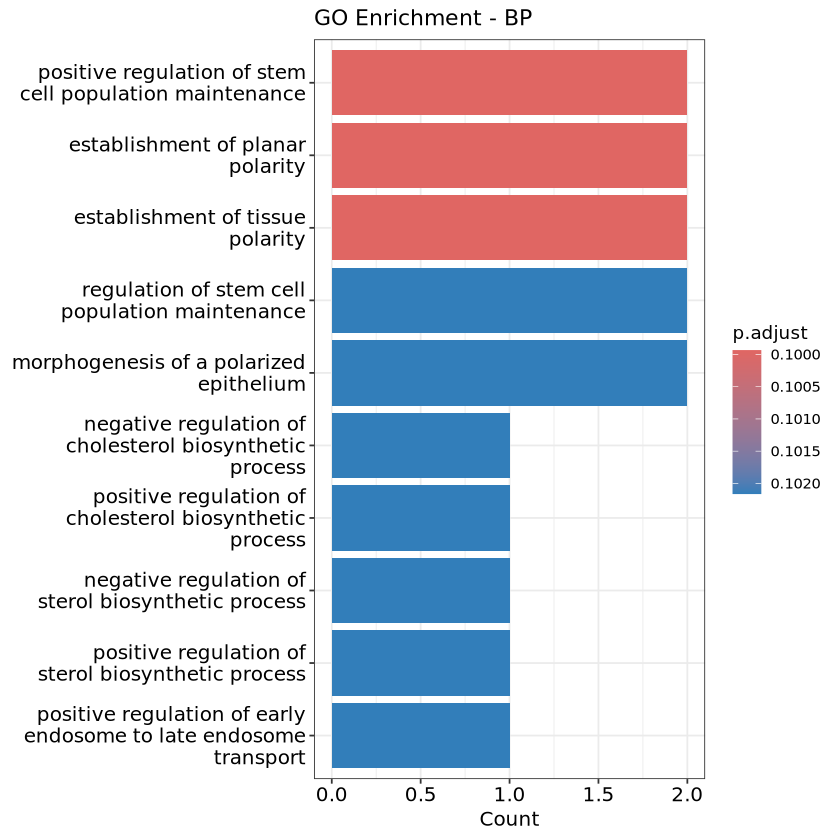

In [7]:
barplot(AD1_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [21]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD1_sig_xqtl_BP.pdf', width = 6, height = 6)

In [8]:
AD1_cc_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [9]:
head(AD1_cc_ego, n=10)

ID         Description                    GeneRatio BgRatio  
GO:0005875 GO:0005875 microtubule associated complex 2/13      165/22568
GO:0036064 GO:0036064 ciliary basal body             2/13      181/22568
GO:0031514 GO:0031514 motile cilium                  2/13      290/22568
GO:0016580 GO:0016580 Sin3 complex                   1/13      23/22568 
GO:0070822 GO:0070822 Sin3-type complex              1/13      23/22568 
GO:0002102 GO:0002102 podosome                       1/13      36/22568 
GO:0005839 GO:0005839 proteasome core complex        1/13      36/22568 
GO:0030135 GO:0030135 coated vesicle                 2/13      420/22568
GO:0031519 GO:0031519 PcG protein complex            1/13      46/22568 
GO:0005871 GO:0005871 kinesin complex                1/13      52/22568 
           pvalue      p.adjust  qvalue     geneID                         
GO:0005875 0.003930623 0.1012203 0.06194634 ENSG00000131966/ENSG00000088727
GO:0036064 0.004707922 0.1012203 0.06194634 ENSG00000100592/ENSG00000076201
GO:0031514 0.011690077 0.1130743 0.06920089 ENSG00000100592/ENSG00000088727
GO:0016580 0.013171616 0.1130743 0.06920089 ENSG00000032219                
GO:0070822 0.013171616 0.1130743 0.06920089 ENSG00000032219                
GO:0002102 0.020545416 0.1130743 0.06920089 ENSG00000088727                
GO:0005839 0.020545416 0.1130743 0.06920089 ENSG00000100567                
GO:0030135 0.023533705 0.1130743 0.06920089 ENSG00000114650/ENSG00000148219
GO:0031519 0.026182923 0.1130743 0.06920089 ENSG00000089094                
GO:0005871 0.029551035 0.1130743 0.06920089 ENSG00000088727                
           Count
GO:0005875 2    
GO:0036064 2    
GO:0031514 2    
GO:0016580 1    
GO:0070822 1    
GO:0002102 1    
GO:0005839 1    
GO:0030135 2    
GO:0031519 1    
GO:0005871 1

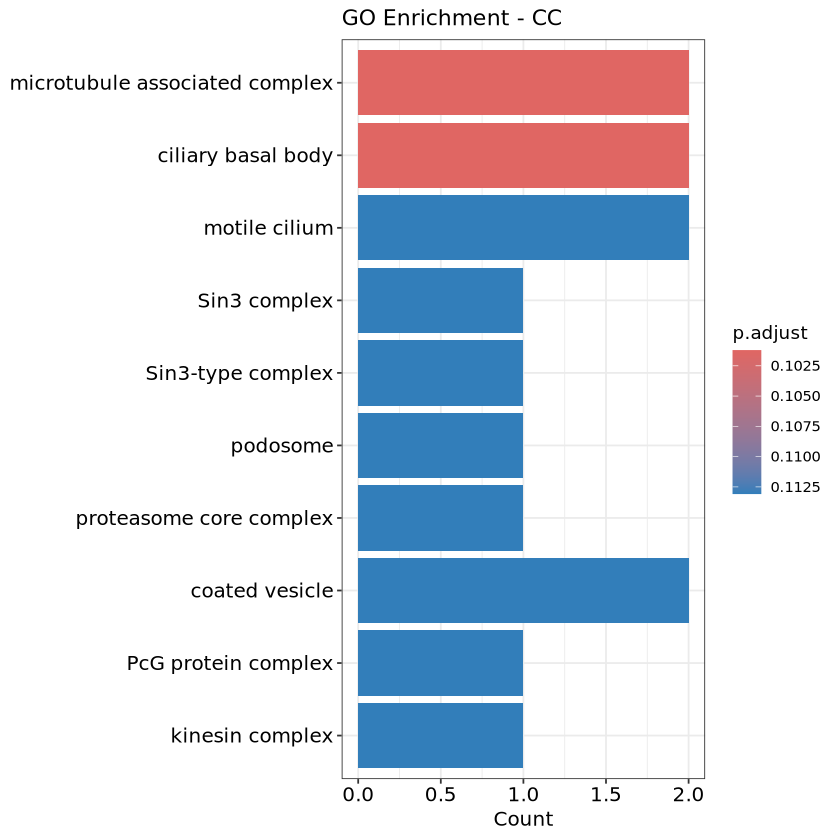

In [12]:
barplot(AD1_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [14]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD1_sig_xqtl_CC.pdf', width = 6, height = 6)

In [10]:
AD1_mf_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [11]:
head(AD1_mf_ego, n=10)

ID         Description                         GeneRatio BgRatio  
GO:0045322 GO:0045322 unmethylated CpG binding            1/14      10/21059 
GO:0051864 GO:0051864 histone H3K36 demethylase activity  1/14      10/21059 
GO:0004622 GO:0004622 lysophospholipase activity          1/14      24/21059 
GO:0141052 GO:0141052 histone H3 demethylase activity     1/14      28/21059 
GO:0032452 GO:0032452 histone demethylase activity        1/14      30/21059 
GO:0140457 GO:0140457 protein demethylase activity        1/14      30/21059 
GO:0005044 GO:0005044 scavenger receptor activity         1/14      33/21059 
GO:0030247 GO:0030247 polysaccharide binding              1/14      38/21059 
GO:0032451 GO:0032451 demethylase activity                1/14      40/21059 
GO:0042578 GO:0042578 phosphoric ester hydrolase activity 2/14      390/21059
           pvalue      p.adjust  qvalue     geneID                         
GO:0045322 0.006629549 0.1074958 0.07354976 ENSG00000089094                
GO:0051864 0.006629549 0.1074958 0.07354976 ENSG00000089094                
GO:0004622 0.015842373 0.1074958 0.07354976 ENSG00000136960                
GO:0141052 0.018459998 0.1074958 0.07354976 ENSG00000089094                
GO:0032452 0.019766385 0.1074958 0.07354976 ENSG00000089094                
GO:0140457 0.019766385 0.1074958 0.07354976 ENSG00000089094                
GO:0005044 0.021722939 0.1074958 0.07354976 ENSG00000136960                
GO:0030247 0.024975805 0.1074958 0.07354976 ENSG00000136960                
GO:0032451 0.026274137 0.1074958 0.07354976 ENSG00000089094                
GO:0042578 0.026873950 0.1074958 0.07354976 ENSG00000076201/ENSG00000136960
           Count
GO:0045322 1    
GO:0051864 1    
GO:0004622 1    
GO:0141052 1    
GO:0032452 1    
GO:0140457 1    
GO:0005044 1    
GO:0030247 1    
GO:0032451 1    
GO:0042578 2

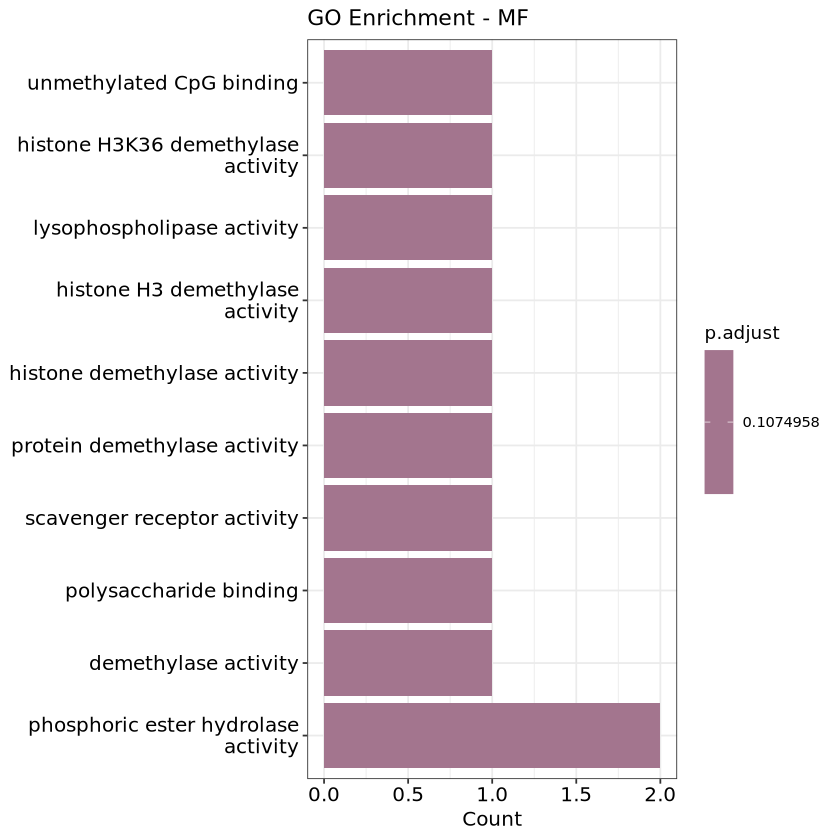

In [18]:
barplot(AD1_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [19]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD1_sig_xqtl_MF.pdf', width = 6, height = 6)

In [33]:
entrez_ids <- bitr(AD1_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(AD1_gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“5.26% of input gene IDs are fail to map...”


In [34]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa04814 Cellular Processes                   Cell motility                   
hsa05016 Human Diseases                       Neurodegenerative disease       
hsa05014 Human Diseases                       Neurodegenerative disease       
hsa03050 Genetic Information Processing       Folding, sorting and degradation
hsa00565 Metabolism                           Lipid metabolism                
hsa05022 Human Diseases                       Neurodegenerative disease       
hsa03083 Genetic Information Processing       Chromosome                      
hsa05017 Human Diseases                       Neurodegenerative disease       
hsa04310 Environmental Information Processing Signal transduction             
hsa04820 NA                                   NA                              
         ID       Description                                       GeneRatio
hsa04814 hsa04814 Motor proteins                                    2/6      
hsa05016 hsa05016 Huntington disease                                2/6      
hsa05014 hsa05014 Amyotrophic lateral sclerosis                     2/6      
hsa03050 hsa03050 Proteasome                                        1/6      
hsa00565 hsa00565 Ether lipid metabolism                            1/6      
hsa05022 hsa05022 Pathways of neurodegeneration - multiple diseases 2/6      
hsa03083 hsa03083 Polycomb repressive complex                       1/6      
hsa05017 hsa05017 Spinocerebellar ataxia                            1/6      
hsa04310 hsa04310 Wnt signaling pathway                             1/6      
hsa04820 hsa04820 Cytoskeleton in muscle cells                      1/6      
         BgRatio  pvalue      p.adjust   qvalue     geneID      Count
hsa04814 197/9440 0.006150097 0.07971008 0.04794592 55860/64147 2    
hsa05016 311/9440 0.014864036 0.07971008 0.04794592 55860/5684  2    
hsa05014 371/9440 0.020802606 0.07971008 0.04794592 55860/5684  2    
hsa03050 46/9440  0.028890978 0.07971008 0.04794592 5684        1    
hsa00565 51/9440  0.031988942 0.07971008 0.04794592 5168        1    
hsa05022 483/9440 0.034161465 0.07971008 0.04794592 55860/5684  2    
hsa03083 83/9440  0.051621527 0.10324305 0.06210109 84678       1    
hsa05017 144/9440 0.088127685 0.15422345 0.09276598 5684        1    
hsa04310 174/9440 0.105647252 0.16434017 0.09885123 23002       1    
hsa04820 233/9440 0.139284900 0.17685886 0.10638127 23002       1

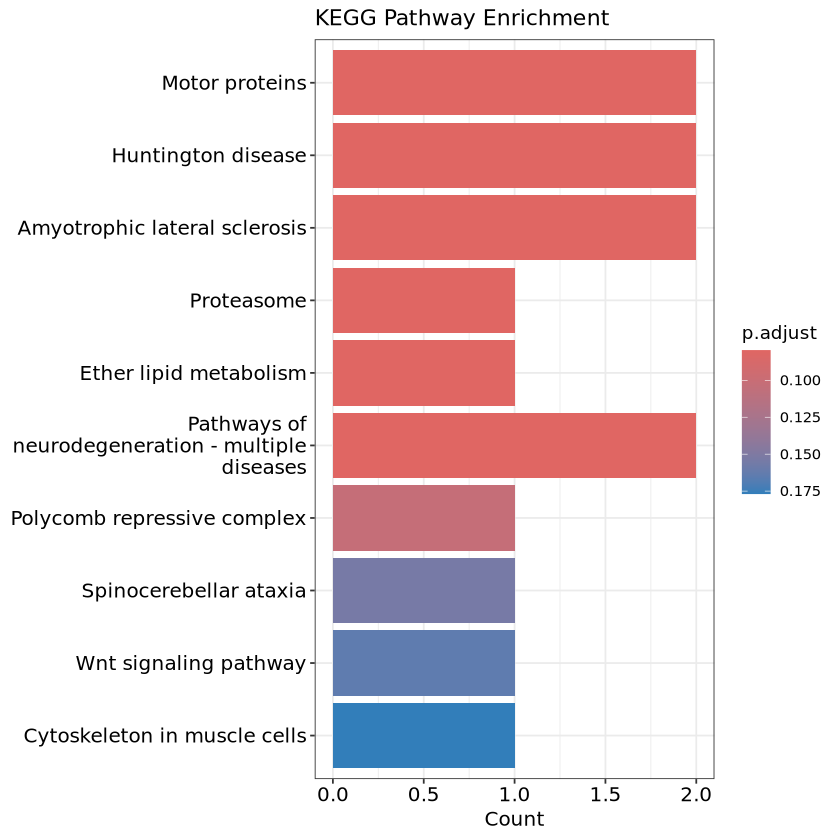

In [35]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [5]:
AD2_bp_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [16]:
# head(AD2_bp_ego, n=32)
# AD2_bp_ego |> as.data.frame() |> dplyr::slice(33:65)
# AD2_bp_ego |> as.data.frame() |> dplyr::slice(66:110)

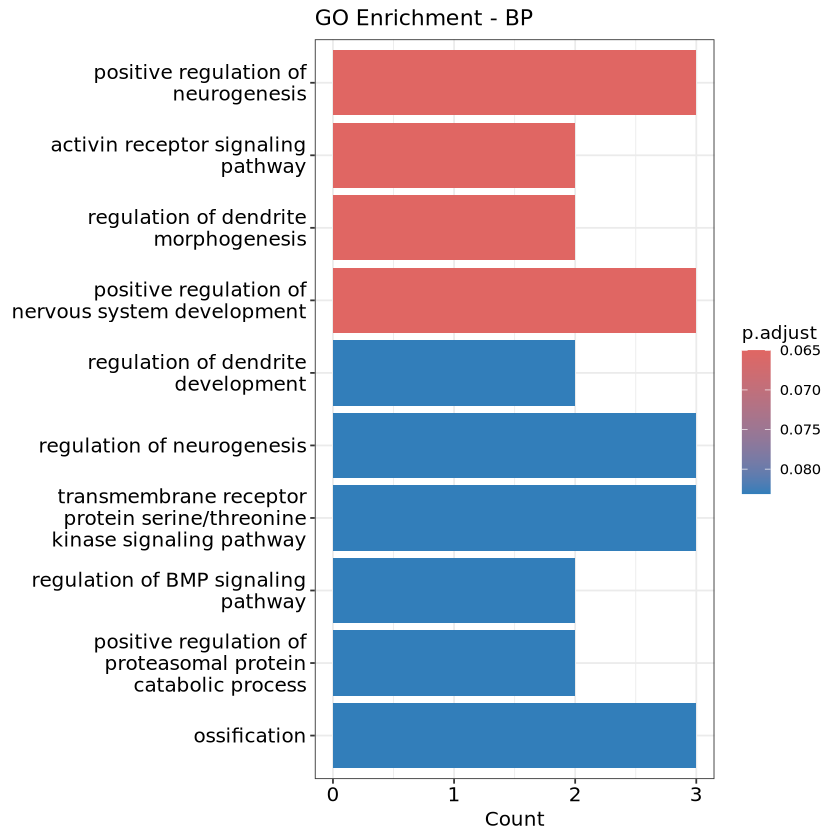

In [15]:
barplot(AD2_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [25]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD2_sig_xqtl_BP.pdf', width = 6, height = 6)

In [16]:
AD2_cc_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [27]:
head(AD2_cc_ego, n=10)

ID         Description                             GeneRatio
GO:0072534 GO:0072534 perineuronal net                        1/13     
GO:0098966 GO:0098966 perisynaptic extracellular matrix       1/13     
GO:0099535 GO:0099535 synapse-associated extracellular matrix 1/13     
GO:0000939 GO:0000939 inner kinetochore                       1/13     
GO:0005637 GO:0005637 nuclear inner membrane                  1/13     
GO:0019005 GO:0019005 SCF ubiquitin ligase complex            1/13     
GO:0001750 GO:0001750 photoreceptor outer segment             1/13     
GO:0032587 GO:0032587 ruffle membrane                         1/13     
GO:0043202 GO:0043202 lysosomal lumen                         1/13     
GO:0097733 GO:0097733 photoreceptor cell cilium               1/13     
           BgRatio   pvalue      p.adjust   qvalue     geneID          Count
GO:0072534 11/22568  0.006319583 0.09455198 0.08381339 ENSG00000038427 1    
GO:0098966 12/22568  0.006892259 0.09455198 0.08381339 ENSG00000038427 1    
GO:0099535 13/22568  0.007464630 0.09455198 0.08381339 ENSG00000038427 1    
GO:0000939 21/22568  0.012032648 0.11431015 0.10132756 ENSG00000203760 1    
GO:0005637 66/22568  0.037368189 0.18058880 0.16007871 ENSG00000174106 1    
GO:0019005 66/22568  0.037368189 0.18058880 0.16007871 ENSG00000174989 1    
GO:0001750 102/22568 0.057203328 0.18058880 0.16007871 ENSG00000038427 1    
GO:0032587 109/22568 0.061016073 0.18058880 0.16007871 ENSG00000088992 1    
GO:0043202 120/22568 0.066978782 0.18058880 0.16007871 ENSG00000038427 1    
GO:0097733 130/22568 0.072369078 0.18058880 0.16007871 ENSG00000038427 1

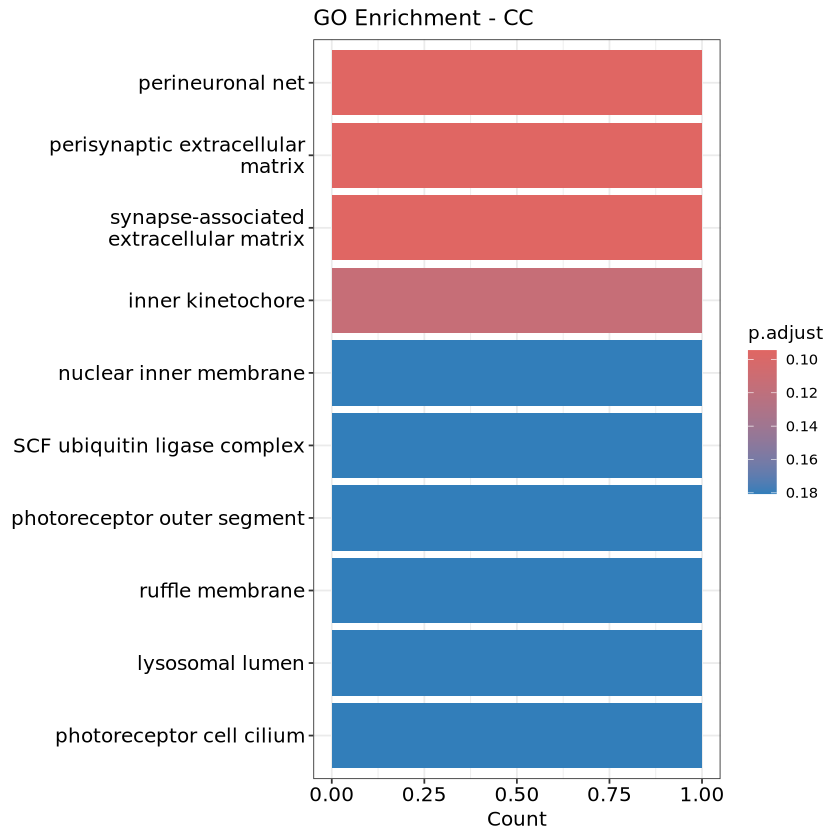

In [28]:
barplot(AD2_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [29]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [18]:
AD2_mf_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [51]:
head(AD2_mf_ego, n=15)

ID        
GO:0016671 GO:0016671
GO:0070697 GO:0070697
GO:0070990 GO:0070990
GO:0036122 GO:0036122
GO:0030215 GO:0030215
GO:0070696 GO:0070696
GO:0005540 GO:0005540
GO:0030021 GO:0030021
GO:0045499 GO:0045499
GO:0033612 GO:0033612
GO:0017147 GO:0017147
GO:0016667 GO:0016667
GO:0019212 GO:0019212
GO:0004860 GO:0004860
GO:0019210 GO:0019210
           Description                                                                       
GO:0016671 oxidoreductase activity, acting on a sulfur group of donors, disulfide as acceptor
GO:0070697 activin receptor binding                                                          
GO:0070990 snRNP binding                                                                     
GO:0036122 BMP binding                                                                       
GO:0030215 semaphorin receptor binding                                                       
GO:0070696 transmembrane receptor protein serine/threonine kinase binding                    
GO:0005540 hyaluronic acid binding                                                           
GO:0030021 extracellular matrix structural constituent conferring compression resistance     
GO:0045499 chemorepellent activity                                                           
GO:0033612 receptor serine/threonine kinase binding                                          
GO:0017147 Wnt-protein binding                                                               
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors                       
GO:0019212 phosphatase inhibitor activity                                                    
GO:0004860 protein kinase inhibitor activity                                                 
GO:0019210 kinase inhibitor activity                                                         
           GeneRatio BgRatio  pvalue      p.adjust   qvalue     geneID         
GO:0016671 1/13      10/21059 0.006157325 0.05688950 0.03283944 ENSG00000174099
GO:0070697 1/13      12/21059 0.007384582 0.05688950 0.03283944 ENSG00000156076
GO:0070990 1/13      18/21059 0.011057966 0.05688950 0.03283944 ENSG00000174106
GO:0036122 1/13      21/21059 0.012889949 0.05688950 0.03283944 ENSG00000125965
GO:0030215 1/13      24/21059 0.014718798 0.05688950 0.03283944 ENSG00000187764
GO:0070696 1/13      24/21059 0.014718798 0.05688950 0.03283944 ENSG00000156076
GO:0005540 1/13      25/21059 0.015327719 0.05688950 0.03283944 ENSG00000038427
GO:0030021 1/13      25/21059 0.015327719 0.05688950 0.03283944 ENSG00000038427
GO:0045499 1/13      29/21059 0.017759932 0.05688950 0.03283944 ENSG00000187764
GO:0033612 1/13      30/21059 0.018367118 0.05688950 0.03283944 ENSG00000156076
GO:0017147 1/13      33/21059 0.020186598 0.05688950 0.03283944 ENSG00000156076
GO:0016667 1/13      60/21059 0.036422393 0.09111844 0.05259808 ENSG00000174099
GO:0019212 1/13      63/21059 0.038210957 0.09111844 0.05259808 ENSG00000088992
GO:0004860 1/13      80/21059 0.048288401 0.10588309 0.06112097 ENSG00000088992
GO:0019210 1/13      85/21059 0.051233752 0.10588309 0.06112097 ENSG00000088992
           Count
GO:0016671 1    
GO:0070697 1    
GO:0070990 1    
GO:0036122 1    
GO:0030215 1    
GO:0070696 1    
GO:0005540 1    
GO:0030021 1    
GO:0045499 1    
GO:0033612 1    
GO:0017147 1    
GO:0016667 1    
GO:0019212 1    
GO:0004860 1    
GO:0019210 1

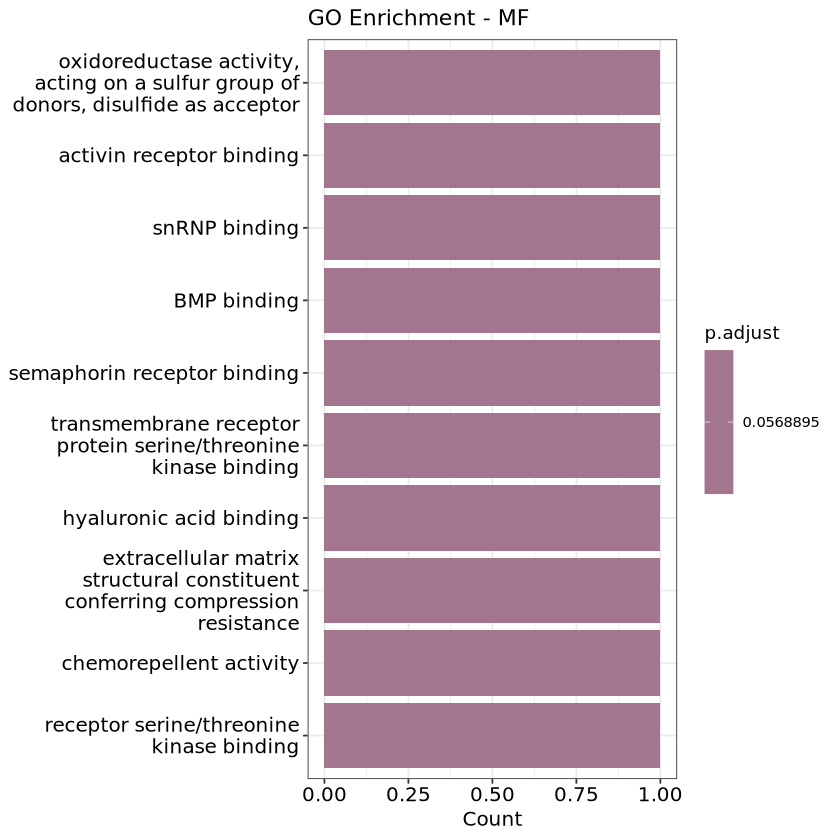

In [20]:
barplot(AD2_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [33]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_AD2_sig_xqtl_MF.pdf', width = 6, height = 6)

In [36]:
entrez_ids <- bitr(AD2_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(AD2_gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“6.25% of input gene IDs are fail to map...”


In [37]:
kegg_enrich %>% head(n=10)

category                            
hsa04350 Environmental Information Processing
hsa04210 Cellular Processes                  
hsa04120 Genetic Information Processing      
hsa04390 Environmental Information Processing
hsa04514 Environmental Information Processing
hsa04310 Environmental Information Processing
hsa04360 Organismal Systems                  
hsa04820 NA                                  
hsa04060 Environmental Information Processing
         subcategory                         ID      
hsa04350 Signal transduction                 hsa04350
hsa04210 Cell growth and death               hsa04210
hsa04120 Folding, sorting and degradation    hsa04120
hsa04390 Signal transduction                 hsa04390
hsa04514 Signaling molecules and interaction hsa04514
hsa04310 Signal transduction                 hsa04310
hsa04360 Development and regeneration        hsa04360
hsa04820 NA                                  hsa04820
hsa04060 Signaling molecules and interaction hsa04060
         Description                            GeneRatio BgRatio  pvalue     
hsa04350 TGF-beta signaling pathway             2/7       110/9440 0.002719825
hsa04210 Apoptosis                              1/7       137/9440 0.097301018
hsa04120 Ubiquitin mediated proteolysis         1/7       142/9440 0.100692798
hsa04390 Hippo signaling pathway                1/7       157/9440 0.110802678
hsa04514 Cell adhesion molecules                1/7       160/9440 0.112812920
hsa04310 Wnt signaling pathway                  1/7       174/9440 0.122142628
hsa04360 Axon guidance                          1/7       184/9440 0.128755104
hsa04820 Cytoskeleton in muscle cells           1/7       233/9440 0.160542756
hsa04060 Cytokine-cytokine receptor interaction 1/7       298/9440 0.201172419
         p.adjust   qvalue     geneID     Count
hsa04350 0.02447842 0.02290379 23592/8200 2    
hsa04210 0.16554228 0.15489336 8739       1    
hsa04120 0.16554228 0.15489336 26259      1    
hsa04390 0.16554228 0.15489336 8200       1    
hsa04514 0.16554228 0.15489336 1462       1    
hsa04310 0.16554228 0.15489336 11197      1    
hsa04360 0.16554228 0.15489336 10507      1    
hsa04820 0.18061060 0.16899237 1462       1    
hsa04060 0.20117242 0.18823150 8200       1

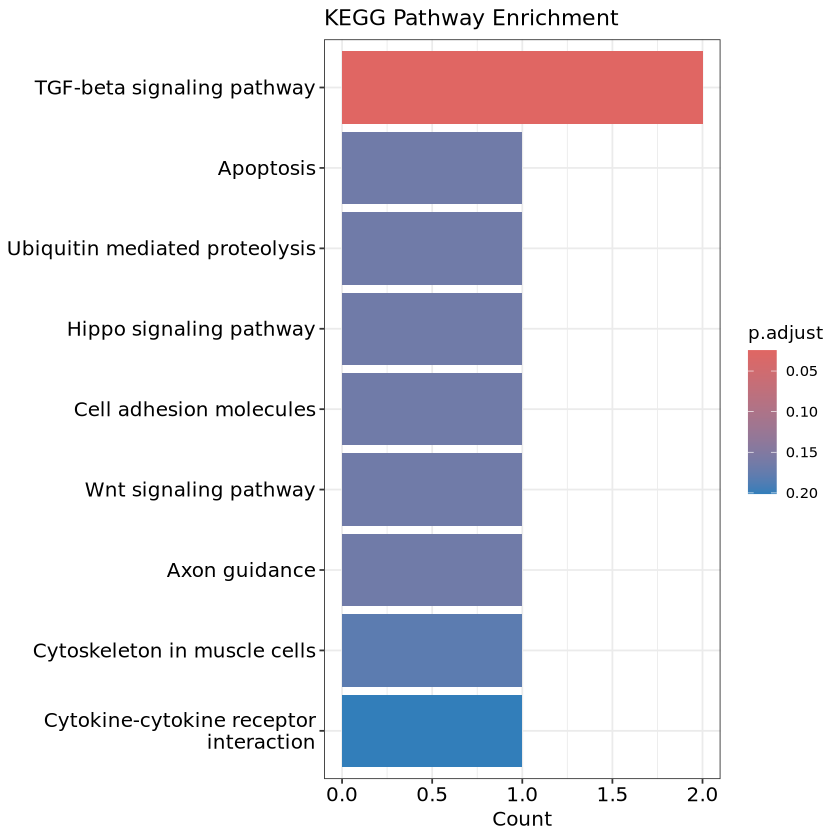

In [38]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [34]:
Aging1_bp_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [35]:
head(Aging1_bp_ego, n=5)

ID         Description                                            
GO:0034308 GO:0034308 primary alcohol metabolic process                      
GO:0006068 GO:0006068 ethanol catabolic process                              
GO:0034310 GO:0034310 primary alcohol catabolic process                      
GO:0034035 GO:0034035 purine ribonucleoside bisphosphate metabolic process   
GO:0050427 GO:0050427 3'-phosphoadenosine 5'-phosphosulfate metabolic process
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0034308 4/47      126/21261 0.0001722053 0.1674225 0.1436986
GO:0006068 2/47      13/21261  0.0003673346 0.1674225 0.1436986
GO:0034310 2/47      16/21261  0.0005627452 0.1674225 0.1436986
GO:0034035 2/47      18/21261  0.0007154807 0.1674225 0.1436986
GO:0050427 2/47      18/21261  0.0007154807 0.1674225 0.1436986
           geneID                                                         
GO:0034308 ENSG00000017427/ENSG00000084093/ENSG00000197165/ENSG00000196502
GO:0006068 ENSG00000197165/ENSG00000196502                                
GO:0034310 ENSG00000197165/ENSG00000196502                                
GO:0034035 ENSG00000197165/ENSG00000196502                                
GO:0050427 ENSG00000197165/ENSG00000196502                                
           Count
GO:0034308 4    
GO:0006068 2    
GO:0034310 2    
GO:0034035 2    
GO:0050427 2

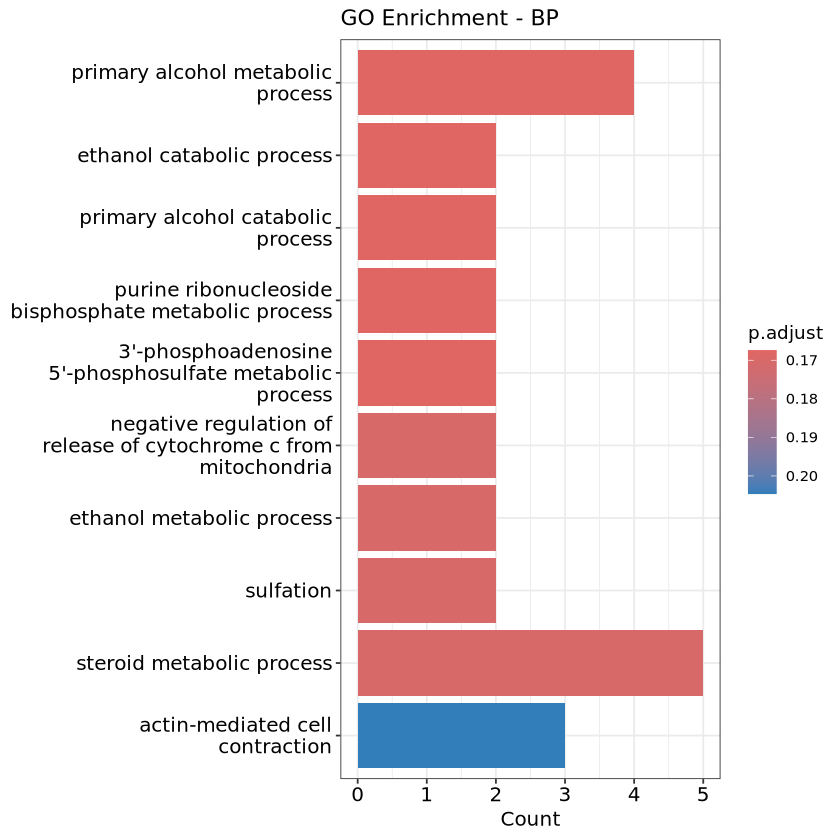

In [36]:
barplot(Aging1_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [37]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging1_sig_xqtl_BP.pdf', width = 6, height = 6)

In [38]:
Aging1_cc_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [39]:
head(Aging1_cc_ego, n=10)

ID         Description                                       
GO:0017053 GO:0017053 transcription repressor complex                   
GO:0070382 GO:0070382 exocytic vesicle                                  
GO:0045171 GO:0045171 intercellular bridge                              
GO:0097136 GO:0097136 Bcl-2 family protein complex                      
GO:0031094 GO:0031094 platelet dense tubular network                    
GO:0071203 GO:0071203 WASH complex                                      
GO:0042627 GO:0042627 chylomicron                                       
GO:0005665 GO:0005665 RNA polymerase II, core complex                   
GO:0005852 GO:0005852 eukaryotic translation initiation factor 3 complex
GO:0044754 GO:0044754 autolysosome                                      
           GeneRatio BgRatio   pvalue     p.adjust  qvalue   
GO:0017053 2/48      79/22568  0.01229781 0.2436548 0.2102663
GO:0070382 3/48      258/22568 0.01749840 0.2436548 0.2102663
GO:0045171 2/48      104/22568 0.02067263 0.2436548 0.2102663
GO:0097136 1/48      10/22568  0.02107080 0.2436548 0.2102663
GO:0031094 1/48      11/22568  0.02315381 0.2436548 0.2102663
GO:0071203 1/48      12/22568  0.02523248 0.2436548 0.2102663
GO:0042627 1/48      13/22568  0.02730682 0.2436548 0.2102663
GO:0005665 1/48      16/22568  0.03350395 0.2436548 0.2102663
GO:0005852 1/48      16/22568  0.03350395 0.2436548 0.2102663
GO:0044754 1/48      16/22568  0.03350395 0.2436548 0.2102663
           geneID                                          Count
GO:0017053 ENSG00000084093/ENSG00000142611                 2    
GO:0070382 ENSG00000188603/ENSG00000017427/ENSG00000171552 3    
GO:0045171 ENSG00000088325/ENSG00000176046                 2    
GO:0097136 ENSG00000171552                                 1    
GO:0031094 ENSG00000196296                                 1    
GO:0071203 ENSG00000120860                                 1    
GO:0042627 ENSG00000184730                                 1    
GO:0005665 ENSG00000047315                                 1    
GO:0005852 ENSG00000184110                                 1    
GO:0044754 ENSG00000188603                                 1

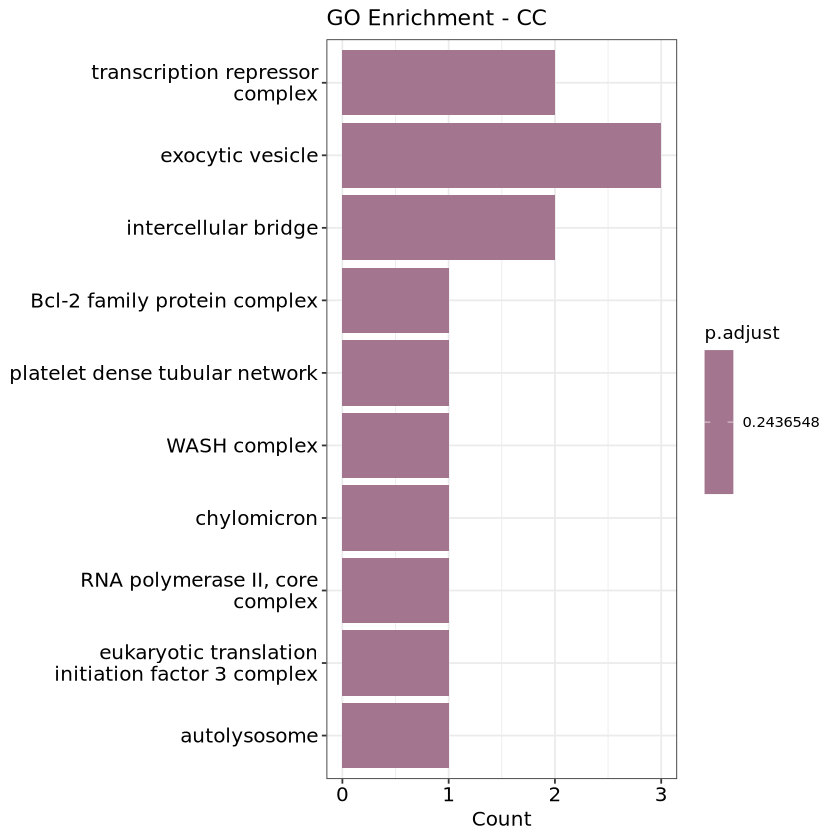

In [40]:
barplot(Aging1_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [41]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging1_sig_xqtl_CC.pdf', width = 6, height = 6)

In [42]:
Aging1_mf_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [43]:
head(Aging1_mf_ego, n=5)

ID        
GO:0004062 GO:0004062
GO:0030159 GO:0030159
GO:0008146 GO:0008146
GO:0016782 GO:0016782
GO:0048306 GO:0048306
           Description                                                 
GO:0004062 aryl sulfotransferase activity                              
GO:0030159 signaling receptor complex adaptor activity                 
GO:0008146 sulfotransferase activity                                   
GO:0016782 transferase activity, transferring sulphur-containing groups
GO:0048306 calcium-dependent protein binding                           
           GeneRatio BgRatio  pvalue       p.adjust   qvalue    
GO:0004062 2/44      10/21059 0.0001899581 0.02298493 0.01799603
GO:0030159 2/44      53/21059 0.0054946636 0.18577540 0.14545269
GO:0008146 2/44      57/21059 0.0063303742 0.18577540 0.14545269
GO:0016782 2/44      75/21059 0.0107484451 0.18577540 0.14545269
GO:0048306 2/44      82/21059 0.0127452235 0.18577540 0.14545269
           geneID                          Count
GO:0004062 ENSG00000197165/ENSG00000196502 2    
GO:0030159 ENSG00000178188/ENSG00000213658 2    
GO:0008146 ENSG00000197165/ENSG00000196502 2    
GO:0016782 ENSG00000197165/ENSG00000196502 2    
GO:0048306 ENSG00000188603/ENSG00000138674 2

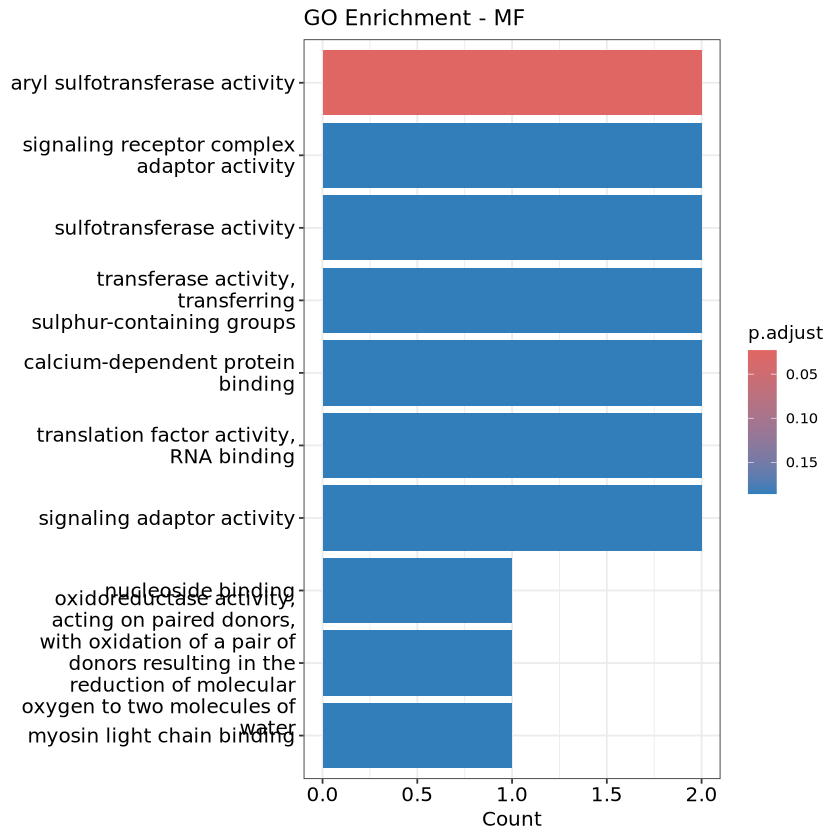

In [44]:
barplot(Aging1_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [45]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging1_sig_xqtl_MF.pdf', width = 6, height = 6)

In [39]:
entrez_ids <- bitr(Aging1_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(Aging1_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“1.85% of input gene IDs are fail to map...”


In [40]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa05202 Human Diseases                       Cancer: overview               
hsa05204 Human Diseases                       Cancer: overview               
hsa05014 Human Diseases                       Neurodegenerative disease      
hsa04115 Cellular Processes                   Cell growth and death          
hsa01521 Human Diseases                       Drug resistance: antineoplastic
hsa04260 Organismal Systems                   Circulatory system             
hsa04014 Environmental Information Processing Signal transduction            
hsa05410 Human Diseases                       Cardiovascular disease         
hsa04064 Environmental Information Processing Signal transduction            
hsa05414 Human Diseases                       Cardiovascular disease         
         ID       Description                               GeneRatio BgRatio 
hsa05202 hsa05202 Transcriptional misregulation in cancer   4/26      201/9440
hsa05204 hsa05204 Chemical carcinogenesis - DNA adducts     2/26      71/9440 
hsa05014 hsa05014 Amyotrophic lateral sclerosis             4/26      371/9440
hsa04115 hsa04115 p53 signaling pathway                     2/26      75/9440 
hsa01521 hsa01521 EGFR tyrosine kinase inhibitor resistance 2/26      80/9440 
hsa04260 hsa04260 Cardiac muscle contraction                2/26      87/9440 
hsa04014 hsa04014 Ras signaling pathway                     3/26      238/9440
hsa05410 hsa05410 Hypertrophic cardiomyopathy               2/26      99/9440 
hsa04064 hsa04064 NF-kappa B signaling pathway              2/26      105/9440
hsa05414 hsa05414 Dilated cardiomyopathy                    2/26      105/9440
         pvalue      p.adjust  qvalue    geneID                Count
hsa05202 0.002065077 0.2209632 0.2043339 26471/3479/51274/598  4    
hsa05204 0.016133656 0.3487847 0.3225358 6799/6817             2    
hsa05014 0.017689242 0.3487847 0.3225358 11273/598/79023/84701 4    
hsa04115 0.017895776 0.3487847 0.3225358 3479/598              2    
hsa01521 0.020208238 0.3487847 0.3225358 3479/598              2    
hsa04260 0.023644431 0.3487847 0.3225358 487/84701             2    
hsa04014 0.026833401 0.3487847 0.3225358 27040/3479/598        3    
hsa05410 0.030049786 0.3487847 0.3225358 3479/487              2    
hsa04064 0.033484441 0.3487847 0.3225358 27040/598             2    
hsa05414 0.033484441 0.3487847 0.3225358 3479/487              2

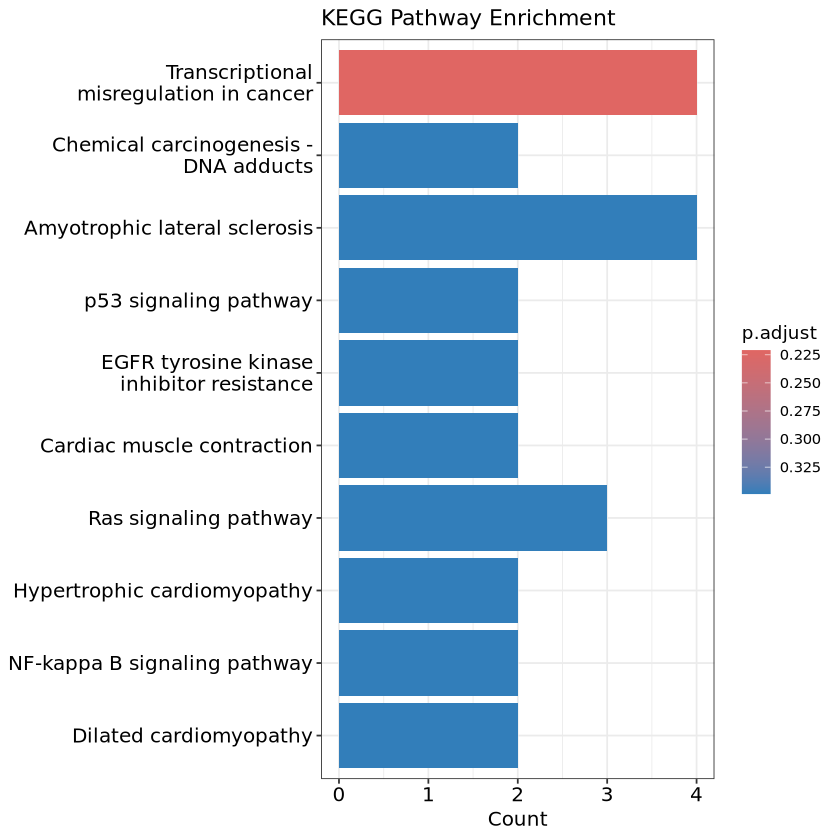

In [41]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [5]:
Aging2_bp_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [6]:
head(Aging2_bp_ego, n=5)

ID         Description                                              
GO:0031338 GO:0031338 regulation of vesicle fusion                             
GO:0016579 GO:0016579 protein deubiquitination                                 
GO:0070536 GO:0070536 protein K63-linked deubiquitination                      
GO:0070646 GO:0070646 protein modification by small protein removal            
GO:0098927 GO:0098927 vesicle-mediated transport between endosomal compartments
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0031338 2/37      26/21261  0.0009328413 0.2493745 0.2126352
GO:0016579 3/37      122/21261 0.0012421865 0.2493745 0.2126352
GO:0070536 2/37      34/21261  0.0015961827 0.2493745 0.2126352
GO:0070646 3/37      141/21261 0.0018809393 0.2493745 0.2126352
GO:0098927 2/37      53/21261  0.0038401268 0.2493745 0.2126352
           geneID                                          Count
GO:0031338 ENSG00000102879/ENSG00000149927                 2    
GO:0016579 ENSG00000136560/ENSG00000115233/ENSG00000165660 3    
GO:0070536 ENSG00000115233/ENSG00000165660                 2    
GO:0070646 ENSG00000136560/ENSG00000115233/ENSG00000165660 3    
GO:0098927 ENSG00000102879/ENSG00000102882                 2

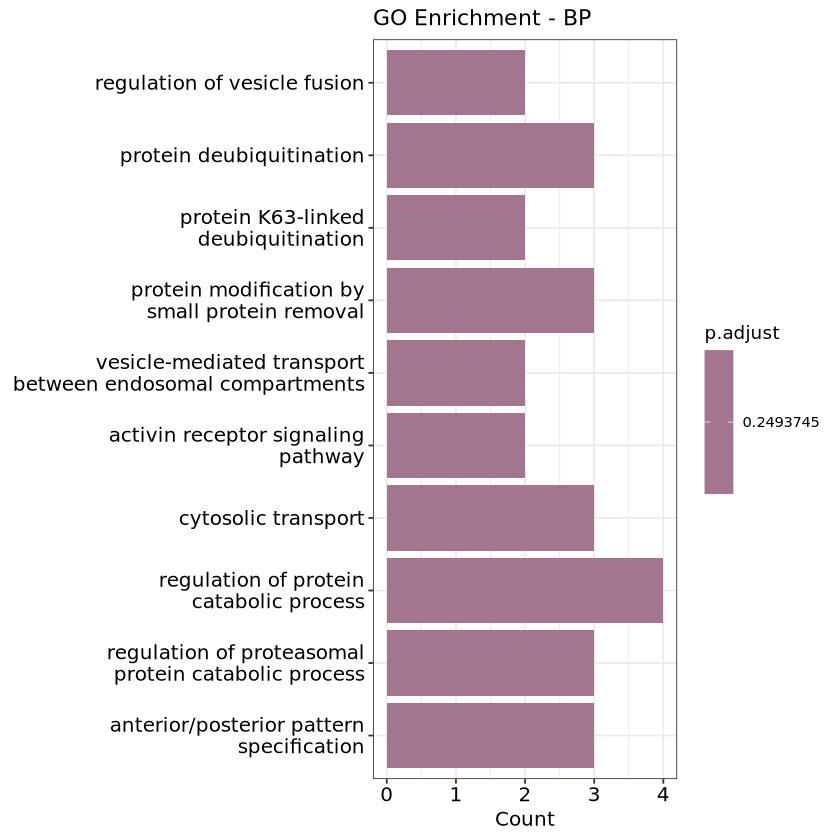

In [7]:
barplot(Aging2_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [8]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging2_sig_xqtl_BP.pdf', width = 6, height = 6)

In [9]:
Aging2_cc_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [10]:
head(Aging2_cc_ego, n=10)

ID         Description                                     
GO:0098850 GO:0098850 extrinsic component of synaptic vesicle membrane
GO:0044294 GO:0044294 dendritic growth cone                           
GO:0031616 GO:0031616 spindle pole centrosome                         
GO:0044292 GO:0044292 dendrite terminus                               
GO:0005838 GO:0005838 proteasome regulatory particle                  
GO:0031143 GO:0031143 pseudopodium                                    
GO:0000939 GO:0000939 inner kinetochore                               
GO:0098978 GO:0098978 glutamatergic synapse                           
GO:0005814 GO:0005814 centriole                                       
GO:0031461 GO:0031461 cullin-RING ubiquitin ligase complex            
           GeneRatio BgRatio   pvalue     p.adjust  qvalue   
GO:0098850 1/38      11/22568  0.01837069 0.2814523 0.2480363
GO:0044294 1/38      12/22568  0.02002436 0.2814523 0.2480363
GO:0031616 1/38      15/22568  0.02496912 0.2814523 0.2480363
GO:0044292 1/38      16/22568  0.02661197 0.2814523 0.2480363
GO:0005838 1/38      20/22568  0.03315646 0.2814523 0.2480363
GO:0031143 1/38      20/22568  0.03315646 0.2814523 0.2480363
GO:0000939 1/38      21/22568  0.03478587 0.2814523 0.2480363
GO:0098978 3/38      440/22568 0.03753667 0.2814523 0.2480363
GO:0005814 2/38      184/22568 0.03836456 0.2814523 0.2480363
GO:0031461 2/38      191/22568 0.04104646 0.2814523 0.2480363
           geneID                                          Count
GO:0098850 ENSG00000149927                                 1    
GO:0044294 ENSG00000149930                                 1    
GO:0031616 ENSG00000165660                                 1    
GO:0044292 ENSG00000149930                                 1    
GO:0005838 ENSG00000115233                                 1    
GO:0031143 ENSG00000102882                                 1    
GO:0000939 ENSG00000203760                                 1    
GO:0098978 ENSG00000102879/ENSG00000102882/ENSG00000149927 3    
GO:0005814 ENSG00000168944/ENSG00000174989                 2    
GO:0031461 ENSG00000174943/ENSG00000174989                 2

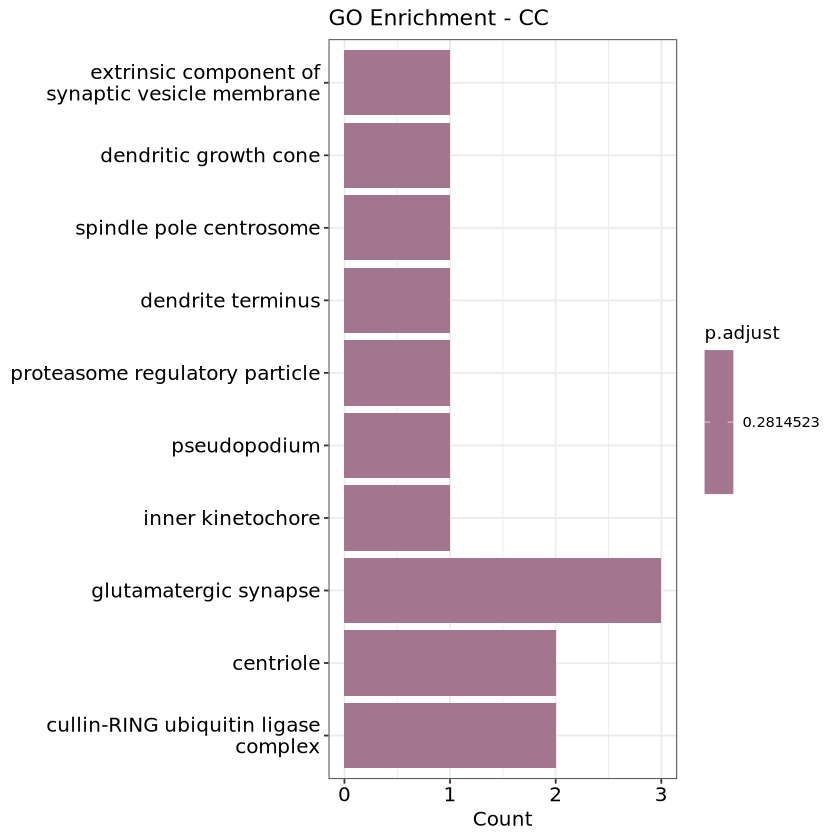

In [11]:
barplot(Aging2_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [12]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [13]:
Aging2_mf_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [14]:
head(Aging2_mf_ego, n=5)

ID         Description                         GeneRatio BgRatio  
GO:0019887 GO:0019887 protein kinase regulator activity   4/38      249/21059
GO:0019207 GO:0019207 kinase regulator activity           4/38      282/21059
GO:0016504 GO:0016504 peptidase activator activity        2/38      56/21059 
GO:0042578 GO:0042578 phosphoric ester hydrolase activity 4/38      390/21059
GO:0004860 GO:0004860 protein kinase inhibitor activity   2/38      80/21059 
           pvalue      p.adjust   qvalue    
GO:0019887 0.001026899 0.07956391 0.06153170
GO:0019207 0.001623753 0.07956391 0.06153170
GO:0016504 0.004591799 0.12742691 0.09854712
GO:0042578 0.005201098 0.12742691 0.09854712
GO:0004860 0.009169537 0.15240762 0.11786626
           geneID                                                         
GO:0019887 ENSG00000123080/ENSG00000185104/ENSG00000088992/ENSG00000149930
GO:0019207 ENSG00000123080/ENSG00000185104/ENSG00000088992/ENSG00000149930
GO:0016504 ENSG00000136560/ENSG00000115233                                
GO:0042578 ENSG00000149923/ENSG00000107902/ENSG00000102886/ENSG00000141298
GO:0004860 ENSG00000123080/ENSG00000088992                                
           Count
GO:0019887 4    
GO:0019207 4    
GO:0016504 2    
GO:0042578 4    
GO:0004860 2

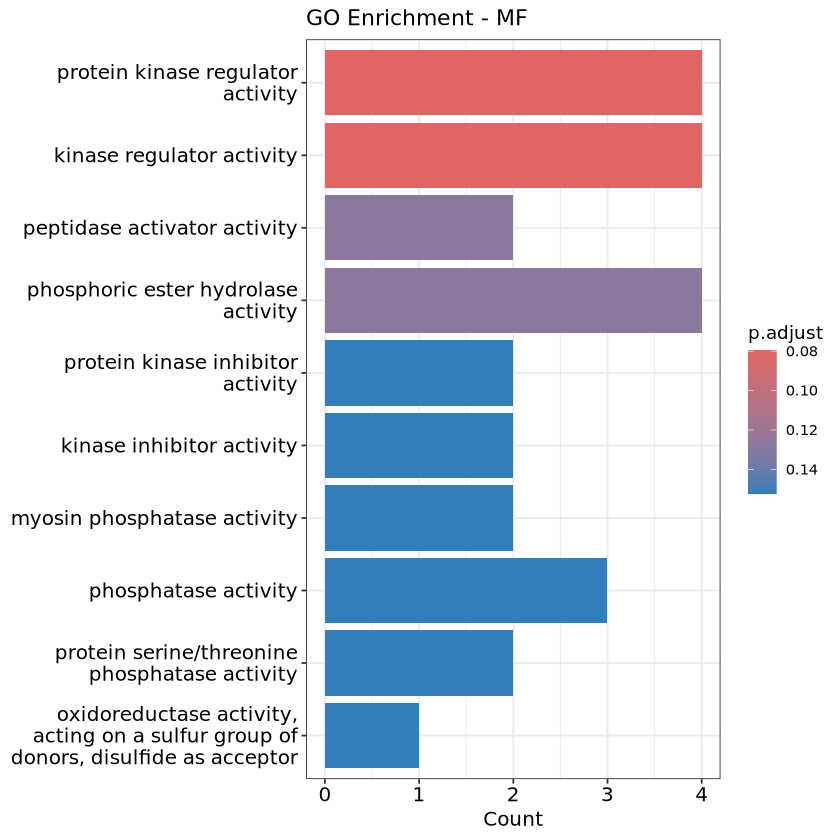

In [15]:
barplot(Aging2_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [16]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging2_sig_xqtl_MF.pdf', width = 6, height = 6)

In [42]:
entrez_ids <- bitr(Aging2_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(Aging2_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“2.17% of input gene IDs are fail to map...”


In [43]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa01522 Human Diseases                       Drug resistance: antineoplastic
hsa04350 Environmental Information Processing Signal transduction            
hsa04210 Cellular Processes                   Cell growth and death          
hsa04934 Human Diseases                       Endocrine and metabolic disease
hsa04140 Cellular Processes                   Transport and catabolism       
hsa05152 Human Diseases                       Infectious disease: bacterial  
hsa04360 Organismal Systems                   Development and regeneration   
hsa04621 Organismal Systems                   Immune system                  
hsa05022 Human Diseases                       Neurodegenerative disease      
hsa05417 Human Diseases                       Cardiovascular disease         
         ID       Description                                       GeneRatio
hsa01522 hsa01522 Endocrine resistance                              2/15     
hsa04350 hsa04350 TGF-beta signaling pathway                        2/15     
hsa04210 hsa04210 Apoptosis                                         2/15     
hsa04934 hsa04934 Cushing syndrome                                  2/15     
hsa04140 hsa04140 Autophagy - animal                                2/15     
hsa05152 hsa05152 Tuberculosis                                      2/15     
hsa04360 hsa04360 Axon guidance                                     2/15     
hsa04621 hsa04621 NOD-like receptor signaling pathway               2/15     
hsa05022 hsa05022 Pathways of neurodegeneration - multiple diseases 3/15     
hsa05417 hsa05417 Lipid and atherosclerosis                         2/15     
         BgRatio  pvalue     p.adjust  qvalue    geneID           Count
hsa01522 99/9440  0.01045972 0.2906328 0.2806268 1031/5595        2    
hsa04350 110/9440 0.01279694 0.2906328 0.2806268 23592/5595       2    
hsa04210 137/9440 0.01940101 0.2906328 0.2806268 5595/8739        2    
hsa04934 155/9440 0.02444983 0.2906328 0.2806268 1031/5595        2    
hsa04140 169/9440 0.02871236 0.2906328 0.2806268 10010/5595       2    
hsa05152 182/9440 0.03292092 0.2906328 0.2806268 11151/5595       2    
hsa04360 184/9440 0.03358913 0.2906328 0.2806268 5595/85464       2    
hsa04621 189/9440 0.03528331 0.2906328 0.2806268 10010/5595       2    
hsa05022 483/9440 0.03825368 0.2906328 0.2806268 10010/10213/5595 3    
hsa05417 216/9440 0.04499425 0.2906328 0.2806268 10010/5595       2

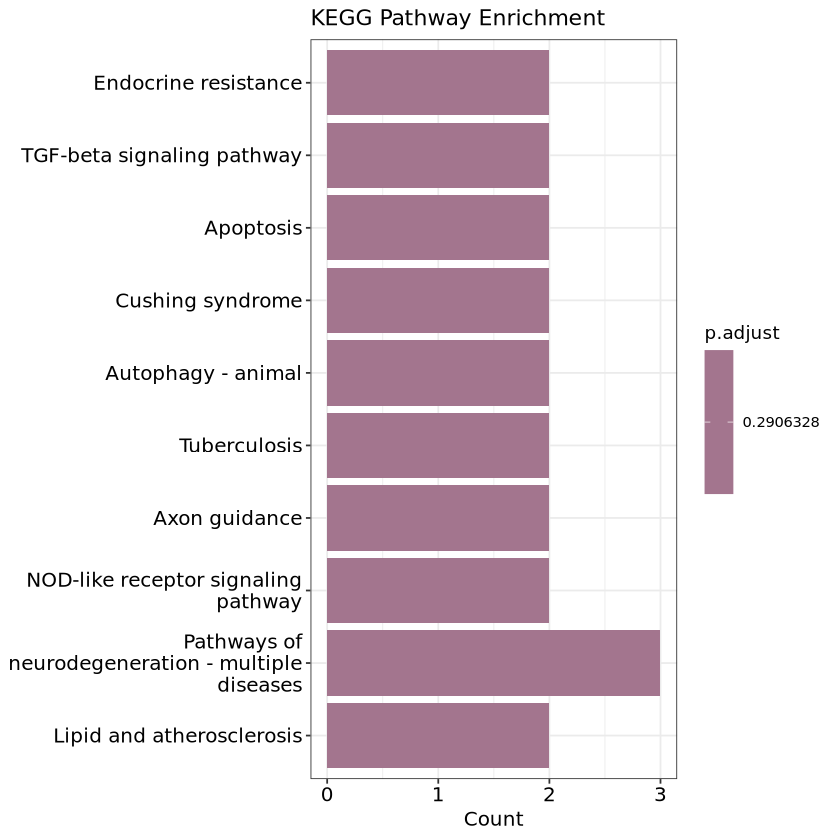

In [44]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [17]:
Aging3_bp_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [18]:
head(Aging3_bp_ego, n=5)

ID         Description                                           
GO:0006979 GO:0006979 response to oxidative stress                          
GO:2000659 GO:2000659 regulation of interleukin-1-mediated signaling pathway
GO:0006349 GO:0006349 regulation of gene expression by genomic imprinting   
GO:0031055 GO:0031055 chromatin remodeling at centromere                    
GO:0034080 GO:0034080 CENP-A containing chromatin assembly                  
           GeneRatio BgRatio   pvalue      p.adjust  qvalue    
GO:0006979 3/14      450/21261 0.002881426 0.1375571 0.09678942
GO:2000659 1/14      11/21261  0.007221201 0.1375571 0.09678942
GO:0006349 1/14      12/21261  0.007875267 0.1375571 0.09678942
GO:0031055 1/14      12/21261  0.007875267 0.1375571 0.09678942
GO:0034080 1/14      12/21261  0.007875267 0.1375571 0.09678942
           geneID                                          Count
GO:0006979 ENSG00000174099/ENSG00000002745/ENSG00000028116 3    
GO:2000659 ENSG00000028116                                 1    
GO:0006349 ENSG00000032219                                 1    
GO:0031055 ENSG00000203760                                 1    
GO:0034080 ENSG00000203760                                 1

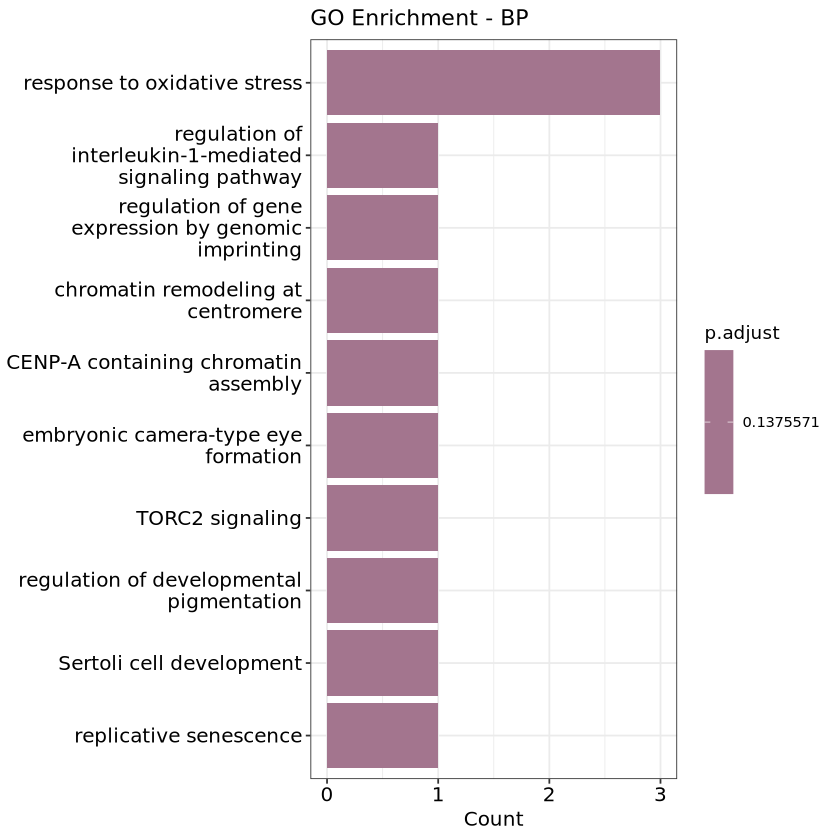

In [19]:
barplot(Aging3_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [20]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging3_sig_xqtl_BP.pdf', width = 6, height = 6)

In [21]:
Aging3_cc_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(Aging3_cc_ego, n=10)

ID         Description                       GeneRatio BgRatio 
GO:0043240 GO:0043240 Fanconi anaemia nuclear complex   1/14      13/22568
GO:0000939 GO:0000939 inner kinetochore                 1/14      21/22568
GO:0016580 GO:0016580 Sin3 complex                      1/14      23/22568
GO:0070822 GO:0070822 Sin3-type complex                 1/14      23/22568
GO:0005839 GO:0005839 proteasome core complex           1/14      36/22568
GO:1904115 GO:1904115 axon cytoplasm                    1/14      66/22568
GO:0001725 GO:0001725 stress fiber                      1/14      72/22568
GO:0097517 GO:0097517 contractile actin filament bundle 1/14      72/22568
GO:0042641 GO:0042641 actomyosin                        1/14      78/22568
GO:0000502 GO:0000502 proteasome complex                1/14      79/22568
           pvalue      p.adjust  qvalue    geneID          Count
GO:0043240 0.008036696 0.1382347 0.1007378 ENSG00000115392 1    
GO:0000939 0.012952502 0.1382347 0.1007378 ENSG00000203760 1    
GO:0016580 0.014177914 0.1382347 0.1007378 ENSG00000032219 1    
GO:0070822 0.014177914 0.1382347 0.1007378 ENSG00000032219 1    
GO:0005839 0.022108722 0.1526441 0.1112386 ENSG00000100567 1    
GO:1904115 0.040185023 0.1526441 0.1112386 ENSG00000131966 1    
GO:0001725 0.043762842 0.1526441 0.1112386 ENSG00000100592 1    
GO:0097517 0.043762842 0.1526441 0.1112386 ENSG00000100592 1    
GO:0042641 0.047328274 0.1526441 0.1112386 ENSG00000100592 1    
GO:0000502 0.047921311 0.1526441 0.1112386 ENSG00000100567 1

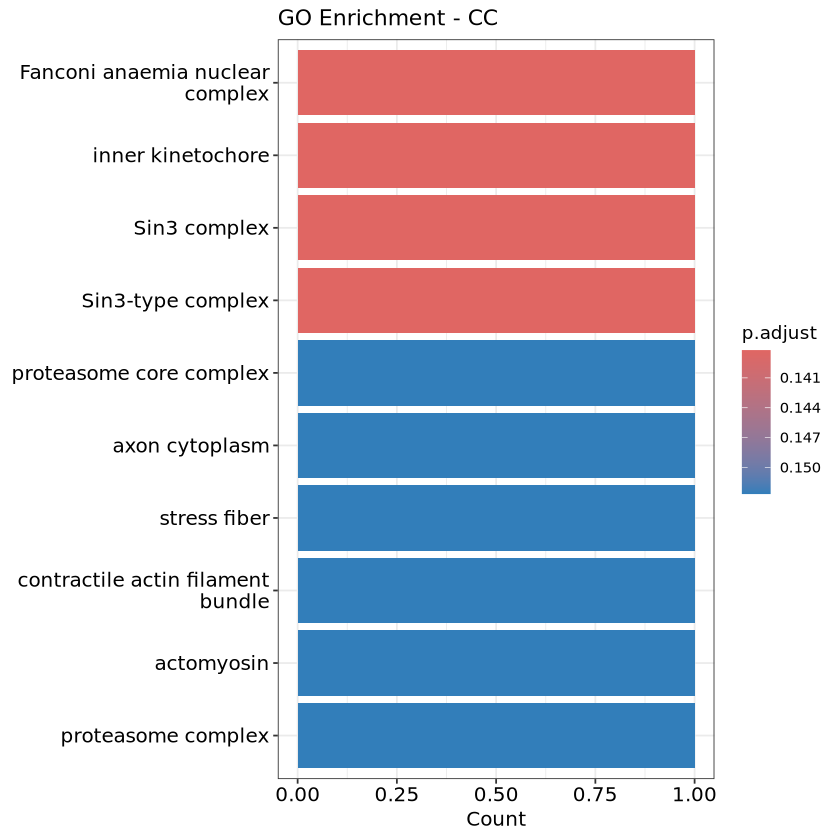

In [23]:
barplot(Aging3_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [24]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging3_sig_xqtl_CC.pdf', width = 6, height = 6)

In [25]:
Aging3_mf_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [26]:
head(Aging3_mf_ego, n=5)

ID        
GO:0016671 GO:0016671
GO:0046982 GO:0046982
GO:0031625 GO:0031625
GO:0044389 GO:0044389
GO:0005109 GO:0005109
           Description                                                                       
GO:0016671 oxidoreductase activity, acting on a sulfur group of donors, disulfide as acceptor
GO:0046982 protein heterodimerization activity                                               
GO:0031625 ubiquitin protein ligase binding                                                  
GO:0044389 ubiquitin-like protein ligase binding                                             
GO:0005109 frizzled binding                                                                  
           GeneRatio BgRatio   pvalue      p.adjust  qvalue    
GO:0016671 1/14      10/21059  0.006629549 0.1224045 0.08761589
GO:0046982 2/14      360/21059 0.023154746 0.1224045 0.08761589
GO:0031625 2/14      363/21059 0.023516116 0.1224045 0.08761589
GO:0044389 2/14      382/21059 0.025859430 0.1224045 0.08761589
GO:0005109 1/14      41/21059  0.026922701 0.1224045 0.08761589
           geneID                          Count
GO:0016671 ENSG00000174099                 1    
GO:0046982 ENSG00000174306/ENSG00000203760 2    
GO:0031625 ENSG00000115392/ENSG00000100567 2    
GO:0044389 ENSG00000115392/ENSG00000100567 2    
GO:0005109 ENSG00000002745                 1

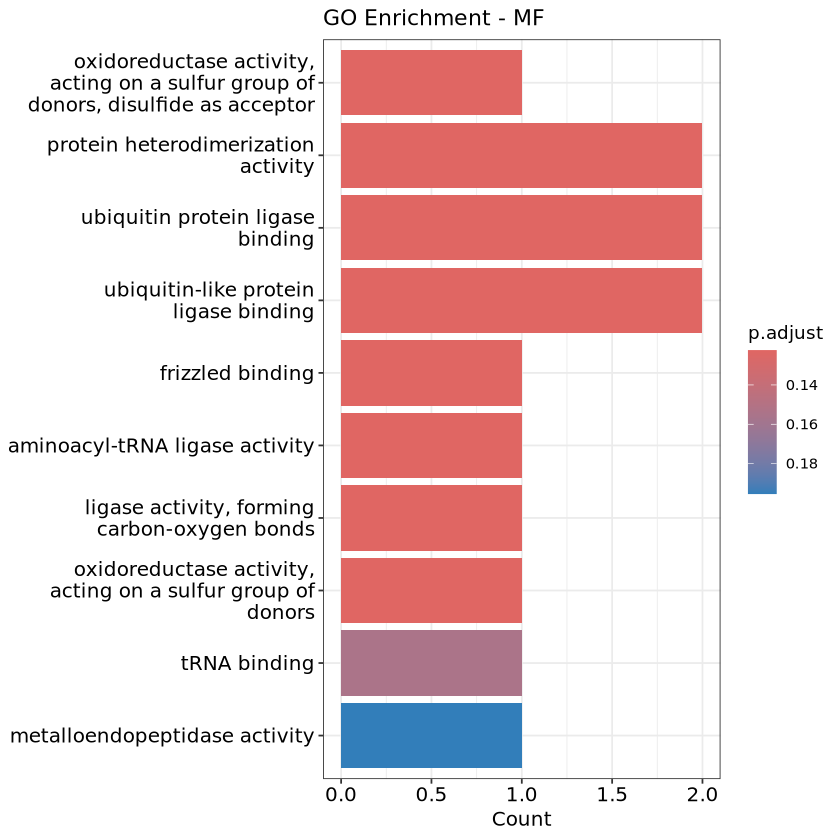

In [27]:
barplot(Aging3_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [28]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging3_sig_xqtl_MF.pdf', width = 6, height = 6)

In [45]:
entrez_ids <- bitr(Aging3_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(Aging3_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“5% of input gene IDs are fail to map...”


In [46]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa05022 Human Diseases                       Neurodegenerative disease       
hsa04310 Environmental Information Processing Signal transduction             
hsa05016 Human Diseases                       Neurodegenerative disease       
hsa05014 Human Diseases                       Neurodegenerative disease       
hsa05010 Human Diseases                       Neurodegenerative disease       
hsa03050 Genetic Information Processing       Folding, sorting and degradation
hsa03460 Genetic Information Processing       Replication and repair          
hsa05217 Human Diseases                       Cancer: specific types          
hsa00970 Genetic Information Processing       Translation                     
hsa04916 Organismal Systems                   Endocrine system                
         ID       Description                                       GeneRatio
hsa05022 hsa05022 Pathways of neurodegeneration - multiple diseases 3/6      
hsa04310 hsa04310 Wnt signaling pathway                             2/6      
hsa05016 hsa05016 Huntington disease                                2/6      
hsa05014 hsa05014 Amyotrophic lateral sclerosis                     2/6      
hsa05010 hsa05010 Alzheimer disease                                 2/6      
hsa03050 hsa03050 Proteasome                                        1/6      
hsa03460 hsa03460 Fanconi anemia pathway                            1/6      
hsa05217 hsa05217 Basal cell carcinoma                              1/6      
hsa00970 hsa00970 Aminoacyl-tRNA biosynthesis                       1/6      
hsa04916 hsa04916 Melanogenesis                                     1/6      
         BgRatio  pvalue      p.adjust   qvalue     geneID           Count
hsa05022 483/9440 0.002370550 0.06400485 0.04491569 51384/55860/5684 3    
hsa04310 174/9440 0.004826146 0.06515296 0.04572138 23002/51384      2    
hsa05016 311/9440 0.014864036 0.12370038 0.08680729 55860/5684       2    
hsa05014 371/9440 0.020802606 0.12370038 0.08680729 55860/5684       2    
hsa05010 391/9440 0.022976738 0.12370038 0.08680729 51384/5684       2    
hsa03050 46/9440  0.028890978 0.12370038 0.08680729 5684             1    
hsa03460 55/9440  0.034461379 0.12370038 0.08680729 55120            1    
hsa05217 63/9440  0.039390467 0.12370038 0.08680729 51384            1    
hsa00970 66/9440  0.041233461 0.12370038 0.08680729 2193             1    
hsa04916 101/9440 0.062518253 0.14450810 0.10140919 51384            1

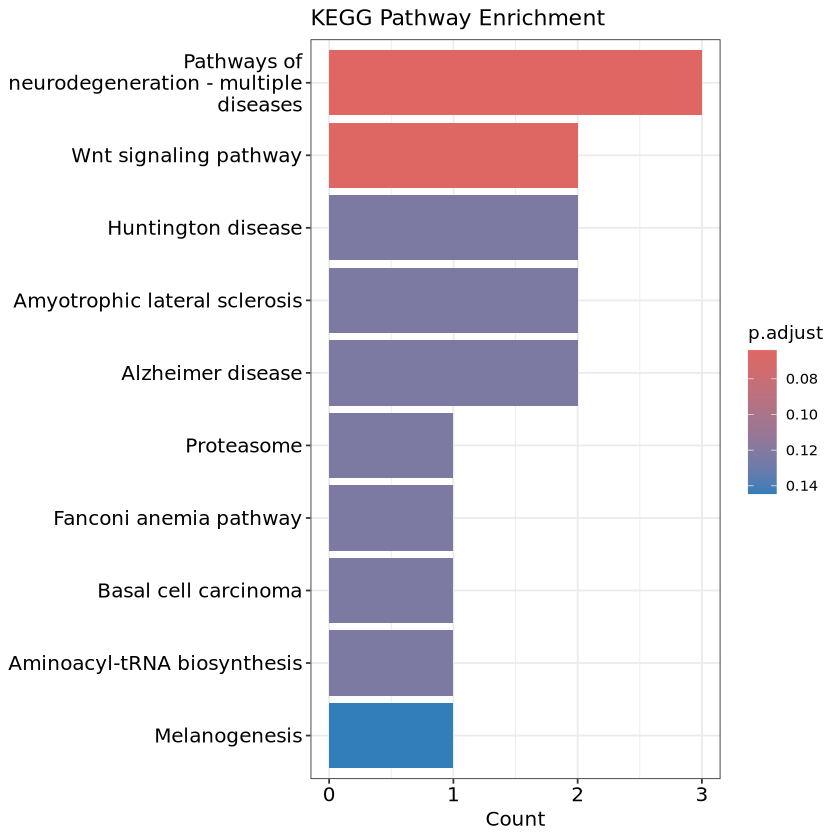

In [47]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [21]:
Aging4_bp_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [50]:
head(Aging4_bp_ego, n=20)

ID        
GO:0070098 GO:0070098
GO:1990868 GO:1990868
GO:1990869 GO:1990869
GO:0007187 GO:0007187
GO:0019932 GO:0019932
GO:0060326 GO:0060326
GO:0007204 GO:0007204
GO:0019722 GO:0019722
GO:1903564 GO:1903564
GO:0010752 GO:0010752
GO:0035524 GO:0035524
GO:0015824 GO:0015824
GO:0002076 GO:0002076
GO:0051382 GO:0051382
GO:0051383 GO:0051383
GO:0048520 GO:0048520
GO:0019934 GO:0019934
GO:0034508 GO:0034508
GO:0040036 GO:0040036
GO:0032506 GO:0032506
           Description                                                                                
GO:0070098 chemokine-mediated signaling pathway                                                       
GO:1990868 response to chemokine                                                                      
GO:1990869 cellular response to chemokine                                                             
GO:0007187 G protein-coupled receptor signaling pathway, coupled to cyclic nucleotide second messenger
GO:0019932 second-messenger-mediated signaling                                                        
GO:0060326 cell chemotaxis                                                                            
GO:0007204 positive regulation of cytosolic calcium ion concentration                                 
GO:0019722 calcium-mediated signaling                                                                 
GO:1903564 regulation of protein localization to cilium                                               
GO:0010752 regulation of cGMP-mediated signaling                                                      
GO:0035524 proline transmembrane transport                                                            
GO:0015824 proline transport                                                                          
GO:0002076 osteoblast development                                                                     
GO:0051382 kinetochore assembly                                                                       
GO:0051383 kinetochore organization                                                                   
GO:0048520 positive regulation of behavior                                                            
GO:0019934 cGMP-mediated signaling                                                                    
GO:0034508 centromere complex assembly                                                                
GO:0040036 regulation of fibroblast growth factor receptor signaling pathway                          
GO:0032506 cytokinetic process                                                                        
           GeneRatio BgRatio   pvalue       p.adjust    qvalue     
GO:0070098 5/51      106/21261 5.483001e-06 0.002755808 0.002433858
GO:1990868 5/51      114/21261 7.829001e-06 0.002755808 0.002433858
GO:1990869 5/51      114/21261 7.829001e-06 0.002755808 0.002433858
GO:0007187 4/51      57/21261  1.055992e-05 0.002787819 0.002462129
GO:0019932 7/51      339/21261 1.560837e-05 0.003296489 0.002911373
GO:0060326 7/51      378/21261 3.136082e-05 0.005519504 0.004874682
GO:0007204 5/51      176/21261 6.337975e-05 0.009561288 0.008444279
GO:0019722 5/51      231/21261 2.266815e-04 0.029921963 0.026426295
GO:1903564 2/51      11/21261  3.060195e-04 0.035199348 0.031087143
GO:0010752 2/51      12/21261  3.666599e-04 0.035199348 0.031087143
GO:0035524 2/51      12/21261  3.666599e-04 0.035199348 0.031087143
GO:0015824 2/51      13/21261  4.326605e-04 0.038074124 0.033626071
GO:0002076 2/51      17/21261  7.497654e-04 0.060904023 0.053788840
GO:0051382 2/51      18/21261  8.421931e-04 0.063525421 0.056103990
GO:0051383 2/51      22/21261  1.263770e-03 0.088969439 0.078575482
GO:0048520 2/51      27/21261  1.905617e-03 0.125770743 0.111077431
GO:0019934 2/51      33/21261  2.840356e-03 0.166634244 0.147167006
GO:0034508 2/51      33/21261  2.840356e-03 0.166634244 0.147167006
GO:0040036 2/51      41/21261  4.357518e-03 0.242186278 0.213892586
GO:0032506 2/51      44/21

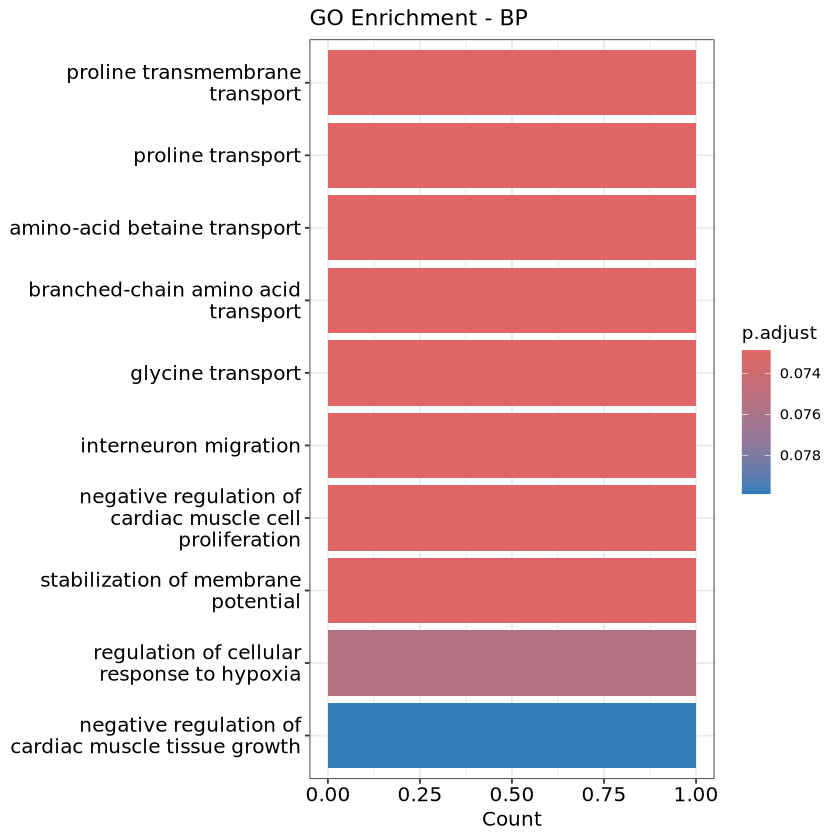

In [23]:
barplot(Aging4_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [32]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging4_sig_xqtl_BP.pdf', width = 6, height = 6)

In [18]:
Aging4_cc_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(Aging4_cc_ego, n=35)
# Aging4_cc_ego |> as.data.frame() |> dplyr::slice(36:70)

ID        
GO:0140268 GO:0140268
GO:0097449 GO:0097449
GO:0033276 GO:0033276
GO:0044305 GO:0044305
GO:0016324 GO:0016324
GO:0000124 GO:0000124
GO:0070461 GO:0070461
GO:0097386 GO:0097386
GO:0022625 GO:0022625
GO:0044232 GO:0044232
GO:0008076 GO:0008076
GO:0034705 GO:0034705
GO:0016591 GO:0016591
GO:0000123 GO:0000123
GO:0031248 GO:0031248
GO:1902493 GO:1902493
GO:0015934 GO:0015934
GO:0043679 GO:0043679
GO:0055029 GO:0055029
GO:0000428 GO:0000428
GO:0022626 GO:0022626
GO:0030880 GO:0030880
GO:0044306 GO:0044306
GO:1905368 GO:1905368
GO:0034703 GO:0034703
GO:0044391 GO:0044391
GO:0005840 GO:0005840
GO:0090575 GO:0090575
GO:0150034 GO:0150034
GO:0034702 GO:0034702
GO:0061695 GO:0061695
GO:1902495 GO:1902495
GO:1990351 GO:1990351
           Description                                                   
GO:0140268 endoplasmic reticulum-plasma membrane contact site            
GO:0097449 astrocyte projection                                          
GO:0033276 transcription factor TFTC complex                             
GO:0044305 calyx of Held                                                 
GO:0016324 apical plasma membrane                                        
GO:0000124 SAGA complex                                                  
GO:0070461 SAGA-type complex                                             
GO:0097386 glial cell projection                                         
GO:0022625 cytosolic large ribosomal subunit                             
GO:0044232 organelle membrane contact site                               
GO:0008076 voltage-gated potassium channel complex                       
GO:0034705 potassium channel complex                                     
GO:0016591 RNA polymerase II, holoenzyme                                 
GO:0000123 histone acetyltransferase complex                             
GO:0031248 protein acetyltransferase complex                             
GO:1902493 acetyltransferase complex                                     
GO:0015934 large ribosomal subunit                                       
GO:0043679 axon terminus                                                 
GO:0055029 nuclear DNA-directed RNA polymerase complex                   
GO:0000428 DNA-directed RNA polymerase complex                           
GO:0022626 cytosolic ribosome                                            
GO:0030880 RNA polymerase complex                                        
GO:0044306 neuron projection terminus                                    
GO:1905368 peptidase complex                                             
GO:0034703 cation channel complex                                        
GO:0044391 ribosomal subunit                                             
GO:0005840 ribosome                                                      
GO:0090575 RNA polymerase II transcription regulator complex             
GO:0150034 distal axon                                                   
GO:0034702 monoatomic ion channel complex                                
GO:0061695 transferase complex, transferring phosphorus-containing groups
GO:1902495 transmembrane transporter complex                             
GO:1990351 transporter complex                                           
           GeneRatio BgRatio   pvalue      p.adjust   qvalue    
GO:0140268 1/6       12/22568  0.003186473 0.03628085 0.01041556
GO:0097449 1/6       19/22568  0.005041338 0.03628085 0.01041556
GO:0033276 1/6       20/22568  0.005306083 0.03628085 0.01041556
GO:0044305 1/6       20/22568  0.005306083 0.03628085 0.01041556
GO:0016324 2/6       444/22568 0.005497099 0.03628085 0.01041556
GO:0000124 1/6       27/22568  0.007157660 0.03936713 0.01130157
GO:0070461 1/6       42/22568  0.011115655 0.04911091 0.01409882
GO:0097386 1/6       45/22568  0.011905674 0.04911091 0.01409882
GO:0022625 1/6       60/22568  0.015847884 0.05039698 0.01446803
GO:0044232 1/6       61/22568  0.016110232 0.05039698 0.01446803
GO:0008076 1/6       85/22568  0

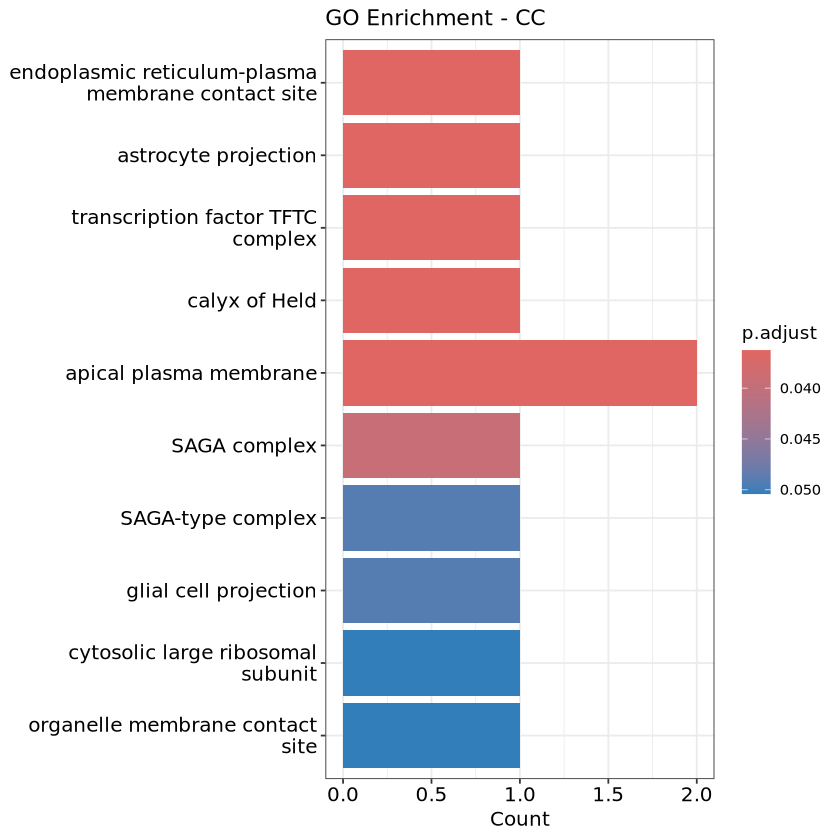

In [35]:
barplot(Aging4_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [36]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging4_sig_xqtl_CC.pdf', width = 6, height = 6)

In [23]:
Aging4_mf_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [25]:
head(Aging4_mf_ego, n=40)
# Aging4_mf_ego |> as.data.frame() |> dplyr::slice(41:70)

ID        
GO:0034596 GO:0034596
GO:0015658 GO:0015658
GO:0004438 GO:0004438
GO:0052744 GO:0052744
GO:0022841 GO:0022841
GO:0022840 GO:0022840
GO:0022842 GO:0022842
GO:0005283 GO:0005283
GO:0046873 GO:0046873
GO:0015651 GO:0015651
GO:0005416 GO:0005416
GO:0015271 GO:0015271
GO:0052866 GO:0052866
GO:0005343 GO:0005343
GO:0072349 GO:0072349
GO:0015101 GO:0015101
GO:0015175 GO:0015175
GO:0015179 GO:0015179
GO:0015370 GO:0015370
GO:0015171 GO:0015171
GO:0005249 GO:0005249
GO:0015294 GO:0015294
GO:0005267 GO:0005267
GO:0015293 GO:0015293
GO:0022843 GO:0022843
GO:0015081 GO:0015081
GO:0015079 GO:0015079
GO:0046943 GO:0046943
GO:0005342 GO:0005342
GO:0003735 GO:0003735
GO:0005244 GO:0005244
GO:0022832 GO:0022832
GO:0008514 GO:0008514
GO:0022853 GO:0022853
GO:0016791 GO:0016791
GO:0015291 GO:0015291
GO:0003713 GO:0003713
GO:0005261 GO:0005261
GO:0022839 GO:0022839
GO:0022836 GO:0022836
           Description                                                 
GO:0034596 phosphatidylinositol phosphate 4-phosphatase activity       
GO:0015658 branched-chain amino acid transmembrane transporter activity
GO:0004438 phosphatidylinositol-3-phosphate phosphatase activity       
GO:0052744 phosphatidylinositol monophosphate phosphatase activity     
GO:0022841 potassium ion leak channel activity                         
GO:0022840 leak channel activity                                       
GO:0022842 narrow pore channel activity                                
GO:0005283 amino acid:sodium symporter activity                        
GO:0046873 metal ion transmembrane transporter activity                
GO:0015651 quaternary ammonium group transmembrane transporter activity
GO:0005416 amino acid:monoatomic cation symporter activity             
GO:0015271 outward rectifier potassium channel activity                
GO:0052866 phosphatidylinositol phosphate phosphatase activity         
GO:0005343 organic acid:sodium symporter activity                      
GO:0072349 modified amino acid transmembrane transporter activity      
GO:0015101 organic cation transmembrane transporter activity           
GO:0015175 neutral L-amino acid transmembrane transporter activity     
GO:0015179 L-amino acid transmembrane transporter activity             
GO:0015370 solute:sodium symporter activity                            
GO:0015171 amino acid transmembrane transporter activity               
GO:0005249 voltage-gated potassium channel activity                    
GO:0015294 solute:monoatomic cation symporter activity                 
GO:0005267 potassium channel activity                                  
GO:0015293 symporter activity                                          
GO:0022843 voltage-gated monoatomic cation channel activity            
GO:0015081 sodium ion transmembrane transporter activity               
GO:0015079 potassium ion transmembrane transporter activity            
GO:0046943 carboxylic acid transmembrane transporter activity          
GO:0005342 organic acid transmembrane transporter activity             
GO:0003735 structural constituent of ribosome                          
GO:0005244 voltage-gated monoatomic ion channel activity               
GO:0022832 voltage-gated channel activity                              
GO:0008514 organic anion transmembrane transporter activity            
GO:0022853 active monoatomic ion transmembrane transporter activity    
GO:0016791 phosphatase activity                                        
GO:0015291 secondary active transmembrane transporter activity         
GO:0003713 transcription coactivator activity                          
GO:0005261 monoatomic cation channel activity                          
GO:0022839 monoatomic ion gated channel activity                       
GO:0022836 gated channel activity                                      
           GeneRatio BgRatio   pvalue      p.adjust   qvalue    
GO:0034596 1/6       10/21059  0.002846095 0.03052297 0.01046075
GO:0015658 1/6       11/210

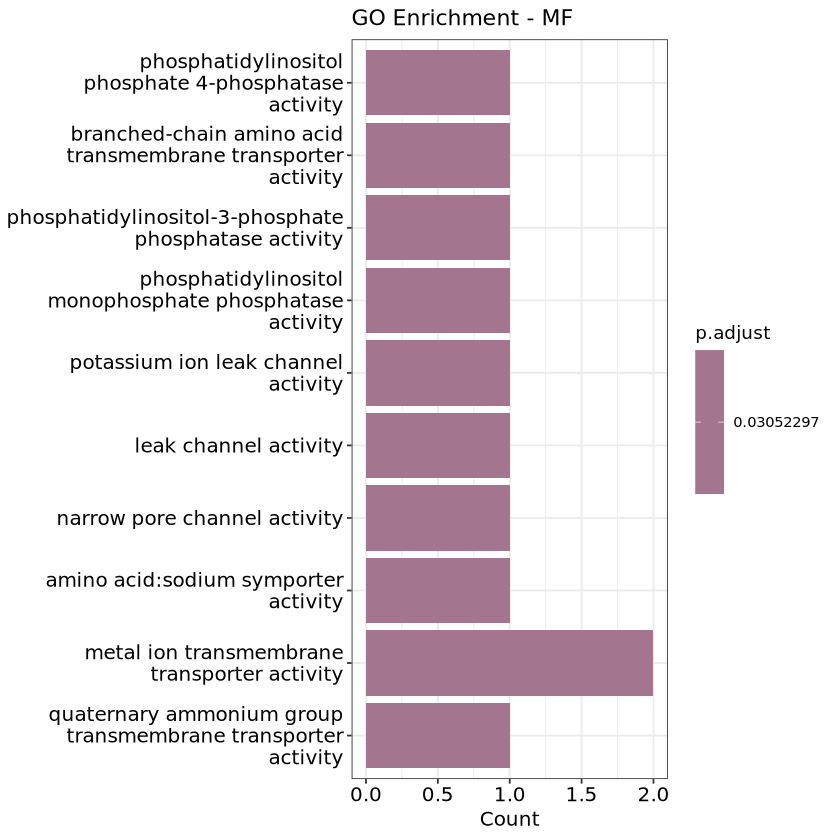

In [39]:
barplot(Aging4_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [40]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging4_sig_xqtl_MF.pdf', width = 6, height = 6)

In [26]:
entrez_ids <- bitr(Aging4_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(Aging4_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“12.5% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [27]:
kegg_enrich %>% head(n=15)

category                             subcategory                    
hsa04927 Organismal Systems                   Endocrine system               
hsa04971 Organismal Systems                   Digestive system               
hsa00562 Metabolism                           Carbohydrate metabolism        
hsa04070 Environmental Information Processing Signal transduction            
hsa04261 Organismal Systems                   Circulatory system             
hsa04934 Human Diseases                       Endocrine and metabolic disease
hsa05202 Human Diseases                       Cancer: overview               
hsa04024 Environmental Information Processing Signal transduction            
hsa05171 Human Diseases                       Infectious disease: viral      
         ID       Description                             GeneRatio BgRatio 
hsa04927 hsa04927 Cortisol synthesis and secretion        1/4       65/9446 
hsa04971 hsa04971 Gastric acid secretion                  1/4       76/9446 
hsa00562 hsa00562 Inositol phosphate metabolism           1/4       78/9446 
hsa04070 hsa04070 Phosphatidylinositol signaling system   1/4       98/9446 
hsa04261 hsa04261 Adrenergic signaling in cardiomyocytes  1/4       154/9446
hsa04934 hsa04934 Cushing syndrome                        1/4       155/9446
hsa05202 hsa05202 Transcriptional misregulation in cancer 1/4       201/9446
hsa04024 hsa04024 cAMP signaling pathway                  1/4       226/9446
hsa05171 hsa05171 Coronavirus disease - COVID-19          1/4       238/9446
         pvalue     p.adjust   qvalue     geneID Count
hsa04927 0.02724635 0.09194417 0.05376852 3776   1    
hsa04971 0.03180160 0.09194417 0.05376852 3776   1    
hsa00562 0.03262810 0.09194417 0.05376852 22908  1    
hsa04070 0.04086408 0.09194417 0.05376852 22908  1    
hsa04261 0.06364515 0.09607234 0.05618265 3776   1    
hsa04934 0.06404823 0.09607234 0.05618265 3776   1    
hsa05202 0.08244967 0.09705282 0.05675604 8464   1    
hsa04024 0.09233591 0.09705282 0.05675604 3776   1    
hsa05171 0.09705282 0.09705282 0.05675604 6137   1

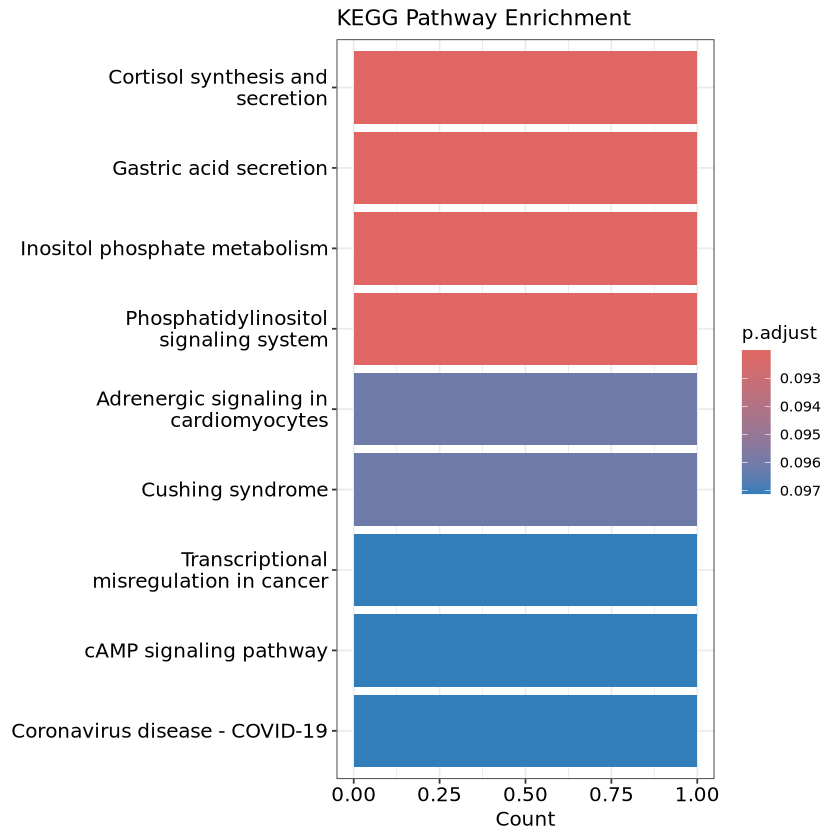

In [50]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [41]:
Aging5_bp_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [42]:
head(Aging5_bp_ego, n=5)

ID         Description                                     GeneRatio
GO:0007413 GO:0007413 axonal fasciculation                            2/42     
GO:0106030 GO:0106030 neuron projection fasciculation                 2/42     
GO:0043949 GO:0043949 regulation of cAMP-mediated signaling           2/42     
GO:0010863 GO:0010863 positive regulation of phospholipase C activity 2/42     
GO:1900274 GO:1900274 regulation of phospholipase C activity          2/42     
           BgRatio  pvalue       p.adjust  qvalue   
GO:0007413 22/21261 0.0008582398 0.2738429 0.2401023
GO:0106030 22/21261 0.0008582398 0.2738429 0.2401023
GO:0043949 31/21261 0.0017082762 0.2738429 0.2401023
GO:0010863 38/21261 0.0025601164 0.2738429 0.2401023
GO:1900274 40/21261 0.0028334376 0.2738429 0.2401023
           geneID                          Count
GO:0007413 ENSG00000044524/ENSG00000184144 2    
GO:0106030 ENSG00000044524/ENSG00000184144 2    
GO:0043949 ENSG00000198121/ENSG00000159224 2    
GO:0010863 ENSG00000198121/ENSG00000134853 2    
GO:1900274 ENSG00000198121/ENSG00000134853 2

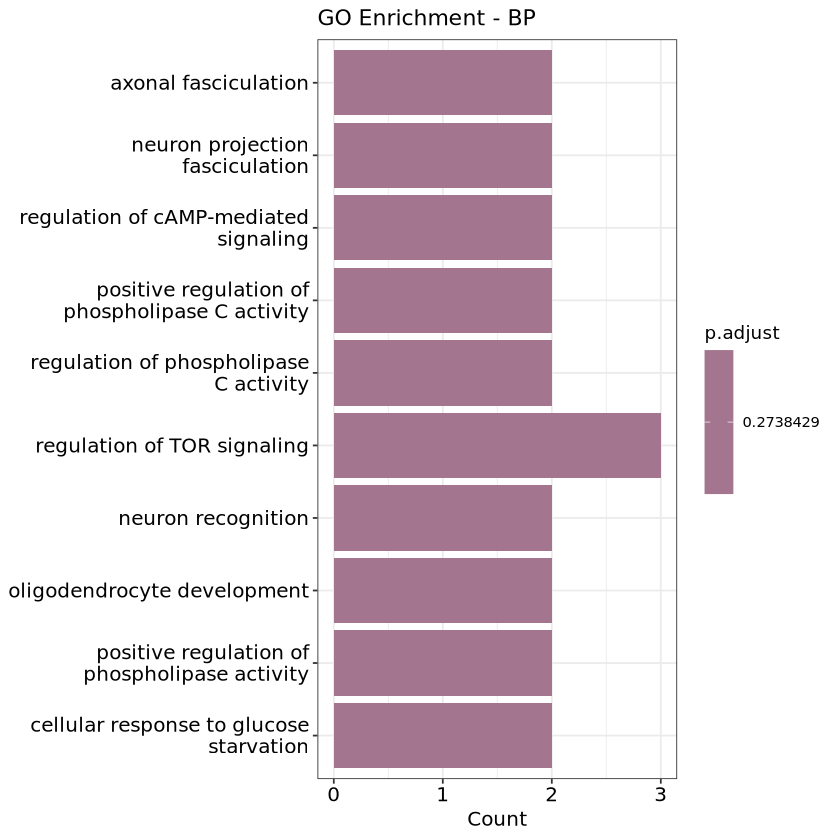

In [43]:
barplot(Aging5_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [44]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging5_sig_xqtl_BP.pdf', width = 6, height = 6)

In [45]:
Aging5_cc_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [46]:
head(Aging5_cc_ego, n=10)

ID        
GO:0031588 GO:0031588
GO:0098858 GO:0098858
GO:0000276 GO:0000276
GO:0044666 GO:0044666
GO:0030175 GO:0030175
GO:0031209 GO:0031209
GO:0044224 GO:0044224
GO:0045263 GO:0045263
GO:0048188 GO:0048188
GO:0098574 GO:0098574
           Description                                                                 
GO:0031588 nucleotide-activated protein kinase complex                                 
GO:0098858 actin-based cell projection                                                 
GO:0000276 mitochondrial proton-transporting ATP synthase complex, coupling factor F(o)
GO:0044666 MLL3/4 complex                                                              
GO:0030175 filopodium                                                                  
GO:0031209 SCAR complex                                                                
GO:0044224 juxtaparanode region of axon                                                
GO:0045263 proton-transporting ATP synthase complex, coupling factor F(o)              
GO:0048188 Set1C/COMPASS complex                                                       
GO:0098574 cytoplasmic side of lysosomal membrane                                      
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0031588 2/45      15/22568  0.0004015284 0.04617577 0.04099817
GO:0098858 3/45      256/22568 0.0144169006 0.29094342 0.25832048
GO:0000276 1/45      11/22568  0.0217211030 0.29094342 0.25832048
GO:0044666 1/45      12/22568  0.0236727167 0.29094342 0.25832048
GO:0030175 2/45      127/22568 0.0265696084 0.29094342 0.25832048
GO:0031209 1/45      14/22568  0.0275645304 0.29094342 0.25832048
GO:0044224 1/45      14/22568  0.0275645304 0.29094342 0.25832048
GO:0045263 1/45      14/22568  0.0275645304 0.29094342 0.25832048
GO:0048188 1/45      15/22568  0.0295047448 0.29094342 0.25832048
GO:0098574 1/45      16/22568  0.0314411739 0.29094342 0.25832048
           geneID                                          Count
GO:0031588 ENSG00000163545/ENSG00000074590                 2    
GO:0098858 ENSG00000138443/ENSG00000134853/ENSG00000173166 3    
GO:0000276 ENSG00000159199                                 1    
GO:0044666 ENSG00000117222                                 1    
GO:0030175 ENSG00000138443/ENSG00000173166                 2    
GO:0031209 ENSG00000138443                                 1    
GO:0044224 ENSG00000184144                                 1    
GO:0045263 ENSG00000159199                                 1    
GO:0048188 ENSG00000117222                                 1    
GO:0098574 ENSG00000166275                                 1

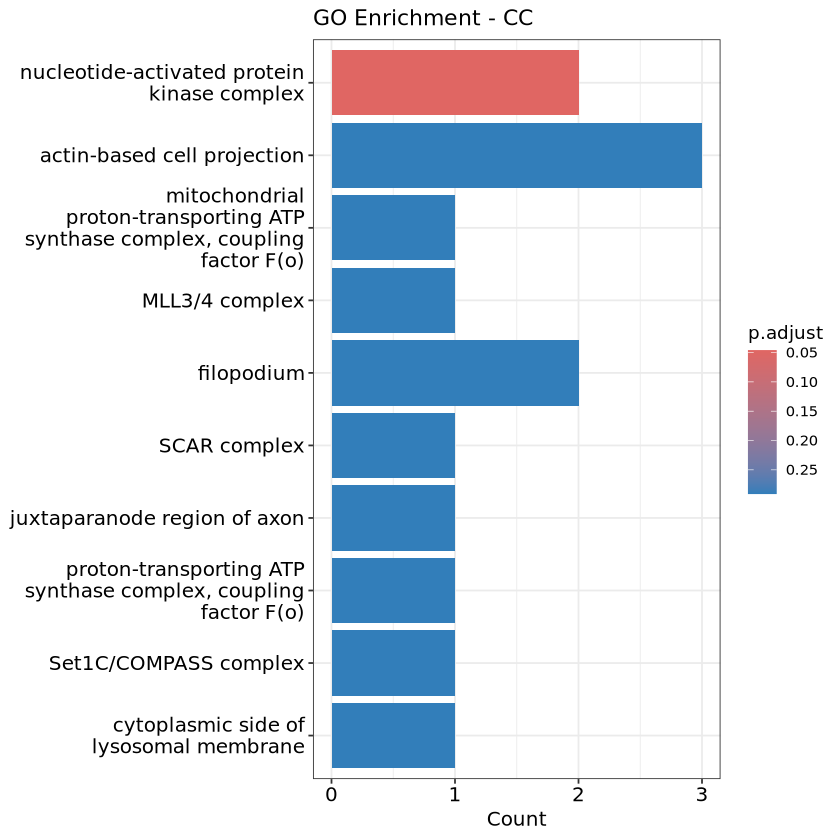

In [47]:
barplot(Aging5_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [48]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging5_sig_xqtl_CC.pdf', width = 6, height = 6)

In [49]:
Aging5_mf_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [50]:
head(Aging5_mf_ego, n=5)

ID         Description                                             
GO:0004713 GO:0004713 protein tyrosine kinase activity                        
GO:0004714 GO:0004714 transmembrane receptor protein tyrosine kinase activity 
GO:0019199 GO:0019199 transmembrane receptor protein kinase activity          
GO:0016868 GO:0016868 intramolecular transferase activity, phosphotransferases
GO:0022889 GO:0022889 serine transmembrane transporter activity               
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0004713 3/44      154/21059 0.004077825 0.2047464 0.1642918
GO:0004714 2/44      69/21059  0.009158952 0.2047464 0.1642918
GO:0019199 2/44      88/21059  0.014575435 0.2047464 0.1642918
GO:0016868 1/44      10/21059  0.020702707 0.2047464 0.1642918
GO:0022889 1/44      10/21059  0.020702707 0.2047464 0.1642918
           geneID                                          Count
GO:0004713 ENSG00000044524/ENSG00000133059/ENSG00000134853 3    
GO:0004714 ENSG00000044524/ENSG00000134853                 2    
GO:0019199 ENSG00000044524/ENSG00000134853                 2    
GO:0016868 ENSG00000172331                                 1    
GO:0022889 ENSG00000156398                                 1

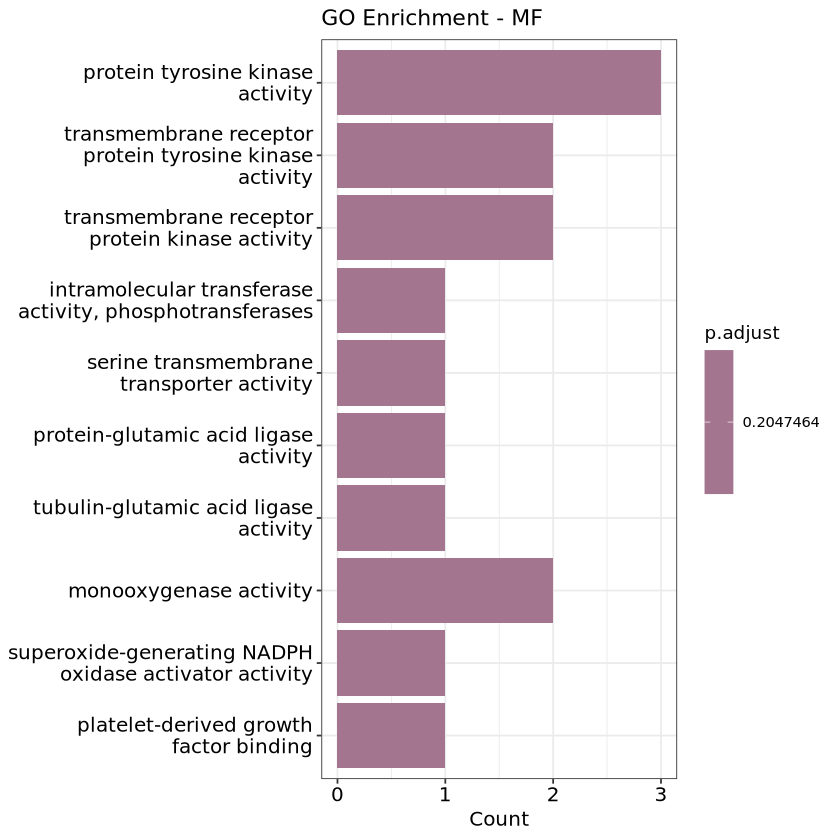

In [51]:
barplot(Aging5_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [52]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/figs/image_Aging5_sig_xqtl_MF.pdf', width = 6, height = 6)

In [51]:
entrez_ids <- bitr(Aging5_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging5_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“1.56% of input gene IDs are fail to map...”


In [52]:
kegg_enrich %>% head(n=10)

category                            
hsa04810 Cellular Processes                  
hsa04072 Environmental Information Processing
hsa04540 Cellular Processes                  
hsa04270 Organismal Systems                  
hsa04934 Human Diseases                      
hsa04514 Environmental Information Processing
hsa05310 Human Diseases                      
hsa05130 Human Diseases                      
hsa04015 Environmental Information Processing
hsa04081 NA                                  
         subcategory                         ID      
hsa04810 Cell motility                       hsa04810
hsa04072 Signal transduction                 hsa04072
hsa04540 Cellular community - eukaryotes     hsa04540
hsa04270 Circulatory system                  hsa04270
hsa04934 Endocrine and metabolic disease     hsa04934
hsa04514 Signaling molecules and interaction hsa04514
hsa05310 Immune disease                      hsa05310
hsa05130 Infectious disease: bacterial       hsa05130
hsa04015 Signal transduction                 hsa04015
hsa04081 NA                                  hsa04081
         Description                           GeneRatio BgRatio  pvalue     
hsa04810 Regulation of actin cytoskeleton      4/20      232/9440 0.001263227
hsa04072 Phospholipase D signaling pathway     3/20      149/9440 0.003607585
hsa04540 Gap junction                          2/20      92/9440  0.015927173
hsa04270 Vascular smooth muscle contraction    2/20      134/9440 0.032157068
hsa04934 Cushing syndrome                      2/20      155/9440 0.041947963
hsa04514 Cell adhesion molecules               2/20      160/9440 0.044427304
hsa05310 Asthma                                1/20      32/9440  0.065721153
hsa05130 Pathogenic Escherichia coli infection 2/20      203/9440 0.067856925
hsa04015 Rap1 signaling pathway                2/20      212/9440 0.073195236
hsa04081 Hormone signaling                     2/20      219/9440 0.077440979
         p.adjust  qvalue     geneID               Count
hsa04810 0.1023214 0.09972848 10152/1902/2768/5156 4    
hsa04072 0.1461072 0.14240468 1902/2768/5156       3    
hsa04540 0.3231249 0.31493660 1902/5156            2    
hsa04270 0.3231249 0.31493660 2768/800             2    
hsa04934 0.3231249 0.31493660 1586/5929            2    
hsa04514 0.3231249 0.31493660 3127/6900            2    
hsa05310 0.3231249 0.31493660 3127                 1    
hsa05130 0.3231249 0.31493660 1902/2768            2    
hsa04015 0.3231249 0.31493660 1902/5156            2    
hsa04081 0.3231249 0.31493660 2695/2768            2

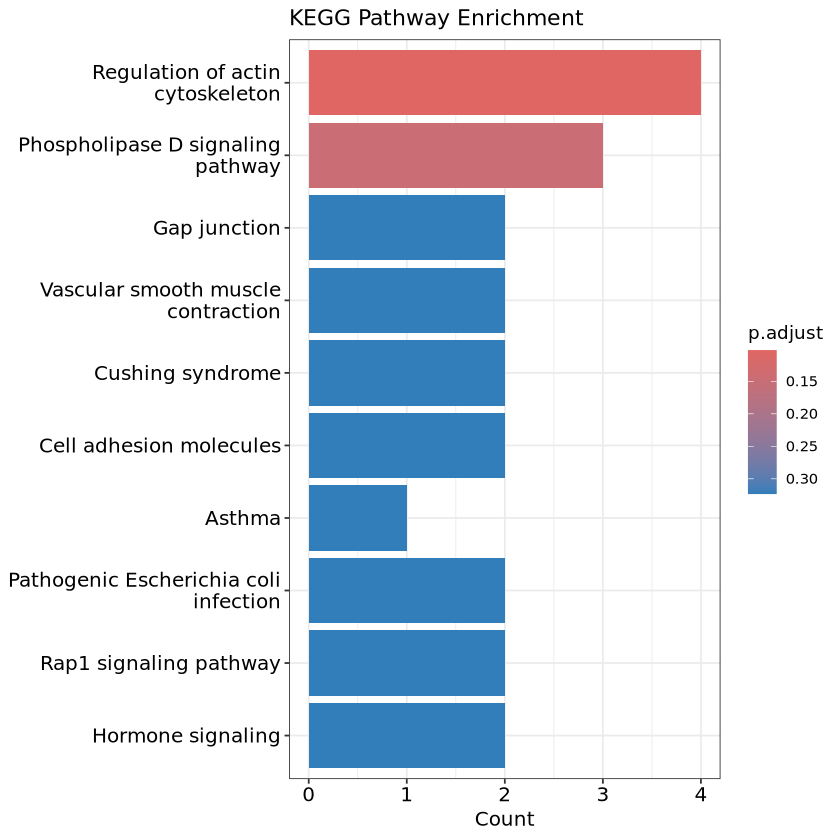

In [53]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## within 500kb window

In [28]:
AD1_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/AD1_window_5e+05bp.tsv")
AD2_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/AD2_window_5e+05bp.tsv")
Aging1_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging1_window_5e+05bp.tsv")
Aging2_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging2_window_5e+05bp.tsv")
Aging3_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging3_window_5e+05bp.tsv")
Aging4_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging4_window_5e+05bp.tsv")
Aging5_window = fread("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/Aging5_window_5e+05bp.tsv")




In [29]:
AD1_gene = unique(AD1_window$ENSG_ID)
AD2_gene = unique(AD2_window$ENSG_ID)
Aging1_gene = unique(Aging1_window$ENSG_ID)
Aging2_gene = unique(Aging2_window$ENSG_ID)
Aging3_gene = unique(Aging3_window$ENSG_ID)
Aging4_gene = unique(Aging4_window$ENSG_ID)
Aging5_gene = unique(Aging5_window$ENSG_ID)


## Functional Enrichment

In [30]:
library(clusterProfiler)
library(org.Hs.eg.db)


In [30]:
AD1_bp_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [31]:
head(AD1_bp_ego, n=10)

ID         Description                                    GeneRatio
GO:0032306 GO:0032306 regulation of prostaglandin secretion          3/96     
GO:0032308 GO:0032308 positive regulation of prostaglandin secretion 3/96     
GO:0032310 GO:0032310 prostaglandin secretion                        3/96     
GO:0032305 GO:0032305 positive regulation of icosanoid secretion     3/96     
GO:0032303 GO:0032303 regulation of icosanoid secretion              3/96     
GO:2000193 GO:2000193 positive regulation of fatty acid transport    3/96     
GO:0015732 GO:0015732 prostaglandin transport                        3/96     
GO:2000191 GO:2000191 regulation of fatty acid transport             3/96     
GO:0032370 GO:0032370 positive regulation of lipid transport         4/96     
GO:0032309 GO:0032309 icosanoid secretion                            3/96     
           BgRatio  pvalue       p.adjust   qvalue    
GO:0032306 15/21261 3.902418e-05 0.03147300 0.03031562
GO:0032308 15/21261 3.902418e-05 0.03147300 0.03031562
GO:0032310 19/21261 8.202590e-05 0.04164317 0.04011180
GO:0032305 21/21261 1.118492e-04 0.04164317 0.04011180
GO:0032303 22/21261 1.290861e-04 0.04164317 0.04011180
GO:2000193 25/21261 1.909063e-04 0.05132199 0.04943469
GO:0015732 30/21261 3.315229e-04 0.07639235 0.07358313
GO:2000191 33/21261 4.411661e-04 0.08895011 0.08567910
GO:0032370 91/21261 7.725169e-04 0.13845219 0.13336081
GO:0032309 50/21261 1.499308e-03 0.20555023 0.19799141
           geneID                                                         
GO:0032306 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0032308 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0032310 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0032305 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0032303 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:2000193 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0015732 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:2000191 ENSG00000135124/ENSG00000089041/ENSG00000108984                
GO:0032370 ENSG00000154265/ENSG00000135124/ENSG00000089041/ENSG00000108984
GO:0032309 ENSG00000135124/ENSG00000089041/ENSG00000108984                
           Count
GO:0032306 3    
GO:0032308 3    
GO:0032310 3    
GO:0032305 3    
GO:0032303 3    
GO:2000193 3    
GO:0015732 3    
GO:2000191 3    
GO:0032370 4    
GO:0032309 3

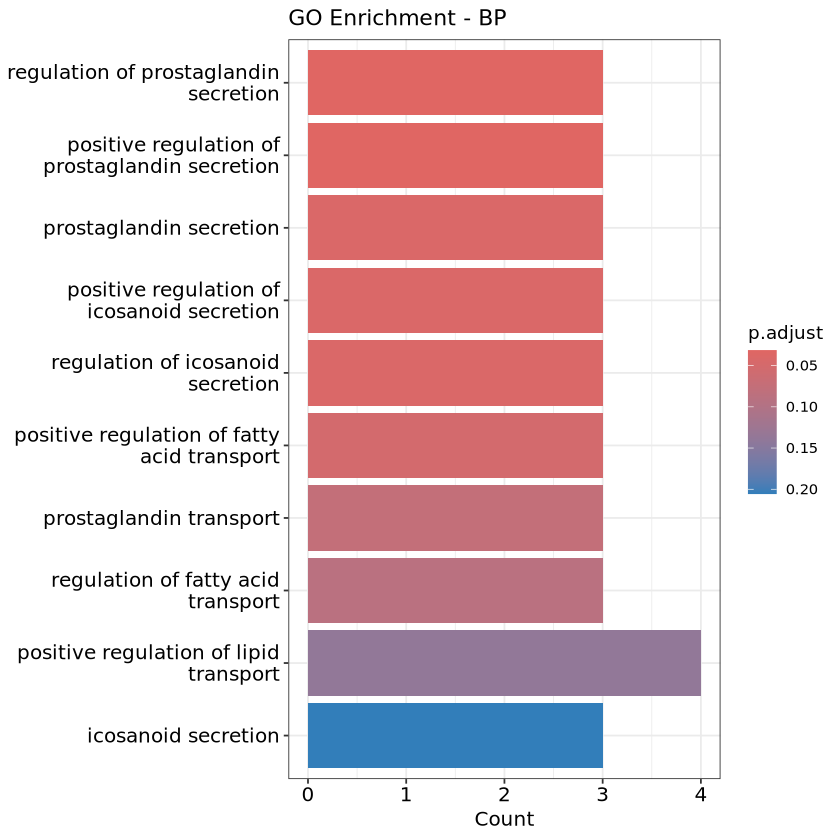

In [70]:
barplot(AD1_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [72]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD1_sig_xqtl_BP.pdf', width = 6, height = 6)

In [73]:
AD1_cc_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [74]:
head(AD1_cc_ego, n=10)

ID        
GO:0000502 GO:0000502
GO:1905369 GO:1905369
GO:1905368 GO:1905368
GO:0140534 GO:0140534
GO:0005875 GO:0005875
GO:0005844 GO:0005844
GO:0032059 GO:0032059
GO:0042721 GO:0042721
GO:0071014 GO:0071014
GO:0036064 GO:0036064
           Description                                                
GO:0000502 proteasome complex                                         
GO:1905369 endopeptidase complex                                      
GO:1905368 peptidase complex                                          
GO:0140534 endoplasmic reticulum protein-containing complex           
GO:0005875 microtubule associated complex                             
GO:0005844 polysome                                                   
GO:0032059 bleb                                                       
GO:0042721 TIM22 mitochondrial import inner membrane insertion complex
GO:0071014 post-mRNA release spliceosomal complex                     
GO:0036064 ciliary basal body                                         
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0000502 3/97      79/22568  0.004806325 0.5255687 0.5227772
GO:1905369 3/97      103/22568 0.009983025 0.5255687 0.5227772
GO:1905368 3/97      140/22568 0.022559912 0.5255687 0.5227772
GO:0140534 3/97      156/22568 0.029794477 0.5255687 0.5227772
GO:0005875 3/97      165/22568 0.034340312 0.5255687 0.5227772
GO:0005844 2/97      68/22568  0.034667271 0.5255687 0.5227772
GO:0032059 1/97      10/22568  0.042167593 0.5255687 0.5227772
GO:0042721 1/97      10/22568  0.042167593 0.5255687 0.5227772
GO:0071014 1/97      10/22568  0.042167593 0.5255687 0.5227772
GO:0036064 3/97      181/22568 0.043255993 0.5255687 0.5227772
           geneID                                          Count
GO:0000502 ENSG00000100567/ENSG00000110801/ENSG00000179262 3    
GO:1905369 ENSG00000100567/ENSG00000110801/ENSG00000179262 3    
GO:1905368 ENSG00000100567/ENSG00000110801/ENSG00000179262 3    
GO:0140534 ENSG00000185104/ENSG00000198356/ENSG00000179218 3    
GO:0005875 ENSG00000047849/ENSG00000131966/ENSG00000088727 3    
GO:0005844 ENSG00000162374/ENSG00000179218                 2    
GO:0032059 ENSG00000089041                                 1    
GO:0042721 ENSG00000100575                                 1    
GO:0071014 ENSG00000160799                                 1    
GO:0036064 ENSG00000100592/ENSG00000076201/ENSG00000100578 3

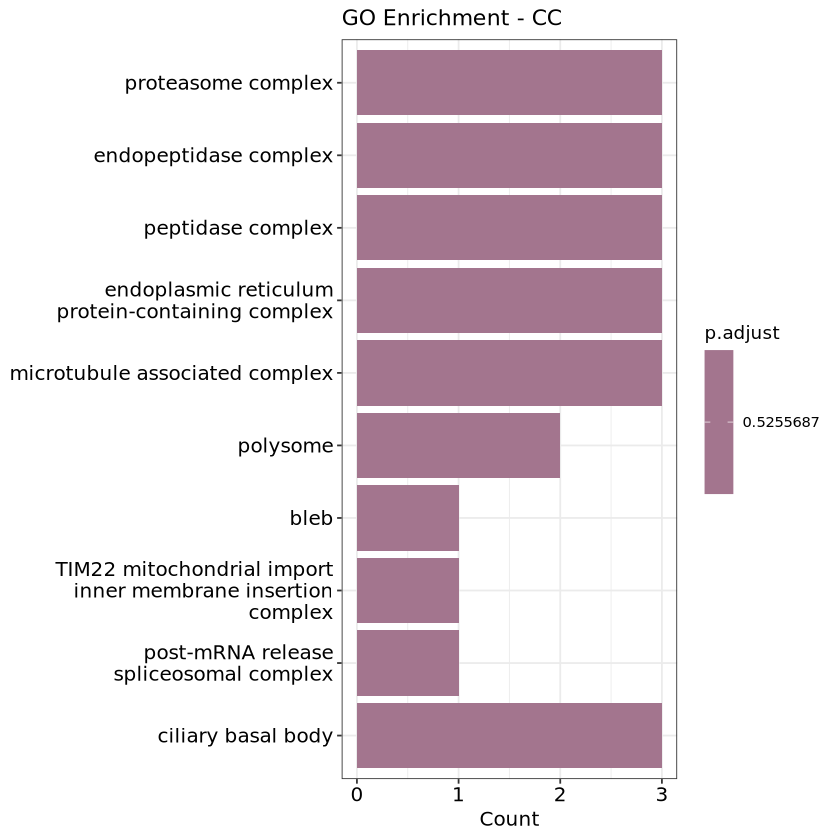

In [75]:
barplot(AD1_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [76]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD1_sig_xqtl_CC.pdf', width = 6, height = 6)

In [77]:
AD1_mf_ego <- enrichGO(
  gene          = AD1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [78]:
head(AD1_mf_ego, n=5)

ID         Description                             GeneRatio
GO:0140104 GO:0140104 molecular carrier activity              4/96     
GO:0032977 GO:0032977 membrane insertase activity             2/96     
GO:0001614 GO:0001614 purinergic nucleotide receptor activity 2/96     
GO:0016502 GO:0016502 nucleotide receptor activity            2/96     
GO:0140142 GO:0140142 nucleocytoplasmic carrier activity      2/96     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0140104 101/21059 0.001180922 0.2622490 0.2287898
GO:0032977 19/21059  0.003343420 0.2622490 0.2287898
GO:0001614 21/21059  0.004081696 0.2622490 0.2287898
GO:0016502 21/21059  0.004081696 0.2622490 0.2287898
GO:0140142 34/21059  0.010493022 0.2857311 0.2492760
           geneID                                                         
GO:0140104 ENSG00000100575/ENSG00000105576/ENSG00000198356/ENSG00000179218
GO:0032977 ENSG00000100575/ENSG00000198356                                
GO:0001614 ENSG00000135124/ENSG00000089041                                
GO:0016502 ENSG00000135124/ENSG00000089041                                
GO:0140142 ENSG00000105576/ENSG00000179218                                
           Count
GO:0140104 4    
GO:0032977 2    
GO:0001614 2    
GO:0016502 2    
GO:0140142 2

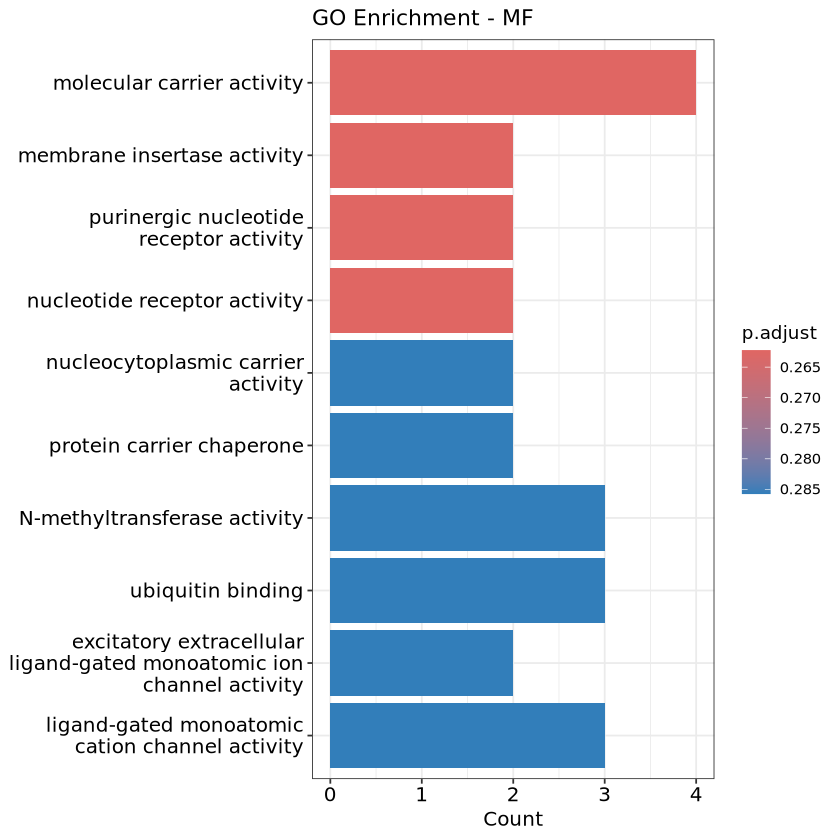

In [79]:
barplot(AD1_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [80]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD1_sig_xqtl_MF.pdf', width = 6, height = 6)

In [56]:
entrez_ids <- bitr(AD1_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(AD1_gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“0.79% of input gene IDs are fail to map...”


In [57]:
kegg_enrich %>% head(n=10)

category                            
hsa00310 Metabolism                          
hsa03050 Genetic Information Processing      
hsa05017 Human Diseases                      
hsa04020 Environmental Information Processing
hsa00130 Metabolism                          
hsa04814 Cellular Processes                  
hsa00360 Metabolism                          
hsa00511 Metabolism                          
hsa05014 Human Diseases                      
hsa04668 Environmental Information Processing
         subcategory                          ID      
hsa00310 Amino acid metabolism                hsa00310
hsa03050 Folding, sorting and degradation     hsa03050
hsa05017 Neurodegenerative disease            hsa05017
hsa04020 Signal transduction                  hsa04020
hsa00130 Metabolism of cofactors and vitamins hsa00130
hsa04814 Cell motility                        hsa04814
hsa00360 Amino acid metabolism                hsa00360
hsa00511 Glycan biosynthesis and metabolism   hsa00511
hsa05014 Neurodegenerative disease            hsa05014
hsa04668 Signal transduction                  hsa04668
         Description                                         GeneRatio BgRatio 
hsa00310 Lysine degradation                                  3/44      63/9440 
hsa03050 Proteasome                                          2/44      46/9440 
hsa05017 Spinocerebellar ataxia                              3/44      144/9440
hsa04020 Calcium signaling pathway                           4/44      254/9440
hsa00130 Ubiquinone and other terpenoid-quinone biosynthesis 1/44      12/9440 
hsa04814 Motor proteins                                      3/44      197/9440
hsa00360 Phenylalanine metabolism                            1/44      16/9440 
hsa00511 Other glycan degradation                            1/44      18/9440 
hsa05014 Amyotrophic lateral sclerosis                       4/44      371/9440
hsa04668 TNF signaling pathway                               2/44      119/9440
         pvalue      p.adjust  qvalue    geneID               Count
hsa00310 0.003087475 0.3550596 0.3550596 23067/2639/29072     3    
hsa03050 0.019299753 0.6081414 0.6081414 5684/5715            2    
hsa05017 0.029200668 0.6081414 0.6081414 5684/5715/773        3    
hsa04020 0.029950661 0.6081414 0.6081414 5025/5027/773/84876  4    
hsa00130 0.054551374 0.6081414 0.6081414 3242                 1    
hsa04814 0.063528560 0.6081414 0.6081414 4634/55860/64147     3    
hsa00360 0.072080418 0.6081414 0.6081414 3242                 1    
hsa00511 0.080725431 0.6081414 0.6081414 4125                 1    
hsa05014 0.093207531 0.6081414 0.6081414 55860/5608/5684/5715 4    
hsa04668 0.105957847 0.6081414 0.6081414 3726/5608            2

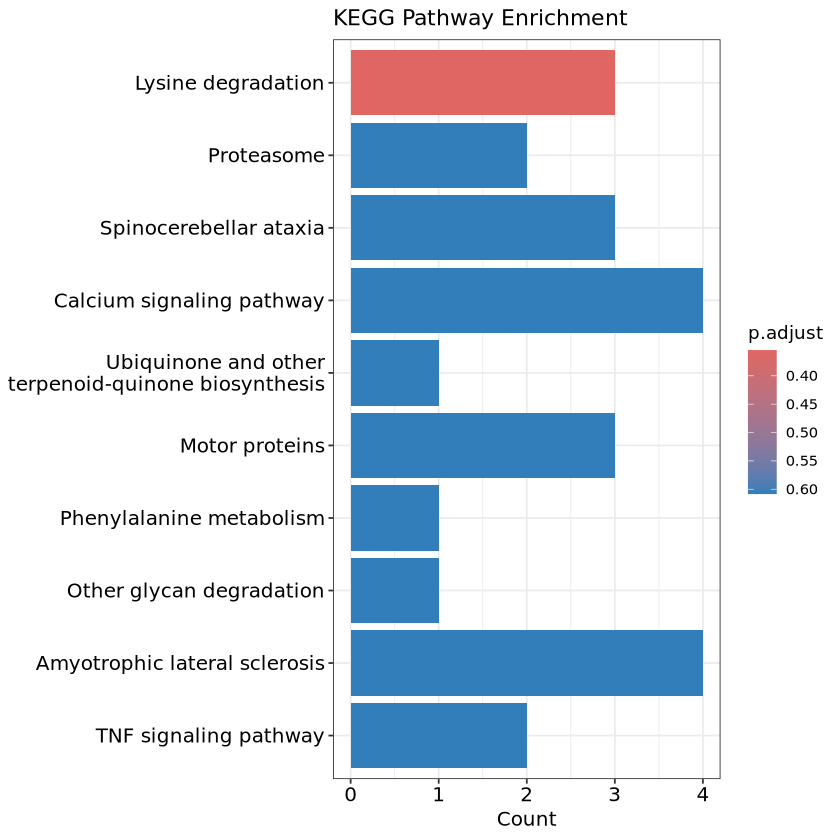

In [58]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [81]:
AD2_bp_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [82]:
head(AD2_bp_ego, n=5)

ID        
GO:0006750 GO:0006750
GO:0019184 GO:0019184
GO:0050769 GO:0050769
GO:0045981 GO:0045981
GO:1900544 GO:1900544
           Description                                                GeneRatio
GO:0006750 glutathione biosynthetic process                           2/70     
GO:0019184 nonribosomal peptide biosynthetic process                  2/70     
GO:0050769 positive regulation of neurogenesis                        5/70     
GO:0045981 positive regulation of nucleotide metabolic process        2/70     
GO:1900544 positive regulation of purine nucleotide metabolic process 2/70     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0006750 16/21261  0.001244577 0.3711788 0.3456573
GO:0019184 18/21261  0.001580098 0.3711788 0.3456573
GO:0050769 270/21261 0.001966139 0.3711788 0.3456573
GO:0045981 21/21261  0.002154972 0.3711788 0.3456573
GO:1900544 21/21261  0.002154972 0.3711788 0.3456573
           geneID                                                                         
GO:0006750 ENSG00000131067/ENSG00000100983                                                
GO:0019184 ENSG00000131067/ENSG00000100983                                                
GO:0050769 ENSG00000187764/ENSG00000145681/ENSG00000038427/ENSG00000119401/ENSG00000174989
GO:0045981 ENSG00000089250/ENSG00000078237                                                
GO:1900544 ENSG00000089250/ENSG00000078237                                                
           Count
GO:0006750 2    
GO:0019184 2    
GO:0050769 5    
GO:0045981 2    
GO:1900544 2

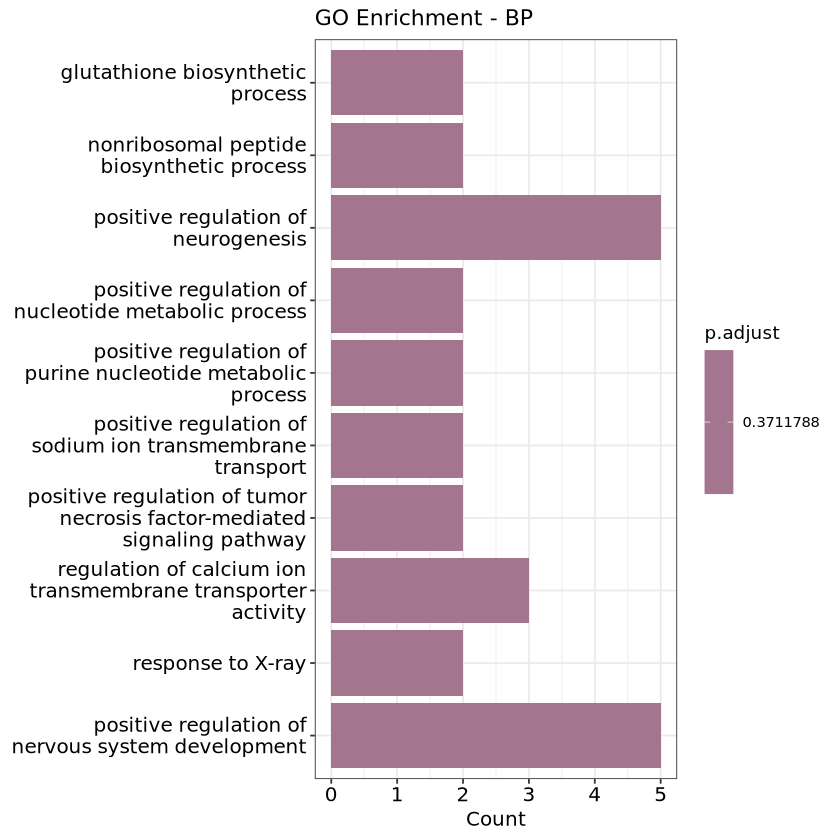

In [83]:
barplot(AD2_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [84]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD2_sig_xqtl_BP.pdf', width = 6, height = 6)

In [85]:
AD2_cc_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [86]:
head(AD2_cc_ego, n=10)

ID         Description                                       
GO:0072534 GO:0072534 perineuronal net                                  
GO:0098966 GO:0098966 perisynaptic extracellular matrix                 
GO:0099535 GO:0099535 synapse-associated extracellular matrix           
GO:0032982 GO:0032982 myosin filament                                   
GO:0031965 GO:0031965 nuclear membrane                                  
GO:0000307 GO:0000307 cyclin-dependent protein kinase holoenzyme complex
GO:0005637 GO:0005637 nuclear inner membrane                            
GO:0019005 GO:0019005 SCF ubiquitin ligase complex                      
GO:0036064 GO:0036064 ciliary basal body                                
GO:0000151 GO:0000151 ubiquitin ligase complex                          
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0072534 2/70      11/22568  0.0005122592 0.03111337 0.02691161
GO:0098966 2/70      12/22568  0.0006134785 0.03111337 0.02691161
GO:0099535 2/70      13/22568  0.0007235667 0.03111337 0.02691161
GO:0032982 2/70      26/22568  0.0029373544 0.09472968 0.08193673
GO:0031965 5/70      348/22568 0.0045201071 0.11661876 0.10086976
GO:0000307 2/70      55/22568  0.0126673434 0.23203474 0.20069916
GO:0005637 2/70      66/22568  0.0179020866 0.23203474 0.20069916
GO:0019005 2/70      66/22568  0.0179020866 0.23203474 0.20069916
GO:0036064 3/70      181/22568 0.0187570936 0.23203474 0.20069916
GO:0000151 4/70      335/22568 0.0203169254 0.23203474 0.20069916
           geneID                                                                         
GO:0072534 ENSG00000145681/ENSG00000038427                                                
GO:0098966 ENSG00000145681/ENSG00000038427                                                
GO:0099535 ENSG00000145681/ENSG00000038427                                                
GO:0032982 ENSG00000119401/ENSG00000078814                                                
GO:0031965 ENSG00000174106/ENSG00000025293/ENSG00000061656/ENSG00000214078/ENSG00000118971
GO:0000307 ENSG00000123975/ENSG00000118971                                                
GO:0005637 ENSG00000174106/ENSG00000061656                                                
GO:0019005 ENSG00000123975/ENSG00000174989                                                
GO:0036064 ENSG00000126001/ENSG00000111490/ENSG00000174989                                
GO:0000151 ENSG00000123975/ENSG00000135108/ENSG00000100991/ENSG00000174989                
           Count
GO:0072534 2    
GO:0098966 2    
GO:0099535 2    
GO:0032982 2    
GO:0031965 5    
GO:0000307 2    
GO:0005637 2    
GO:0019005 2    
GO:0036064 3    
GO:0000151 4

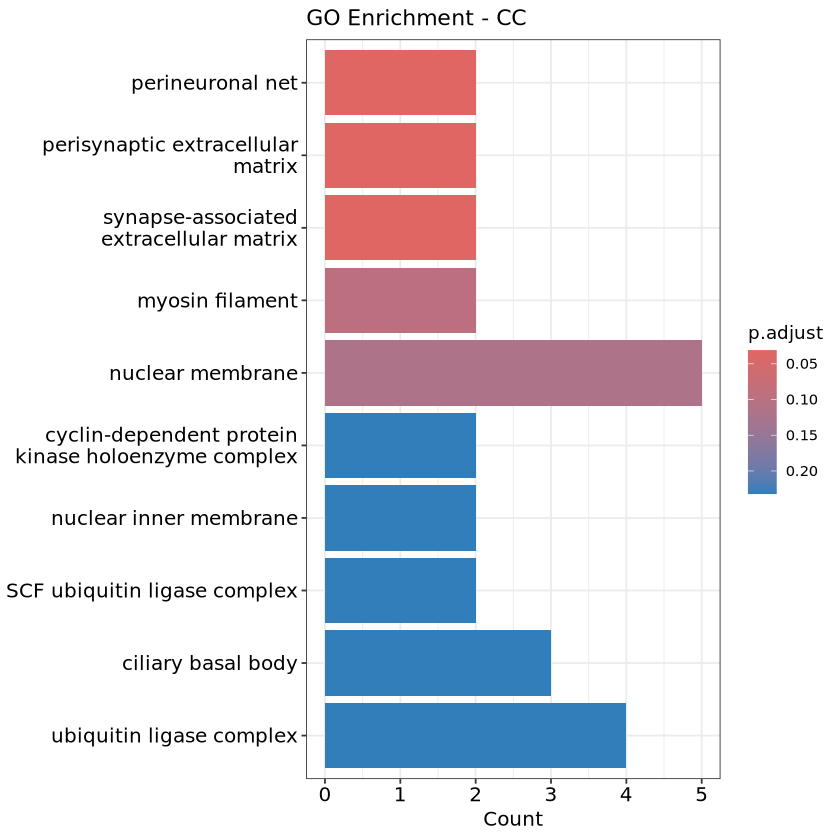

In [87]:
barplot(AD2_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [88]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [89]:
AD2_mf_ego <- enrichGO(
  gene          = AD2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [90]:
head(AD2_mf_ego, n=5)

ID        
GO:0061575 GO:0061575
GO:0070990 GO:0070990
GO:0005104 GO:0005104
GO:0005540 GO:0005540
GO:0030021 GO:0030021
           Description                                                                  
GO:0061575 cyclin-dependent protein serine/threonine kinase activator activity          
GO:0070990 snRNP binding                                                                
GO:0005104 fibroblast growth factor receptor binding                                    
GO:0005540 hyaluronic acid binding                                                      
GO:0030021 extracellular matrix structural constituent conferring compression resistance
           GeneRatio BgRatio  pvalue      p.adjust  qvalue   
GO:0061575 2/71      15/21059 0.001143830 0.1163957 0.1043455
GO:0070990 2/71      18/21059 0.001655861 0.1163957 0.1043455
GO:0005104 2/71      25/21059 0.003197684 0.1163957 0.1043455
GO:0005540 2/71      25/21059 0.003197684 0.1163957 0.1043455
GO:0030021 2/71      25/21059 0.003197684 0.1163957 0.1043455
           geneID                          Count
GO:0061575 ENSG00000123975/ENSG00000118971 2    
GO:0070990 ENSG00000174106/ENSG00000131051 2    
GO:0005104 ENSG00000111241/ENSG00000118972 2    
GO:0005540 ENSG00000145681/ENSG00000038427 2    
GO:0030021 ENSG00000145681/ENSG00000038427 2

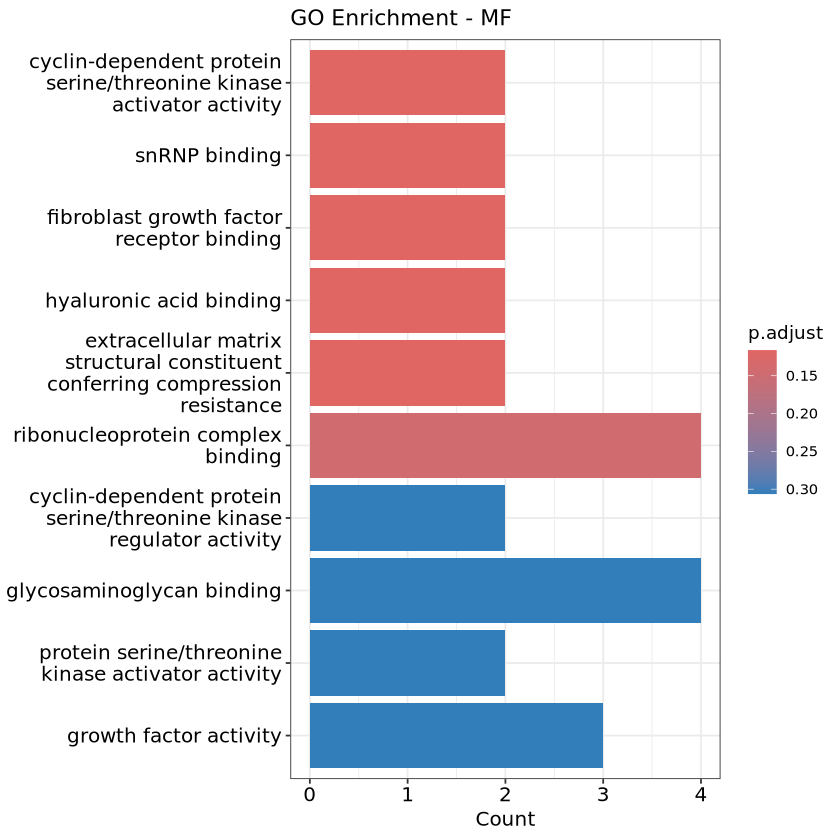

In [91]:
barplot(AD2_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [92]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_AD2_sig_xqtl_MF.pdf', width = 6, height = 6)

In [59]:
entrez_ids <- bitr(AD2_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“0.95% of input gene IDs are fail to map...”


In [60]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa05224 Human Diseases                       Cancer: specific types         
hsa05226 Human Diseases                       Cancer: specific types         
hsa05218 Human Diseases                       Cancer: specific types         
hsa00640 Metabolism                           Carbohydrate metabolism        
hsa04216 Cellular Processes                   Cell growth and death          
hsa04014 Environmental Information Processing Signal transduction            
hsa00480 Metabolism                           Metabolism of other amino acids
hsa04310 Environmental Information Processing Signal transduction            
hsa04917 Organismal Systems                   Endocrine system               
hsa04115 Cellular Processes                   Cell growth and death          
         ID       Description                 GeneRatio BgRatio  pvalue     
hsa05224 hsa05224 Breast cancer               4/34      148/9440 0.001866253
hsa05226 hsa05226 Gastric cancer              4/34      150/9440 0.001960303
hsa05218 hsa05218 Melanoma                    3/34      73/9440  0.002235385
hsa00640 hsa00640 Propanoate metabolism       2/34      32/9440  0.005836889
hsa04216 hsa04216 Ferroptosis                 2/34      42/9440  0.009907078
hsa04014 hsa04014 Ras signaling pathway       4/34      238/9440 0.010091231
hsa00480 hsa00480 Glutathione metabolism      2/34      59/9440  0.018951915
hsa04310 hsa04310 Wnt signaling pathway       3/34      174/9440 0.024239473
hsa04917 hsa04917 Prolactin signaling pathway 2/34      71/9440  0.026797336
hsa04115 hsa04115 p53 signaling pathway       2/34      75/9440  0.029658953
         p.adjust   qvalue     geneID                 Count
hsa05224 0.07451285 0.06666939 10912/2251/53358/8074  4    
hsa05226 0.07451285 0.06666939 10912/2251/53358/8074  4    
hsa05218 0.07451285 0.06666939 10912/2251/8074        3    
hsa00640 0.14592221 0.13056198 55862/55902            2    
hsa04216 0.16818718 0.15048326 2937/643246            2    
hsa04014 0.16818718 0.15048326 2251/283455/53358/8074 4    
hsa00480 0.25944839 0.23213804 2686/2937              2    
hsa04310 0.25944839 0.23213804 11197/84870/894        3    
hsa04917 0.25944839 0.23213804 53358/894              2    
hsa04115 0.25944839 0.23213804 10912/894              2

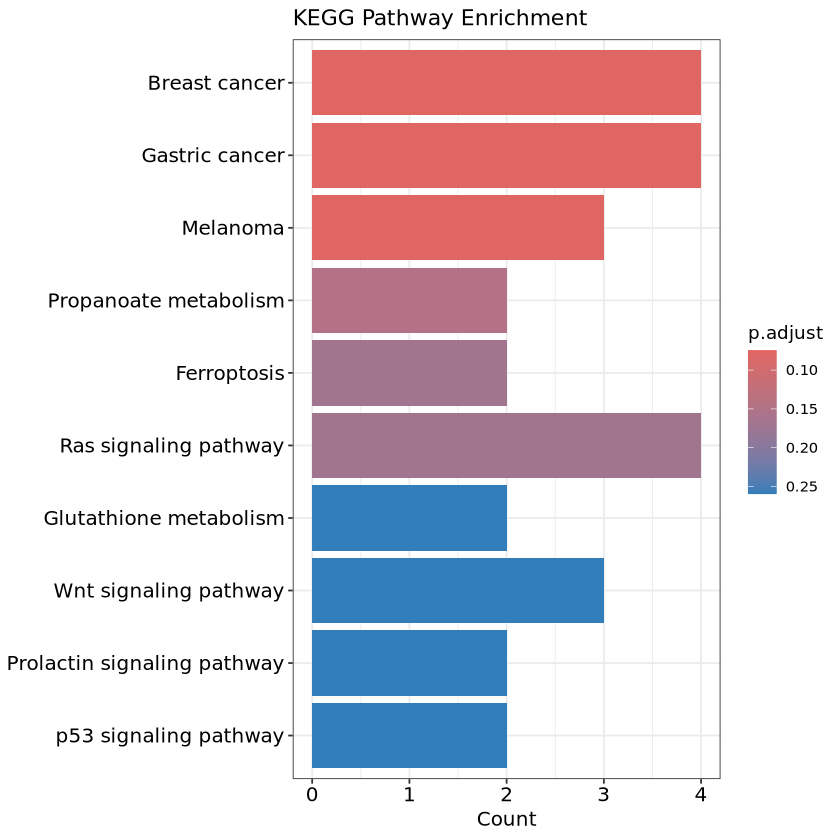

In [61]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [32]:
Aging1_bp_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [33]:
head(Aging1_bp_ego, n=10)

ID         Description                                            
GO:0070339 GO:0070339 response to bacterial lipopeptide                      
GO:0071220 GO:0071220 cellular response to bacterial lipoprotein             
GO:0071221 GO:0071221 cellular response to bacterial lipopeptide             
GO:0032493 GO:0032493 response to bacterial lipoprotein                      
GO:0006068 GO:0006068 ethanol catabolic process                              
GO:0034310 GO:0034310 primary alcohol catabolic process                      
GO:0034035 GO:0034035 purine ribonucleoside bisphosphate metabolic process   
GO:0050427 GO:0050427 3'-phosphoadenosine 5'-phosphosulfate metabolic process
GO:0140056 GO:0140056 organelle localization by membrane tethering           
GO:0006067 GO:0006067 ethanol metabolic process                              
           GeneRatio BgRatio  pvalue       p.adjust   qvalue    
GO:0070339 3/173     11/21261 0.0000832704 0.06643867 0.06444632
GO:0071220 3/173     11/21261 0.0000832704 0.06643867 0.06444632
GO:0071221 3/173     11/21261 0.0000832704 0.06643867 0.06444632
GO:0032493 3/173     12/21261 0.0001103632 0.06643867 0.06444632
GO:0006068 3/173     13/21261 0.0001426145 0.06868317 0.06662351
GO:0034310 3/173     16/21261 0.0002742709 0.11007405 0.10677318
GO:0034035 3/173     18/21261 0.0003948960 0.11886368 0.11529923
GO:0050427 3/173     18/21261 0.0003948960 0.11886368 0.11529923
GO:0140056 5/173     83/21261 0.0005856093 0.15668301 0.15198444
GO:0006067 3/173     22/21261 0.0007276569 0.16100631 0.15617809
           geneID                                                                         
GO:0070339 ENSG00000174130/ENSG00000174125/ENSG00000174123                                
GO:0071220 ENSG00000174130/ENSG00000174125/ENSG00000174123                                
GO:0071221 ENSG00000174130/ENSG00000174125/ENSG00000174123                                
GO:0032493 ENSG00000174130/ENSG00000174125/ENSG00000174123                                
GO:0006068 ENSG00000213648/ENSG00000197165/ENSG00000196502                                
GO:0034310 ENSG00000213648/ENSG00000197165/ENSG00000196502                                
GO:0034035 ENSG00000213648/ENSG00000197165/ENSG00000196502                                
GO:0050427 ENSG00000213648/ENSG00000197165/ENSG00000196502                                
GO:0140056 ENSG00000180104/ENSG00000188603/ENSG00000158109/ENSG00000175029/ENSG00000126775
GO:0006067 ENSG00000213648/ENSG00000197165/ENSG00000196502                                
           Count
GO:0070339 3    
GO:0071220 3    
GO:0071221 3    
GO:0032493 3    
GO:0006068 3    
GO:0034310 3    
GO:0034035 3    
GO:0050427 3    
GO:0140056 5    
GO:0006067 3

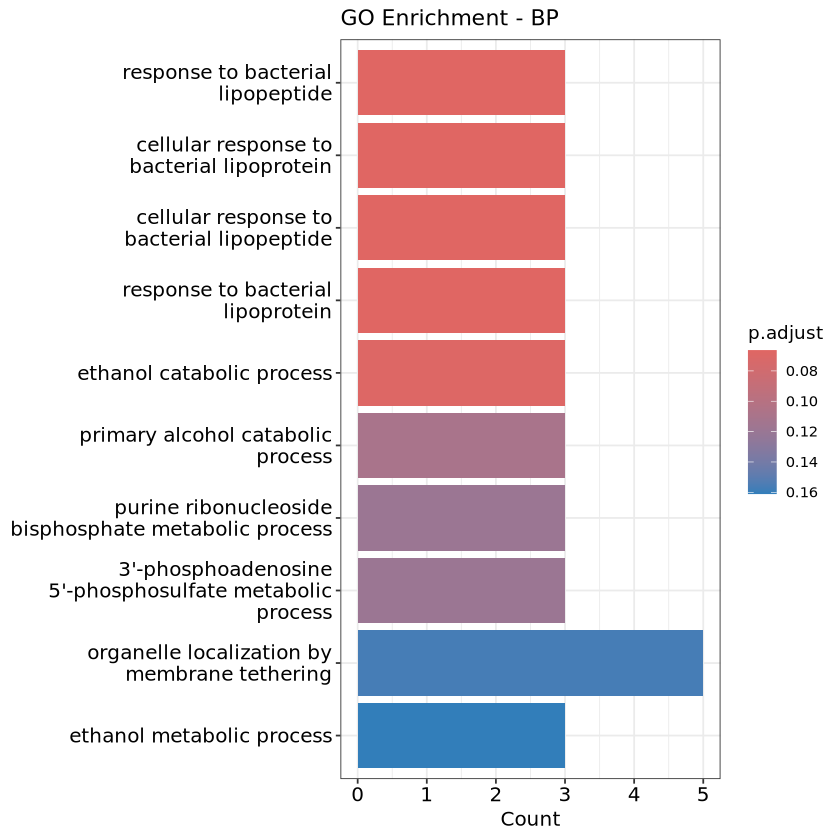

In [95]:
barplot(Aging1_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [96]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging1_sig_xqtl_BP.pdf', width = 6, height = 6)

In [97]:
Aging1_cc_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [98]:
head(Aging1_cc_ego, n=10)

ID         Description                                       
GO:0045121 GO:0045121 membrane raft                                     
GO:0098857 GO:0098857 membrane microdomain                              
GO:0017053 GO:0017053 transcription repressor complex                   
GO:0070382 GO:0070382 exocytic vesicle                                  
GO:0031616 GO:0031616 spindle pole centrosome                           
GO:0005852 GO:0005852 eukaryotic translation initiation factor 3 complex
GO:0030127 GO:0030127 COPII vesicle coat                                
GO:0008180 GO:0008180 COP9 signalosome                                  
GO:0033290 GO:0033290 eukaryotic 48S preinitiation complex              
GO:0016282 GO:0016282 eukaryotic 43S preinitiation complex              
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0045121 9/180     333/22568 0.001466185 0.2080353 0.2032302
GO:0098857 9/180     334/22568 0.001496657 0.2080353 0.2032302
GO:0017053 4/180     79/22568  0.003692876 0.2749091 0.2685594
GO:0070382 7/180     258/22568 0.004768822 0.2749091 0.2685594
GO:0031616 2/180     15/22568  0.006204304 0.2749091 0.2685594
GO:0005852 2/180     16/22568  0.007053653 0.2749091 0.2685594
GO:0030127 2/180     17/22568  0.007952474 0.2749091 0.2685594
GO:0008180 2/180     18/22568  0.008899933 0.2749091 0.2685594
GO:0033290 2/180     18/22568  0.008899933 0.2749091 0.2685594
GO:0016282 2/180     19/22568  0.009895207 0.2750868 0.2687330
           geneID                                                                                                                                         
GO:0045121 ENSG00000174130/ENSG00000173083/ENSG00000147676/ENSG00000188603/ENSG00000186318/ENSG00000213658/ENSG00000101336/ENSG00000174125/ENSG00000177455
GO:0098857 ENSG00000174130/ENSG00000173083/ENSG00000147676/ENSG00000188603/ENSG00000186318/ENSG00000213658/ENSG00000101336/ENSG00000174125/ENSG00000177455
GO:0017053 ENSG00000189308/ENSG00000175029/ENSG00000084093/ENSG00000142611                                                                                
GO:0070382 ENSG00000147676/ENSG00000188603/ENSG00000158109/ENSG00000186318/ENSG00000017427/ENSG00000138663/ENSG00000171552                                
GO:0031616 ENSG00000165660/ENSG00000126787                                                                                                                
GO:0005852 ENSG00000205609/ENSG00000184110                                                                                                                
GO:0030127 ENSG00000249915/ENSG00000138674                                                                                                                
GO:0008180 ENSG00000213658/ENSG00000138663                                                                                                                
GO:0033290 ENSG00000205609/ENSG00000184110                                                                                                                
GO:0016282 ENSG00000205609/ENSG00000184110                                                                                                                
           Count
GO:0045121 9    
GO:0098857 9    
GO:0017053 4    
GO:0070382 7    
GO:0031616 2    
GO:0005852 2    
GO:0030127 2    
GO:0008180 2    
GO:0033290 2    
GO:0016282 2

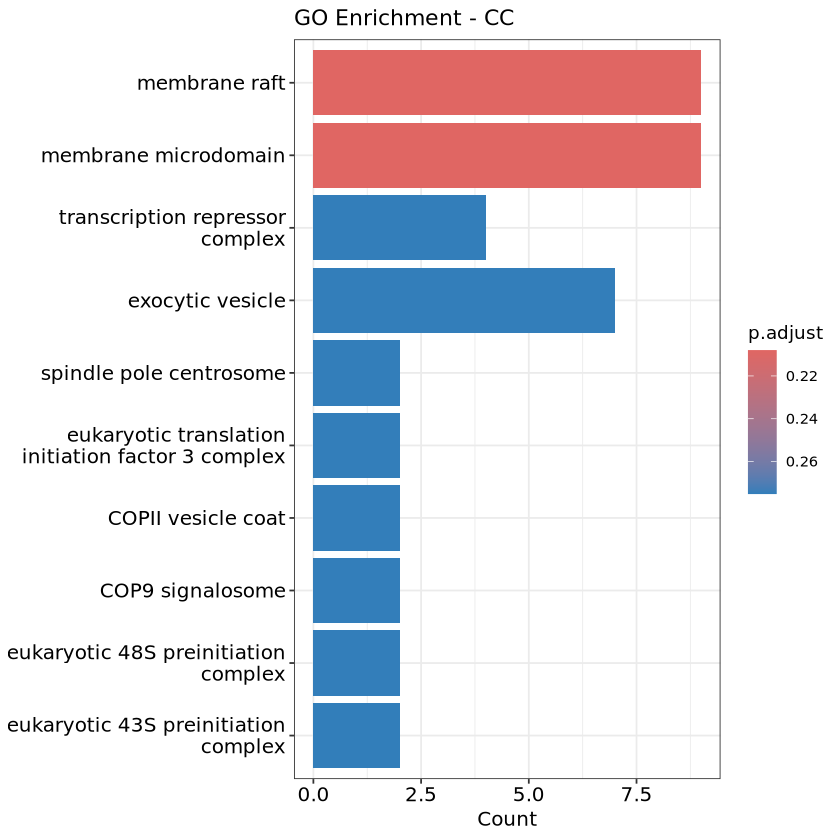

In [99]:
barplot(Aging1_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [100]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging1_sig_xqtl_CC.pdf', width = 6, height = 6)

In [35]:
Aging1_mf_ego <- enrichGO(
  gene          = Aging1_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [36]:
head(Aging1_mf_ego, n=10)

ID         Description                                         
GO:0004062 GO:0004062 aryl sulfotransferase activity                      
GO:0071723 GO:0071723 lipopeptide binding                                 
GO:0035325 GO:0035325 Toll-like receptor binding                          
GO:0003953 GO:0003953 NAD+ nucleosidase activity                          
GO:0050135 GO:0050135 NAD(P)+ nucleosidase activity                       
GO:0061809 GO:0061809 NAD+ nucleotidase, cyclic ADP-ribose generating     
GO:0016799 GO:0016799 hydrolase activity, hydrolyzing N-glycosyl compounds
GO:0003680 GO:0003680 minor groove of adenine-thymine-rich DNA binding    
GO:0008519 GO:0008519 ammonium transmembrane transporter activity         
GO:0008146 GO:0008146 sulfotransferase activity                           
           GeneRatio BgRatio  pvalue       p.adjust   qvalue     
GO:0004062 3/166     10/21059 5.542206e-05 0.00942175 0.008955038
GO:0071723 3/166     10/21059 5.542206e-05 0.00942175 0.008955038
GO:0035325 3/166     14/21059 1.642547e-04 0.01415452 0.013453370
GO:0003953 3/166     16/21059 2.497857e-04 0.01415452 0.013453370
GO:0050135 3/166     16/21059 2.497857e-04 0.01415452 0.013453370
GO:0061809 3/166     16/21059 2.497857e-04 0.01415452 0.013453370
GO:0016799 3/166     40/21059 3.836890e-03 0.16448441 0.156336576
GO:0003680 2/166     12/21059 3.870221e-03 0.16448441 0.156336576
GO:0008519 2/166     13/21059 4.550297e-03 0.17190009 0.163384917
GO:0008146 3/166     57/21059 1.030892e-02 0.35050328 0.333140886
           geneID                                          Count
GO:0004062 ENSG00000213648/ENSG00000197165/ENSG00000196502 3    
GO:0071723 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0035325 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0003953 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0050135 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0061809 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0016799 ENSG00000174130/ENSG00000174125/ENSG00000174123 3    
GO:0003680 ENSG00000189308/ENSG00000138668                 2    
GO:0008519 ENSG00000103375/ENSG00000140519                 2    
GO:0008146 ENSG00000213648/ENSG00000197165/ENSG00000196502 3

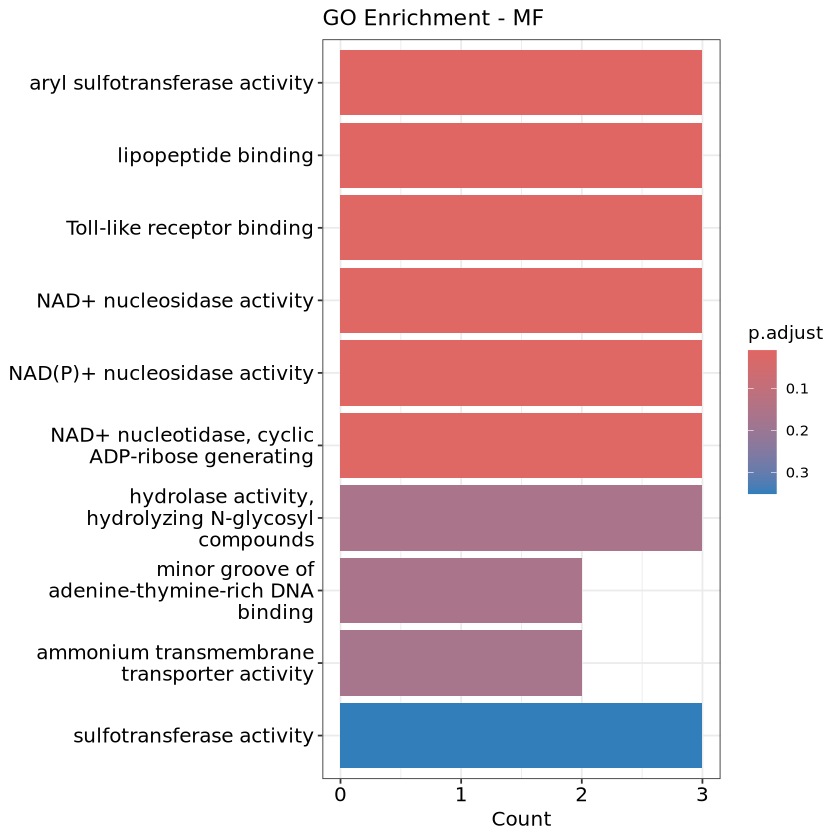

In [103]:
barplot(Aging1_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [104]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging1_sig_xqtl_MF.pdf', width = 6, height = 6)

In [62]:
entrez_ids <- bitr(Aging1_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging1_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“0.39% of input gene IDs are fail to map...”


In [63]:
kegg_enrich %>% head(n=10)

category                             subcategory              
hsa05204 Human Diseases                       Cancer: overview         
hsa04260 Organismal Systems                   Circulatory system       
hsa05017 Human Diseases                       Neurodegenerative disease
hsa04115 Cellular Processes                   Cell growth and death    
hsa04960 Organismal Systems                   Excretory system         
hsa05016 Human Diseases                       Neurodegenerative disease
hsa05410 Human Diseases                       Cardiovascular disease   
hsa04630 Environmental Information Processing Signal transduction      
hsa05414 Human Diseases                       Cardiovascular disease   
hsa00565 Metabolism                           Lipid metabolism         
         ID       Description                               GeneRatio BgRatio 
hsa05204 hsa05204 Chemical carcinogenesis - DNA adducts     4/79      71/9440 
hsa04260 hsa04260 Cardiac muscle contraction                4/79      87/9440 
hsa05017 hsa05017 Spinocerebellar ataxia                    5/79      144/9440
hsa04115 hsa04115 p53 signaling pathway                     3/79      75/9440 
hsa04960 hsa04960 Aldosterone-regulated sodium reabsorption 2/79      38/9440 
hsa05016 hsa05016 Huntington disease                        6/79      311/9440
hsa05410 hsa05410 Hypertrophic cardiomyopathy               3/79      99/9440 
hsa04630 hsa04630 JAK-STAT signaling pathway                4/79      168/9440
hsa05414 hsa05414 Dilated cardiomyopathy                    3/79      105/9440
hsa00565 hsa00565 Ether lipid metabolism                    2/79      51/9440 
         pvalue      p.adjust  qvalue    geneID                           
hsa05204 0.002887124 0.3937905 0.3937905 445329/124907837/6799/6817       
hsa04260 0.005981252 0.3937905 0.3937905 10368/486/487/84701              
hsa05017 0.007031974 0.3937905 0.3937905 11273/22863/387332/4287/487      
hsa04115 0.024758956 0.7806472 0.7806472 3479/598/7161                    
hsa04960 0.040034196 0.7806472 0.7806472 3479/486                         
hsa05016 0.045557533 0.7806472 0.7806472 22863/387332/5431/5978/6389/84701
hsa05410 0.049940681 0.7806472 0.7806472 10368/3479/487                   
hsa04630 0.052012401 0.7806472 0.7806472 122809/246778/3587/598           
hsa05414 0.057630033 0.7806472 0.7806472 10368/3479/487                   
hsa00565 0.067764803 0.7806472 0.7806472 5049/56994                       
         Count
hsa05204 4    
hsa04260 4    
hsa05017 5    
hsa04115 3    
hsa04960 2    
hsa05016 6    
hsa05410 3    
hsa04630 4    
hsa05414 3    
hsa00565 2

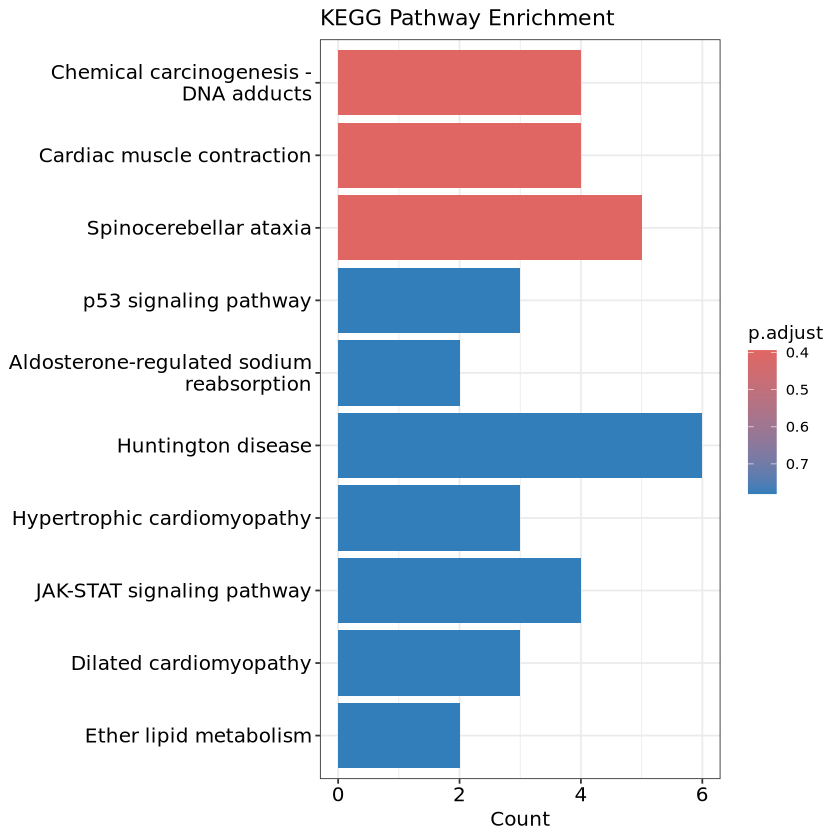

In [64]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [105]:
Aging2_bp_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [106]:
head(Aging2_bp_ego, n=5)

ID         Description                                    GeneRatio
GO:0045454 GO:0045454 cell redox homeostasis                         5/164    
GO:0031338 GO:0031338 regulation of vesicle fusion                   3/164    
GO:0070536 GO:0070536 protein K63-linked deubiquitination            3/164    
GO:0019614 GO:0019614 catechol-containing compound catabolic process 2/164    
GO:0042420 GO:0042420 dopamine catabolic process                     2/164    
           BgRatio  pvalue       p.adjust   qvalue    
GO:0045454 42/21261 1.735068e-05 0.03392057 0.03345941
GO:0031338 26/21261 1.028366e-03 0.49428718 0.48756716
GO:0070536 34/21261 2.262346e-03 0.49428718 0.48756716
GO:0019614 10/21261 2.555284e-03 0.49428718 0.48756716
GO:0042420 10/21261 2.555284e-03 0.49428718 0.48756716
           geneID                                                                         
GO:0045454 ENSG00000108262/ENSG00000089250/ENSG00000183336/ENSG00000169627/ENSG00000124177
GO:0031338 ENSG00000102879/ENSG00000167371/ENSG00000149927                                
GO:0070536 ENSG00000115233/ENSG00000165660/ENSG00000019995                                
GO:0019614 ENSG00000213648/ENSG00000261052                                                
GO:0042420 ENSG00000213648/ENSG00000261052                                                
           Count
GO:0045454 5    
GO:0031338 3    
GO:0070536 3    
GO:0019614 2    
GO:0042420 2

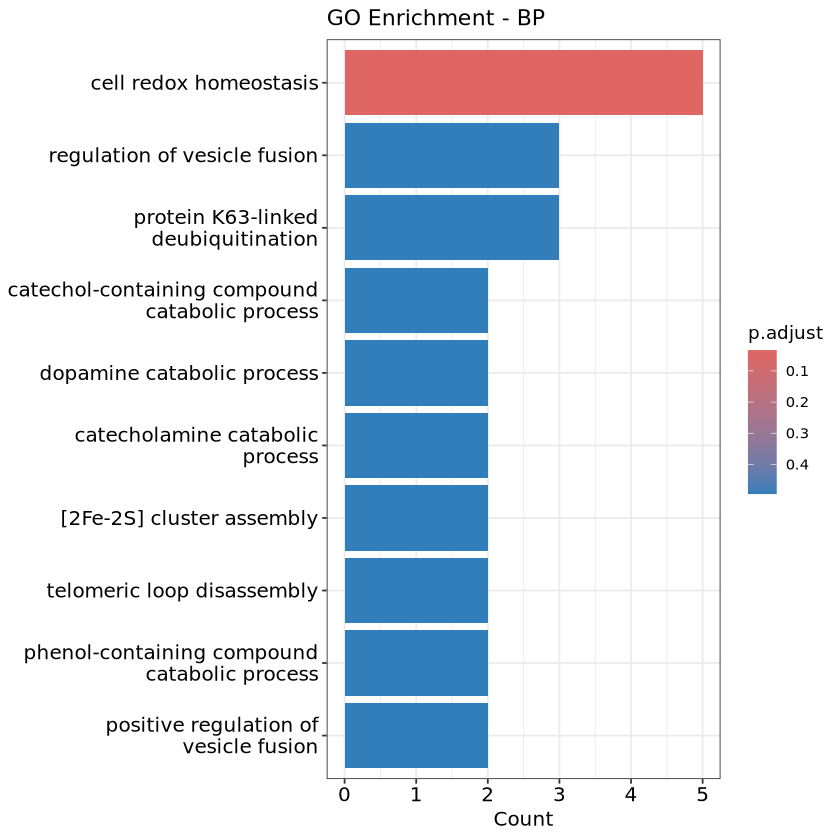

In [107]:
barplot(Aging2_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [108]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging2_sig_xqtl_BP.pdf', width = 6, height = 6)

In [109]:
Aging2_cc_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [110]:
head(Aging2_cc_ego, n=10)

ID         Description                          GeneRatio BgRatio  
GO:0099571 GO:0099571 postsynaptic cytoskeleton            2/173     10/22568 
GO:1990229 GO:1990229 iron-sulfur cluster assembly complex 2/173     12/22568 
GO:0005883 GO:0005883 neurofilament                        2/173     13/22568 
GO:0005797 GO:0005797 Golgi medial cisterna                2/173     19/22568 
GO:0000228 GO:0000228 nuclear chromosome                   6/173     245/22568
GO:0019005 GO:0019005 SCF ubiquitin ligase complex         3/173     66/22568 
GO:0000151 GO:0000151 ubiquitin ligase complex             7/173     335/22568
GO:0098978 GO:0098978 glutamatergic synapse                8/173     440/22568
GO:0150034 GO:0150034 distal axon                          6/173     295/22568
GO:1904813 GO:1904813 ficolin-1-rich granule lumen         4/173     150/22568
           pvalue      p.adjust  qvalue   
GO:0099571 0.002524998 0.3621260 0.3600083
GO:1990229 0.003666198 0.3621260 0.3600083
GO:0005883 0.004311024 0.3621260 0.3600083
GO:0005797 0.009170498 0.5402863 0.5371267
GO:0000228 0.011707161 0.5402863 0.5371267
GO:0019005 0.014233405 0.5402863 0.5371267
GO:0000151 0.015007952 0.5402863 0.5371267
GO:0098978 0.020498519 0.6097641 0.6061982
GO:0150034 0.026495608 0.6097641 0.6061982
GO:1904813 0.028522325 0.6097641 0.6061982
           geneID                                                                                                                         
GO:0099571 ENSG00000104722/ENSG00000277586                                                                                                
GO:1990229 ENSG00000183336/ENSG00000169627                                                                                                
GO:0005883 ENSG00000104722/ENSG00000277586                                                                                                
GO:0005797 ENSG00000108587/ENSG00000116209                                                                                                
GO:0000228 ENSG00000080603/ENSG00000169592/ENSG00000132207/ENSG00000198900/ENSG00000181625/ENSG00000149948                                
GO:0019005 ENSG00000123975/ENSG00000174989/ENSG00000055130                                                                                
GO:0000151 ENSG00000123975/ENSG00000135108/ENSG00000174943/ENSG00000174989/ENSG00000123091/ENSG00000055130/ENSG00000103549                
GO:0098978 ENSG00000102879/ENSG00000167371/ENSG00000175029/ENSG00000162374/ENSG00000085832/ENSG00000124181/ENSG00000102882/ENSG00000149927
GO:0150034 ENSG00000167371/ENSG00000162374/ENSG00000108262/ENSG00000277586/ENSG00000144290/ENSG00000149930                                
GO:1904813 ENSG00000115233/ENSG00000149925/ENSG00000135677/ENSG00000013364                                                                
           Count
GO:0099571 2    
GO:1990229 2    
GO:0005883 2    
GO:0005797 2    
GO:0000228 6    
GO:0019005 3    
GO:0000151 7    
GO:0098978 8    
GO:0150034 6    
GO:1904813 4

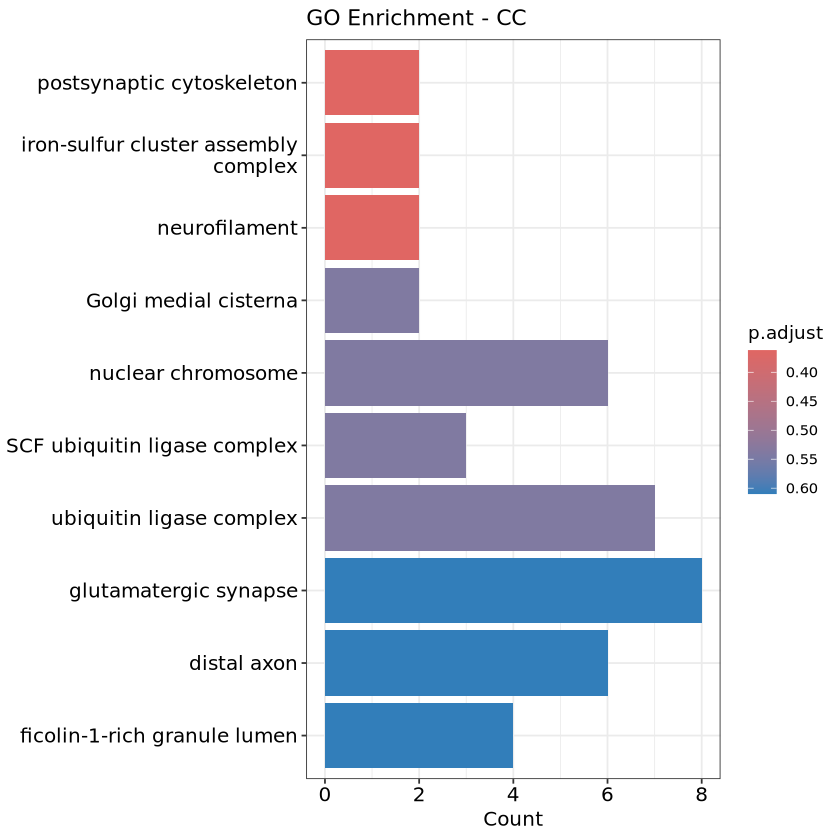

In [111]:
barplot(Aging2_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [112]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [113]:
Aging2_mf_ego <- enrichGO(
  gene          = Aging2_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [114]:
head(Aging2_mf_ego, n=5)

ID         Description                                              
GO:0050321 GO:0050321 tau-protein kinase activity                              
GO:0043539 GO:0043539 protein serine/threonine kinase activator activity       
GO:0004062 GO:0004062 aryl sulfotransferase activity                           
GO:0016889 GO:0016889 DNA endonuclease activity, producing 3'-phosphomonoesters
GO:0019887 GO:0019887 protein kinase regulator activity                        
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0050321 3/164     23/21059  0.000732362 0.1977399 0.1892801
GO:0043539 4/164     59/21059  0.001156374 0.1977399 0.1892801
GO:0004062 2/164     10/21059  0.002603525 0.2226014 0.2130780
GO:0016889 2/164     10/21059  0.002603525 0.2226014 0.2130780
GO:0019887 7/164     249/21059 0.003435703 0.2350021 0.2249481
           geneID                                                                                                         
GO:0050321 ENSG00000156873/ENSG00000160551/ENSG00000149930                                                                
GO:0043539 ENSG00000123975/ENSG00000160551/ENSG00000118971/ENSG00000149930                                                
GO:0004062 ENSG00000213648/ENSG00000261052                                                                                
GO:0016889 ENSG00000132207/ENSG00000181625                                                                                
GO:0019887 ENSG00000123080/ENSG00000185104/ENSG00000123975/ENSG00000088992/ENSG00000160551/ENSG00000118971/ENSG00000149930
           Count
GO:0050321 3    
GO:0043539 4    
GO:0004062 2    
GO:0016889 2    
GO:0019887 7

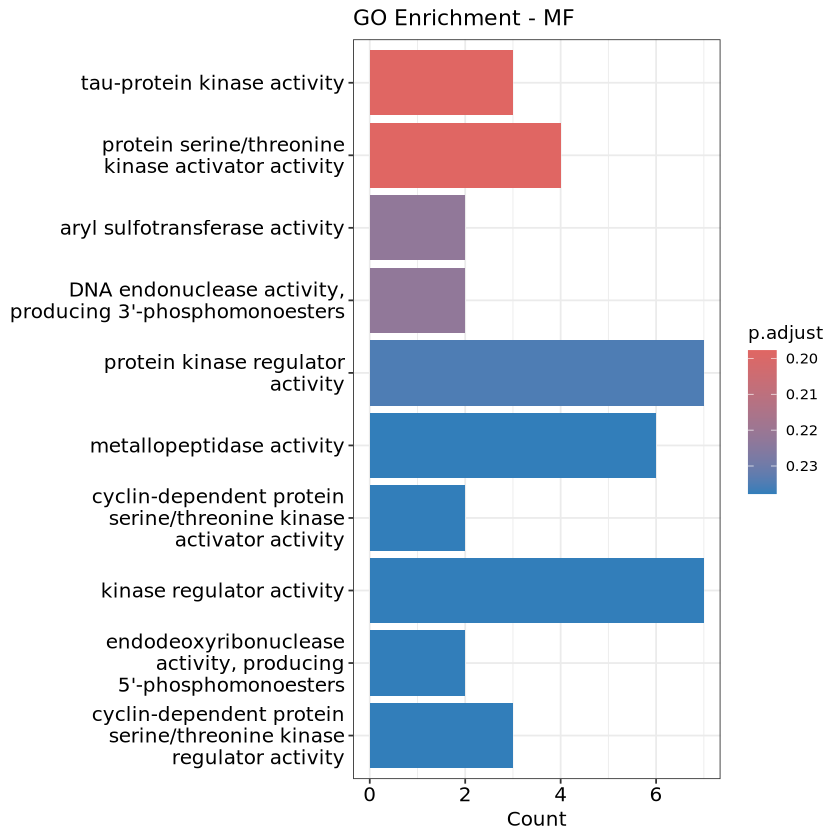

In [115]:
barplot(Aging2_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [116]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging2_sig_xqtl_MF.pdf', width = 6, height = 6)

In [65]:
entrez_ids <- bitr(Aging2_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging2_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“0.4% of input gene IDs are fail to map...”


In [66]:
kegg_enrich %>% head(n=10)

category                             subcategory            ID      
hsa04810 Cellular Processes                   Cell motility          hsa04810
hsa05218 Human Diseases                       Cancer: specific types hsa05218
hsa04340 Environmental Information Processing Signal transduction    hsa04340
hsa04310 Environmental Information Processing Signal transduction    hsa04310
hsa05204 Human Diseases                       Cancer: overview       hsa05204
hsa05223 Human Diseases                       Cancer: specific types hsa05223
hsa05214 Human Diseases                       Cancer: specific types hsa05214
hsa05220 Human Diseases                       Cancer: specific types hsa05220
hsa04015 Environmental Information Processing Signal transduction    hsa04015
hsa04010 Environmental Information Processing Signal transduction    hsa04010
         Description                           GeneRatio BgRatio  pvalue     
hsa04810 Regulation of actin cytoskeleton      7/71      232/9440 0.001728226
hsa05218 Melanoma                              4/71      73/9440  0.002163320
hsa04340 Hedgehog signaling pathway            3/71      56/9440  0.008500120
hsa04310 Wnt signaling pathway                 5/71      174/9440 0.009817606
hsa05204 Chemical carcinogenesis - DNA adducts 3/71      71/9440  0.016181218
hsa05223 Non-small cell lung cancer            3/71      73/9440  0.017422430
hsa05214 Glioma                                3/71      76/9440  0.019381670
hsa05220 Chronic myeloid leukemia              3/71      77/9440  0.020060799
hsa04015 Rap1 signaling pathway                5/71      212/9440 0.021422742
hsa04010 MAPK signaling pathway                6/71      300/9440 0.024951299
         p.adjust  qvalue    geneID                                Count
hsa04810 0.2120054 0.1969760 2251/28964/29895/3683/5595/8074/85464 7    
hsa05218 0.2120054 0.1969760 10912/2251/5595/8074                  4    
hsa04340 0.3604880 0.3349325 1456/8454/894                         3    
hsa04310 0.3604880 0.3349325 11197/1488/8454/84870/894             5    
hsa05204 0.3604880 0.3349325 445329/124907837/6818                 3    
hsa05223 0.3604880 0.3349325 10912/5335/5595                       3    
hsa05214 0.3604880 0.3349325 10912/5335/5595                       3    
hsa05220 0.3604880 0.3349325 10912/1488/5595                       3    
hsa04015 0.3604880 0.3349325 2251/3683/5335/5595/8074              5    
hsa04010 0.3604880 0.3349325 10912/2251/5595/57551/8074/9344       6

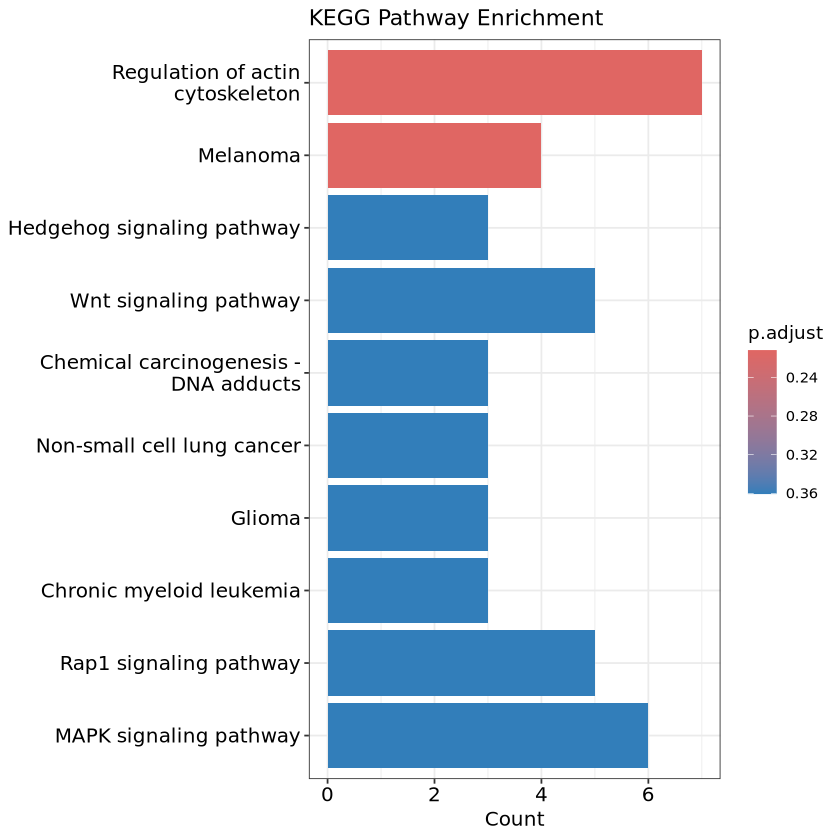

In [67]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [117]:
Aging3_bp_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [118]:
head(Aging3_bp_ego, n=5)

ID        
GO:0060071 GO:0060071
GO:0090175 GO:0090175
GO:0032924 GO:0032924
GO:2000095 GO:2000095
GO:0032926 GO:0032926
           Description                                                      
GO:0060071 Wnt signaling pathway, planar cell polarity pathway              
GO:0090175 regulation of establishment of planar polarity                   
GO:0032924 activin receptor signaling pathway                               
GO:2000095 regulation of Wnt signaling pathway, planar cell polarity pathway
GO:0032926 negative regulation of activin receptor signaling pathway        
           GeneRatio BgRatio  pvalue      p.adjust  qvalue  
GO:0060071 3/77      51/21261 0.000839350 0.2671848 0.260495
GO:0090175 3/77      55/21261 0.001046476 0.2671848 0.260495
GO:0032924 3/77      58/21261 0.001221258 0.2671848 0.260495
GO:2000095 2/77      16/21261 0.001503301 0.2671848 0.260495
GO:0032926 2/77      18/21261 0.001907737 0.2671848 0.260495
           geneID                                          Count
GO:0060071 ENSG00000100592/ENSG00000165617/ENSG00000146374 3    
GO:0090175 ENSG00000100592/ENSG00000165617/ENSG00000146374 3    
GO:0032924 ENSG00000156076/ENSG00000179284/ENSG00000174106 3    
GO:2000095 ENSG00000165617/ENSG00000146374                 2    
GO:0032926 ENSG00000179284/ENSG00000174106                 2

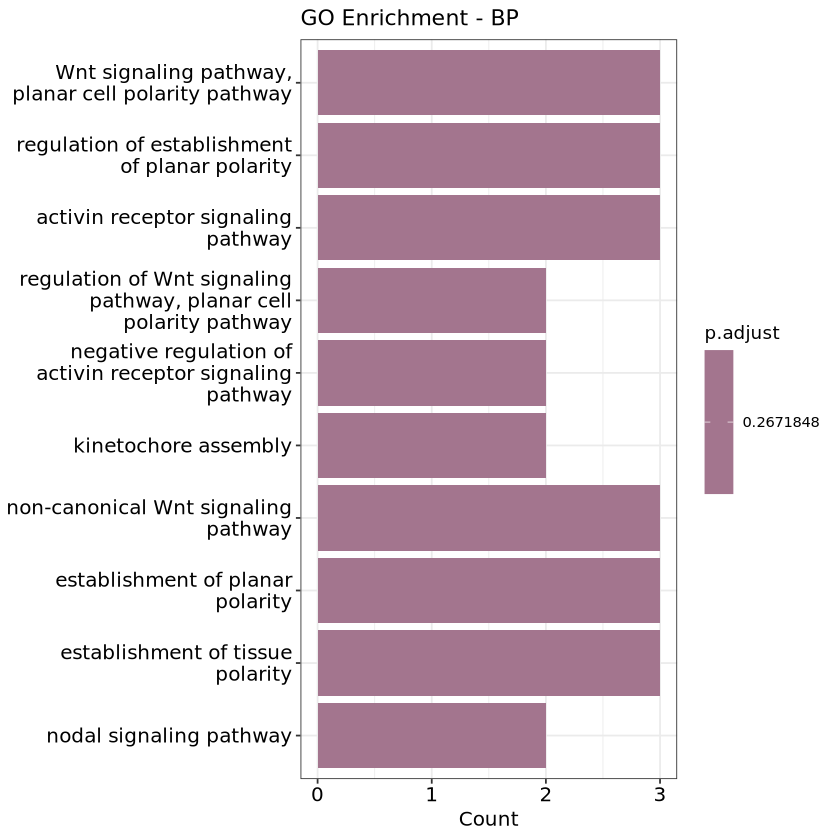

In [119]:
barplot(Aging3_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [120]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging3_sig_xqtl_BP.pdf', width = 6, height = 6)

In [121]:
Aging3_cc_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [122]:
head(Aging3_cc_ego, n=10)

ID        
GO:0000228 GO:0000228
GO:0000118 GO:0000118
GO:0036064 GO:0036064
GO:0000502 GO:0000502
GO:0042721 GO:0042721
GO:0160064 GO:0160064
GO:0016272 GO:0016272
GO:0000812 GO:0000812
GO:0043240 GO:0043240
GO:0044194 GO:0044194
           Description                                                
GO:0000228 nuclear chromosome                                         
GO:0000118 histone deacetylase complex                                
GO:0036064 ciliary basal body                                         
GO:0000502 proteasome complex                                         
GO:0042721 TIM22 mitochondrial import inner membrane insertion complex
GO:0160064 multi-pass translocon complex                              
GO:0016272 prefoldin complex                                          
GO:0000812 Swr1 complex                                               
GO:0043240 Fanconi anaemia nuclear complex                            
GO:0044194 cytolytic granule                                          
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0000228 5/80      245/22568 0.001795269 0.2842712 0.2782340
GO:0000118 3/80      84/22568  0.003324809 0.2842712 0.2782340
GO:0036064 3/80      181/22568 0.026574038 0.4442345 0.4348001
GO:0000502 2/80      79/22568  0.032066875 0.4442345 0.4348001
GO:0042721 1/80      10/22568  0.034895117 0.4442345 0.4348001
GO:0160064 1/80      11/22568  0.038317778 0.4442345 0.4348001
GO:0016272 1/80      12/22568  0.041728452 0.4442345 0.4348001
GO:0000812 1/80      13/22568  0.045127181 0.4442345 0.4348001
GO:0043240 1/80      13/22568  0.045127181 0.4442345 0.4348001
GO:0044194 1/80      13/22568  0.045127181 0.4442345 0.4348001
           geneID                                                                         
GO:0000228 ENSG00000161860/ENSG00000071243/ENSG00000032219/ENSG00000198900/ENSG00000149948
GO:0000118 ENSG00000071243/ENSG00000032219/ENSG00000171940                                
GO:0036064 ENSG00000117724/ENSG00000100592/ENSG00000100578                                
GO:0000502 ENSG00000100567/ENSG00000179262                                                
GO:0042721 ENSG00000100575                                                                
GO:0160064 ENSG00000105583                                                                
GO:0016272 ENSG00000101132                                                                
GO:0000812 ENSG00000071243                                                                
GO:0043240 ENSG00000115392                                                                
GO:0044194 ENSG00000179218                                                                
           Count
GO:0000228 5    
GO:0000118 3    
GO:0036064 3    
GO:0000502 2    
GO:0042721 1    
GO:0160064 1    
GO:0016272 1    
GO:0000812 1    
GO:0043240 1    
GO:0044194 1

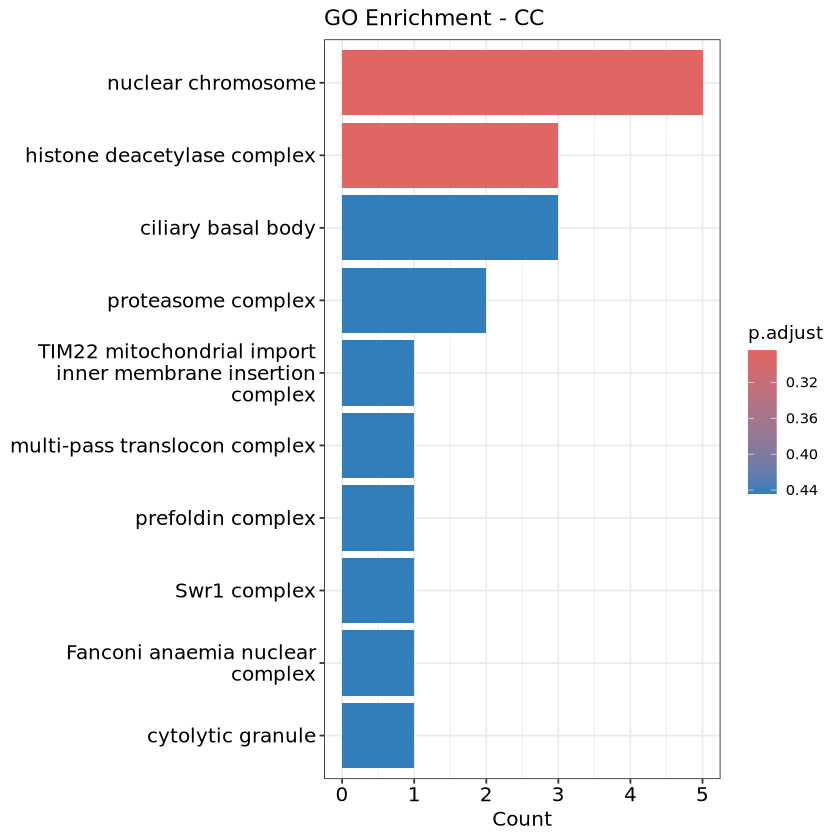

In [123]:
barplot(Aging3_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [124]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging3_sig_xqtl_CC.pdf', width = 6, height = 6)

In [125]:
Aging3_mf_ego <- enrichGO(
  gene          = Aging3_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [126]:
head(Aging3_mf_ego, n=5)

ID         Description                               GeneRatio
GO:0140104 GO:0140104 molecular carrier activity                4/80     
GO:0016423 GO:0016423 tRNA (guanine) methyltransferase activity 2/80     
GO:0008301 GO:0008301 DNA binding, bending                      2/80     
GO:0032977 GO:0032977 membrane insertase activity               2/80     
GO:0000049 GO:0000049 tRNA binding                              3/80     
           BgRatio   pvalue       p.adjust   qvalue    
GO:0140104 101/21059 0.0005960955 0.09773068 0.08597016
GO:0016423 12/21059  0.0009176590 0.09773068 0.08597016
GO:0008301 18/21059  0.0020960813 0.12444096 0.10946622
GO:0032977 19/21059  0.0023369194 0.12444096 0.10946622
GO:0000049 86/21059  0.0043073745 0.18349415 0.16141319
           geneID                                                         
GO:0140104 ENSG00000100575/ENSG00000105576/ENSG00000198356/ENSG00000179218
GO:0016423 ENSG00000104907/ENSG00000066651                                
GO:0008301 ENSG00000198900/ENSG00000149948                                
GO:0032977 ENSG00000100575/ENSG00000198356                                
GO:0000049 ENSG00000179115/ENSG00000104907/ENSG00000066651                
           Count
GO:0140104 4    
GO:0016423 2    
GO:0008301 2    
GO:0032977 2    
GO:0000049 3

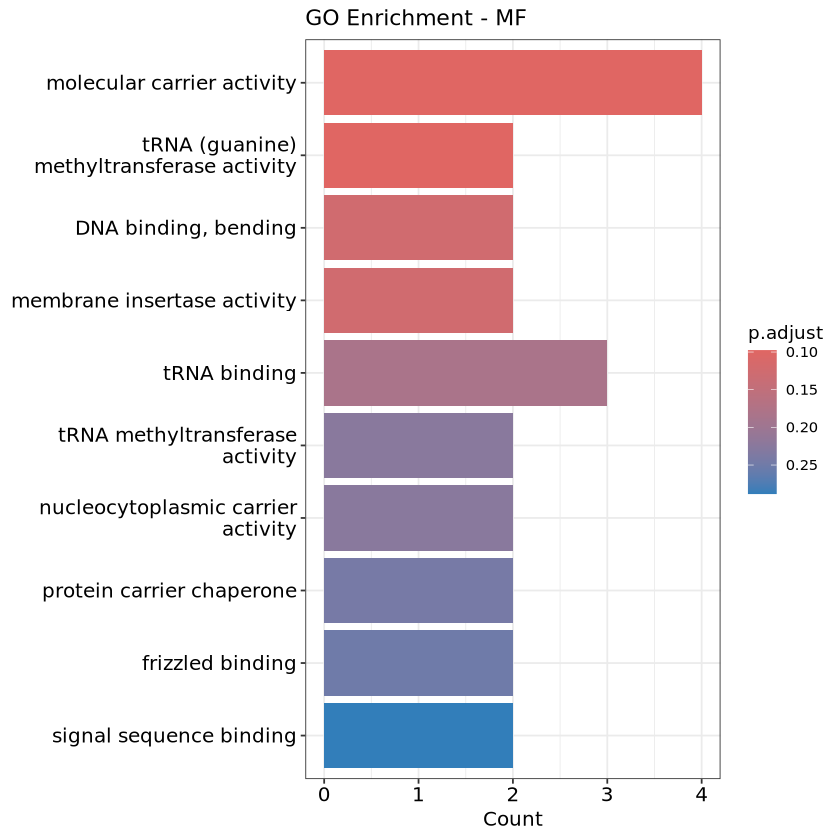

In [127]:
barplot(Aging3_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [128]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging3_sig_xqtl_MF.pdf', width = 6, height = 6)

In [21]:
entrez_ids <- bitr(Aging3_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(Aging3_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“5% of input gene IDs are fail to map...”


In [22]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa05022 Human Diseases                       Neurodegenerative disease       
hsa04310 Environmental Information Processing Signal transduction             
hsa05016 Human Diseases                       Neurodegenerative disease       
hsa05014 Human Diseases                       Neurodegenerative disease       
hsa05010 Human Diseases                       Neurodegenerative disease       
hsa03050 Genetic Information Processing       Folding, sorting and degradation
hsa03460 Genetic Information Processing       Replication and repair          
hsa05217 Human Diseases                       Cancer: specific types          
hsa00970 Genetic Information Processing       Translation                     
hsa04916 Organismal Systems                   Endocrine system                
         ID       Description                                       GeneRatio
hsa05022 hsa05022 Pathways of neurodegeneration - multiple diseases 3/6      
hsa04310 hsa04310 Wnt signaling pathway                             2/6      
hsa05016 hsa05016 Huntington disease                                2/6      
hsa05014 hsa05014 Amyotrophic lateral sclerosis                     2/6      
hsa05010 hsa05010 Alzheimer disease                                 2/6      
hsa03050 hsa03050 Proteasome                                        1/6      
hsa03460 hsa03460 Fanconi anemia pathway                            1/6      
hsa05217 hsa05217 Basal cell carcinoma                              1/6      
hsa00970 hsa00970 Aminoacyl-tRNA biosynthesis                       1/6      
hsa04916 hsa04916 Melanogenesis                                     1/6      
         BgRatio  pvalue      p.adjust   qvalue     geneID           Count
hsa05022 483/9440 0.002370550 0.06400485 0.04491569 51384/55860/5684 3    
hsa04310 174/9440 0.004826146 0.06515296 0.04572138 23002/51384      2    
hsa05016 311/9440 0.014864036 0.12370038 0.08680729 55860/5684       2    
hsa05014 371/9440 0.020802606 0.12370038 0.08680729 55860/5684       2    
hsa05010 391/9440 0.022976738 0.12370038 0.08680729 51384/5684       2    
hsa03050 46/9440  0.028890978 0.12370038 0.08680729 5684             1    
hsa03460 55/9440  0.034461379 0.12370038 0.08680729 55120            1    
hsa05217 63/9440  0.039390467 0.12370038 0.08680729 51384            1    
hsa00970 66/9440  0.041233461 0.12370038 0.08680729 2193             1    
hsa04916 101/9440 0.062518253 0.14450810 0.10140919 51384            1

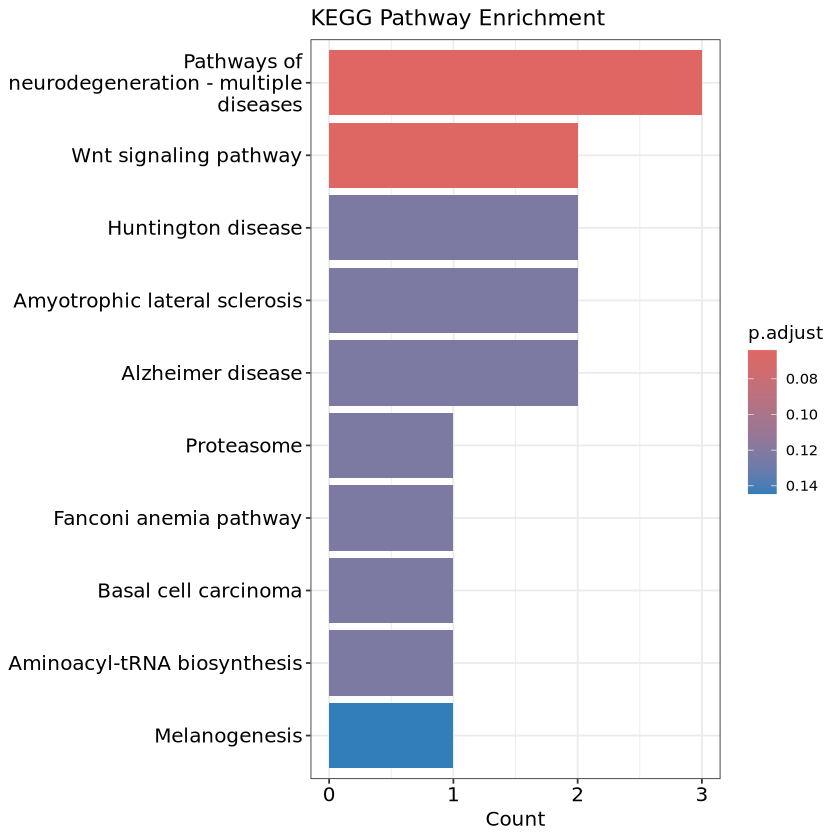

In [23]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [37]:
Aging4_bp_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [46]:
head(Aging4_bp_ego, n=20)

ID        
GO:0070098 GO:0070098
GO:1990868 GO:1990868
GO:1990869 GO:1990869
GO:0007187 GO:0007187
GO:0019932 GO:0019932
GO:0060326 GO:0060326
GO:0007204 GO:0007204
GO:0019722 GO:0019722
GO:1903564 GO:1903564
GO:0010752 GO:0010752
GO:0035524 GO:0035524
GO:0015824 GO:0015824
GO:0002076 GO:0002076
GO:0051382 GO:0051382
GO:0051383 GO:0051383
GO:0048520 GO:0048520
GO:0019934 GO:0019934
GO:0034508 GO:0034508
GO:0040036 GO:0040036
GO:0032506 GO:0032506
           Description                                                                                
GO:0070098 chemokine-mediated signaling pathway                                                       
GO:1990868 response to chemokine                                                                      
GO:1990869 cellular response to chemokine                                                             
GO:0007187 G protein-coupled receptor signaling pathway, coupled to cyclic nucleotide second messenger
GO:0019932 second-messenger-mediated signaling                                                        
GO:0060326 cell chemotaxis                                                                            
GO:0007204 positive regulation of cytosolic calcium ion concentration                                 
GO:0019722 calcium-mediated signaling                                                                 
GO:1903564 regulation of protein localization to cilium                                               
GO:0010752 regulation of cGMP-mediated signaling                                                      
GO:0035524 proline transmembrane transport                                                            
GO:0015824 proline transport                                                                          
GO:0002076 osteoblast development                                                                     
GO:0051382 kinetochore assembly                                                                       
GO:0051383 kinetochore organization                                                                   
GO:0048520 positive regulation of behavior                                                            
GO:0019934 cGMP-mediated signaling                                                                    
GO:0034508 centromere complex assembly                                                                
GO:0040036 regulation of fibroblast growth factor receptor signaling pathway                          
GO:0032506 cytokinetic process                                                                        
           GeneRatio BgRatio   pvalue       p.adjust    qvalue     
GO:0070098 5/51      106/21261 5.483001e-06 0.002755808 0.002433858
GO:1990868 5/51      114/21261 7.829001e-06 0.002755808 0.002433858
GO:1990869 5/51      114/21261 7.829001e-06 0.002755808 0.002433858
GO:0007187 4/51      57/21261  1.055992e-05 0.002787819 0.002462129
GO:0019932 7/51      339/21261 1.560837e-05 0.003296489 0.002911373
GO:0060326 7/51      378/21261 3.136082e-05 0.005519504 0.004874682
GO:0007204 5/51      176/21261 6.337975e-05 0.009561288 0.008444279
GO:0019722 5/51      231/21261 2.266815e-04 0.029921963 0.026426295
GO:1903564 2/51      11/21261  3.060195e-04 0.035199348 0.031087143
GO:0010752 2/51      12/21261  3.666599e-04 0.035199348 0.031087143
GO:0035524 2/51      12/21261  3.666599e-04 0.035199348 0.031087143
GO:0015824 2/51      13/21261  4.326605e-04 0.038074124 0.033626071
GO:0002076 2/51      17/21261  7.497654e-04 0.060904023 0.053788840
GO:0051382 2/51      18/21261  8.421931e-04 0.063525421 0.056103990
GO:0051383 2/51      22/21261  1.263770e-03 0.088969439 0.078575482
GO:0048520 2/51      27/21261  1.905617e-03 0.125770743 0.111077431
GO:0019934 2/51      33/21261  2.840356e-03 0.166634244 0.147167006
GO:0034508 2/51      33/21261  2.840356e-03 0.166634244 0.147167006
GO:0040036 2/51      41/21261  4.357518e-03 0.242186278 0.213892586
GO:0032506 2/51      44/21

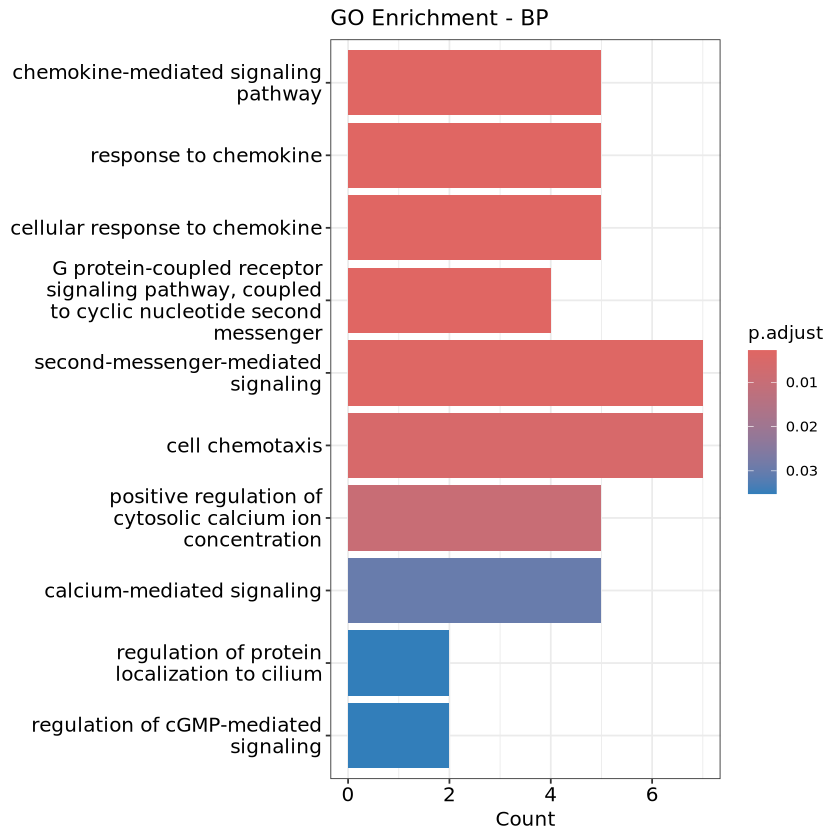

In [131]:
barplot(Aging4_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [132]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging4_sig_xqtl_BP.pdf', width = 6, height = 6)

In [133]:
Aging4_cc_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [134]:
head(Aging4_cc_ego, n=10)

ID         Description                                      
GO:0000776 GO:0000776 kinetochore                                      
GO:0000779 GO:0000779 condensed chromosome, centromeric region         
GO:0016363 GO:0016363 nuclear matrix                                   
GO:0000775 GO:0000775 chromosome, centromeric region                   
GO:1905368 GO:1905368 peptidase complex                                
GO:0000793 GO:0000793 condensed chromosome                             
GO:0034399 GO:0034399 nuclear periphery                                
GO:0036064 GO:0036064 ciliary basal body                               
GO:0098687 GO:0098687 chromosomal region                               
GO:0032838 GO:0032838 plasma membrane bounded cell projection cytoplasm
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0000776 4/52      184/22568 0.0008530481 0.06984143 0.05792272
GO:0000779 4/52      195/22568 0.0010582035 0.06984143 0.05792272
GO:0016363 3/52      134/22568 0.0036578485 0.10534445 0.08736701
GO:0000775 4/52      277/22568 0.0037864356 0.10534445 0.08736701
GO:1905368 3/52      140/22568 0.0041353637 0.10534445 0.08736701
GO:0000793 4/52      296/22568 0.0047883843 0.10534445 0.08736701
GO:0034399 3/52      159/22568 0.0058904450 0.11107696 0.09212125
GO:0036064 3/52      181/22568 0.0084067372 0.13871116 0.11503956
GO:0098687 4/52      444/22568 0.0190406145 0.21496329 0.17827896
GO:0032838 3/52      263/22568 0.0227344846 0.21496329 0.17827896
           geneID                                                         
GO:0000776 ENSG00000117724/ENSG00000203760/ENSG00000131165/ENSG00000158805
GO:0000779 ENSG00000117724/ENSG00000203760/ENSG00000131165/ENSG00000158805
GO:0016363 ENSG00000117724/ENSG00000203760/ENSG00000131165                
GO:0000775 ENSG00000117724/ENSG00000203760/ENSG00000131165/ENSG00000158805
GO:1905368 ENSG00000197912/ENSG00000106588/ENSG00000196284                
GO:0000793 ENSG00000117724/ENSG00000203760/ENSG00000131165/ENSG00000158805
GO:0034399 ENSG00000117724/ENSG00000203760/ENSG00000131165                
GO:0036064 ENSG00000117724/ENSG00000141013/ENSG00000185324                
GO:0098687 ENSG00000117724/ENSG00000203760/ENSG00000131165/ENSG00000158805
GO:0032838 ENSG00000197912/ENSG00000117724/ENSG00000141013                
           Count
GO:0000776 4    
GO:0000779 4    
GO:0016363 3    
GO:0000775 4    
GO:1905368 3    
GO:0000793 4    
GO:0034399 3    
GO:0036064 3    
GO:0098687 4    
GO:0032838 3

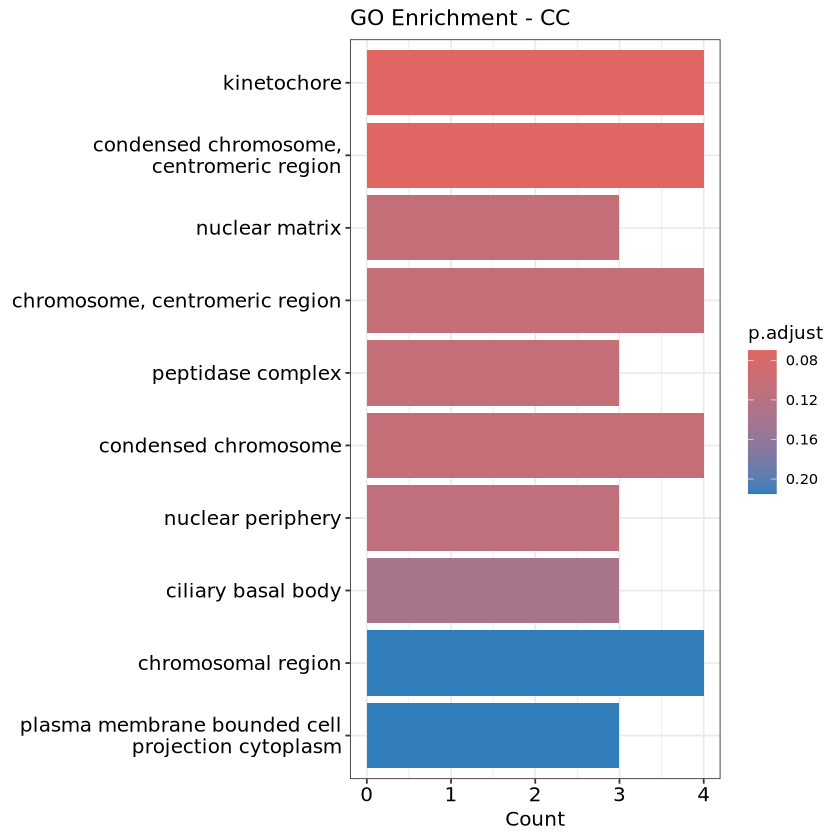

In [135]:
barplot(Aging4_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [136]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging4_sig_xqtl_CC.pdf', width = 6, height = 6)

In [39]:
Aging4_mf_ego <- enrichGO(
  gene          = Aging4_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [40]:
head(Aging4_mf_ego, n=10)

ID         Description                                            
GO:0016493 GO:0016493 C-C chemokine receptor activity                        
GO:0019957 GO:0019957 C-C chemokine binding                                  
GO:0001637 GO:0001637 G protein-coupled chemoattractant receptor activity    
GO:0004950 GO:0004950 chemokine receptor activity                            
GO:0019956 GO:0019956 chemokine binding                                      
GO:0019955 GO:0019955 cytokine binding                                       
GO:0004896 GO:0004896 cytokine receptor activity                             
GO:0140375 GO:0140375 immune receptor activity                               
GO:0015175 GO:0015175 neutral L-amino acid transmembrane transporter activity
GO:0015179 GO:0015179 L-amino acid transmembrane transporter activity        
           GeneRatio BgRatio   pvalue       p.adjust     qvalue      
GO:0016493 5/52      23/21059  2.451411e-09 1.870475e-07 1.605235e-07
GO:0019957 5/52      24/21059  3.090760e-09 1.870475e-07 1.605235e-07
GO:0001637 5/52      26/21059  4.765543e-09 1.870475e-07 1.605235e-07
GO:0004950 5/52      26/21059  4.765543e-09 1.870475e-07 1.605235e-07
GO:0019956 5/52      33/21059  1.697162e-08 5.329087e-07 4.573404e-07
GO:0019955 6/52      163/21059 2.973722e-06 7.781238e-05 6.677831e-05
GO:0004896 5/52      102/21059 5.238534e-06 1.174928e-04 1.008319e-04
GO:0140375 5/52      325/21059 1.218095e-03 2.390511e-02 2.051528e-02
GO:0015175 2/52      48/21059  6.273285e-03 1.094340e-01 9.391584e-02
GO:0015179 2/52      69/21059  1.262406e-02 1.943088e-01 1.667551e-01
           geneID                                                                                         
GO:0016493 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0019957 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0001637 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0004950 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0019956 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0019955 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578/ENSG00000137801
GO:0004896 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0140375 ENSG00000172215/ENSG00000173585/ENSG00000163823/ENSG00000183625/ENSG00000173578                
GO:0015175 ENSG00000180773/ENSG00000163817                                                                
GO:0015179 ENSG00000180773/ENSG00000163817                                                                
           Count
GO:0016493 5    
GO:0019957 5    
GO:0001637 5    
GO:0004950 5    
GO:0019956 5    
GO:0019955 6    
GO:0004896 5    
GO:0140375 5    
GO:0015175 2    
GO:0015179 2

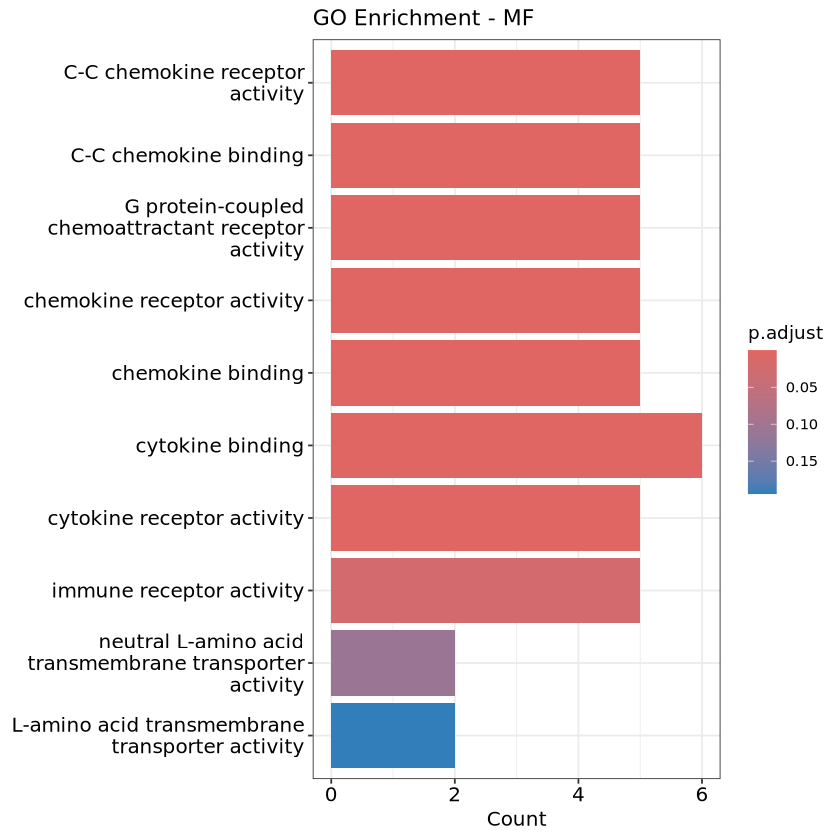

In [139]:
barplot(Aging4_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [140]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging4_sig_xqtl_MF.pdf', width = 6, height = 6)

In [68]:
entrez_ids <- bitr(Aging4_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging4_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“1.23% of input gene IDs are fail to map...”


In [69]:
kegg_enrich %>% head(n=15)

category                            
hsa04061 Environmental Information Processing
hsa04062 Organismal Systems                  
hsa04060 Environmental Information Processing
hsa00061 Metabolism                          
hsa04145 Cellular Processes                  
hsa04217 Cellular Processes                  
hsa04392 Environmental Information Processing
hsa05219 Human Diseases                      
hsa05167 Human Diseases                      
hsa05202 Human Diseases                      
hsa03050 Genetic Information Processing      
hsa00280 Metabolism                          
hsa03272 NA                                  
hsa04672 Organismal Systems                  
hsa05144 Human Diseases                      
         subcategory                         ID      
hsa04061 Signaling molecules and interaction hsa04061
hsa04062 Immune system                       hsa04062
hsa04060 Signaling molecules and interaction hsa04060
hsa00061 Lipid metabolism                    hsa00061
hsa04145 Transport and catabolism            hsa04145
hsa04217 Cell growth and death               hsa04217
hsa04392 Signal transduction                 hsa04392
hsa05219 Cancer: specific types              hsa05219
hsa05167 Infectious disease: viral           hsa05167
hsa05202 Cancer: overview                    hsa05202
hsa03050 Folding, sorting and degradation    hsa03050
hsa00280 Amino acid metabolism               hsa00280
hsa03272 NA                                  hsa03272
hsa04672 Immune system                       hsa04672
hsa05144 Infectious disease: parasitic       hsa05144
         Description                                                  
hsa04061 Viral protein interaction with cytokine and cytokine receptor
hsa04062 Chemokine signaling pathway                                  
hsa04060 Cytokine-cytokine receptor interaction                       
hsa00061 Fatty acid biosynthesis                                      
hsa04145 Phagosome                                                    
hsa04217 Necroptosis                                                  
hsa04392 Hippo signaling pathway - multiple species                   
hsa05219 Bladder cancer                                               
hsa05167 Kaposi sarcoma-associated herpesvirus infection              
hsa05202 Transcriptional misregulation in cancer                      
hsa03050 Proteasome                                                   
hsa00280 Valine, leucine and isoleucine degradation                   
hsa03272 Virion - Hepatitis viruses                                   
hsa04672 Intestinal immune network for IgA production                 
hsa05144 Malaria                                                      
         GeneRatio BgRatio  pvalue       p.adjust    qvalue     
hsa04061 4/29      100/9440 0.0002297472 0.008375592 0.008375592
hsa04062 5/29      193/9440 0.0002701804 0.008375592 0.008375592
hsa04060 5/29      298/9440 0.0019303261 0.039893405 0.039893405
hsa00061 1/29      18/9440  0.0539233868 0.491722600 0.491722600
hsa04145 2/29      159/9440 0.0851583760 0.491722600 0.491722600
hsa04217 2/29      159/9440 0.0851583760 0.491722600 0.491722600
hsa04392 1/29      29/9440  0.0854827097 0.491722600 0.491722600
hsa05219 1/29      41/9440  0.1187515603 0.491722600 0.491722600
hsa05167 2/29      196/9440 0.1209829645 0.491722600 0.491722600
hsa05202 2/29      201/9440 0.1260832201 0.491722600 0.491722600
hsa03050 1/29      46/9440  0.1322659553 0.491722600 0.491722600
hsa00280 1/29      48/9440  0.1376154934 0.491722600 0.491722600
hsa03272 1/29      48/9440  0.1376154934 0.491722600 0.491722600
hsa04672 1/29      50/9440  0.1429331824 0.491722600 0.491722600
hsa05144 1/29      50/9440  0.1429331824 0.491722600 0.491722600
         geneID                     Count
hsa04061 10803/1230/1232/2829       4    
hsa04062 10663/10803/1230/1232/2829 5    
hsa04060 10663/10803/1230/1232/2829 5    
hsa00061 197322                     1    
hsa04145 10381/7057    

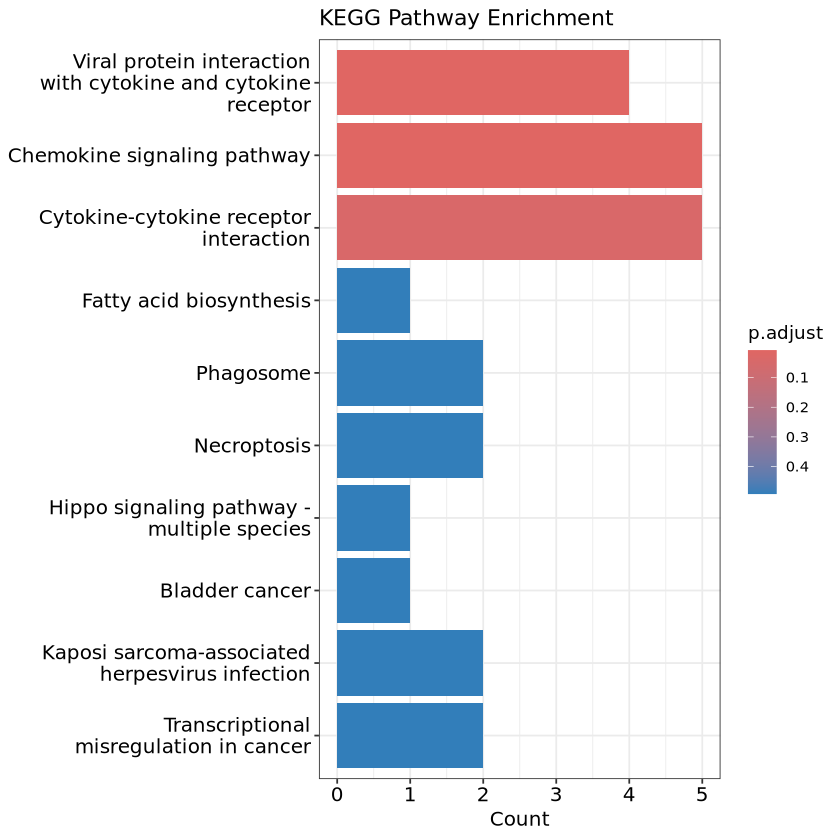

In [70]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [41]:
Aging5_bp_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [42]:
head(Aging5_bp_ego, n=10)

ID         Description                              GeneRatio
GO:0048704 GO:0048704 embryonic skeletal system morphogenesis  9/194    
GO:0003002 GO:0003002 regionalization                          17/194   
GO:0009952 GO:0009952 anterior/posterior pattern specification 12/194   
GO:0048706 GO:0048706 embryonic skeletal system development    9/194    
GO:0048705 GO:0048705 skeletal system morphogenesis            11/194   
GO:0048562 GO:0048562 embryonic organ morphogenesis            11/194   
GO:0048568 GO:0048568 embryonic organ development              13/194   
GO:0060216 GO:0060216 definitive hemopoiesis                   3/194    
GO:0021516 GO:0021516 dorsal spinal cord development           3/194    
GO:0120254 GO:0120254 olefinic compound metabolic process      7/194    
           BgRatio   pvalue       p.adjust     qvalue      
GO:0048704 98/21261  2.846697e-07 0.0005912591 0.0005828238
GO:0003002 460/21261 1.184148e-06 0.0011355009 0.0011193012
GO:0009952 233/21261 1.640107e-06 0.0011355009 0.0011193012
GO:0048706 135/21261 4.232002e-06 0.0021974673 0.0021661171
GO:0048705 238/21261 1.252209e-05 0.0052016747 0.0051274648
GO:0048562 316/21261 1.623516e-04 0.0562007150 0.0553989259
GO:0048568 500/21261 7.121712e-04 0.1974557399 0.1946387320
GO:0060216 20/21261  7.605421e-04 0.1974557399 0.1946387320
GO:0021516 21/21261  8.813627e-04 0.2033989235 0.2004971271
GO:0120254 183/21261 1.488696e-03 0.3092022208 0.3047909786
           geneID                                                                                                                                                                                                                                                                         
GO:0048704 ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689                                                                                                                                
GO:0003002 ENSG00000180613/ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689/ENSG00000106003/ENSG00000107882/ENSG00000111783/ENSG00000123473/ENSG00000204217/ENSG00000107872/ENSG00000198728
GO:0009952 ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689/ENSG00000106003/ENSG00000204217/ENSG00000198728                                                                                
GO:0048706 ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689                                                                                                                                
GO:0048705 ENSG00000173868/ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689/ENSG00000204217                                                                                                
GO:0048562 ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689/ENSG00000107882/ENSG00000123473                                                                                                
GO:0048568 ENSG00000120094/ENSG00000173917/ENSG00000120093/ENSG00000182742/ENSG00000120075/ENSG00000108511/ENSG00000260027/ENSG00000120068/ENSG00000170689/ENSG00000107882/ENSG00000177084/ENSG00000123473/ENSG00000162367                                                                
GO:0060216 ENSG00000120093/ENSG00000182742/ENSG00000162367                                                                                                                                                                                                                                
G

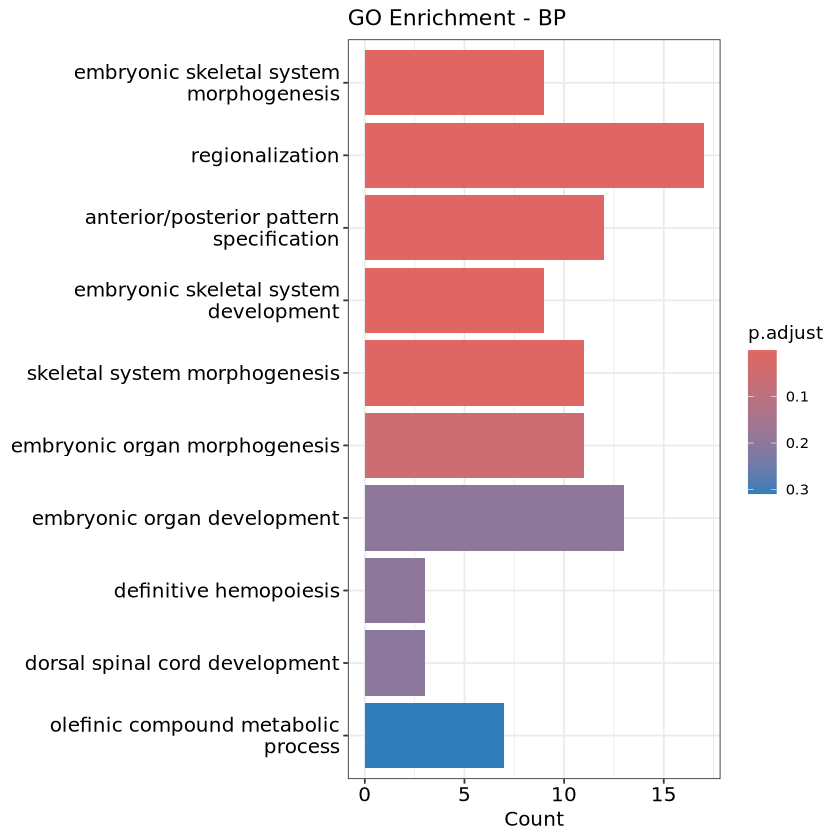

In [143]:
barplot(Aging5_bp_ego, showCategory = 10, title = "GO Enrichment - BP")

In [144]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging5_sig_xqtl_BP.pdf', width = 6, height = 6)

In [44]:
Aging5_cc_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [45]:
head(Aging5_cc_ego, n=5)

ID         Description                                 GeneRatio
GO:0005834 GO:0005834 heterotrimeric G-protein complex            3/203    
GO:1905360 GO:1905360 GTPase complex                              3/203    
GO:0031209 GO:0031209 SCAR complex                                2/203    
GO:0031588 GO:0031588 nucleotide-activated protein kinase complex 2/203    
GO:0043197 GO:0043197 dendritic spine                             6/203    
           BgRatio   pvalue      p.adjust  qvalue 
GO:0005834 35/22568  0.003797024 0.3153459 0.31266
GO:1905360 42/22568  0.006360641 0.3153459 0.31266
GO:0031209 14/22568  0.006823475 0.3153459 0.31266
GO:0031588 15/22568  0.007826891 0.3153459 0.31266
GO:0043197 195/22568 0.008556658 0.3153459 0.31266
           geneID                                                                                         
GO:0005834 ENSG00000146535/ENSG00000242616/ENSG00000167083                                                
GO:1905360 ENSG00000146535/ENSG00000242616/ENSG00000167083                                                
GO:0031209 ENSG00000138443/ENSG00000108798                                                                
GO:0031588 ENSG00000163545/ENSG00000074590                                                                
GO:0043197 ENSG00000138443/ENSG00000159217/ENSG00000198121/ENSG00000108798/ENSG00000059915/ENSG00000107954
           Count
GO:0005834 3    
GO:1905360 3    
GO:0031209 2    
GO:0031588 2    
GO:0043197 6

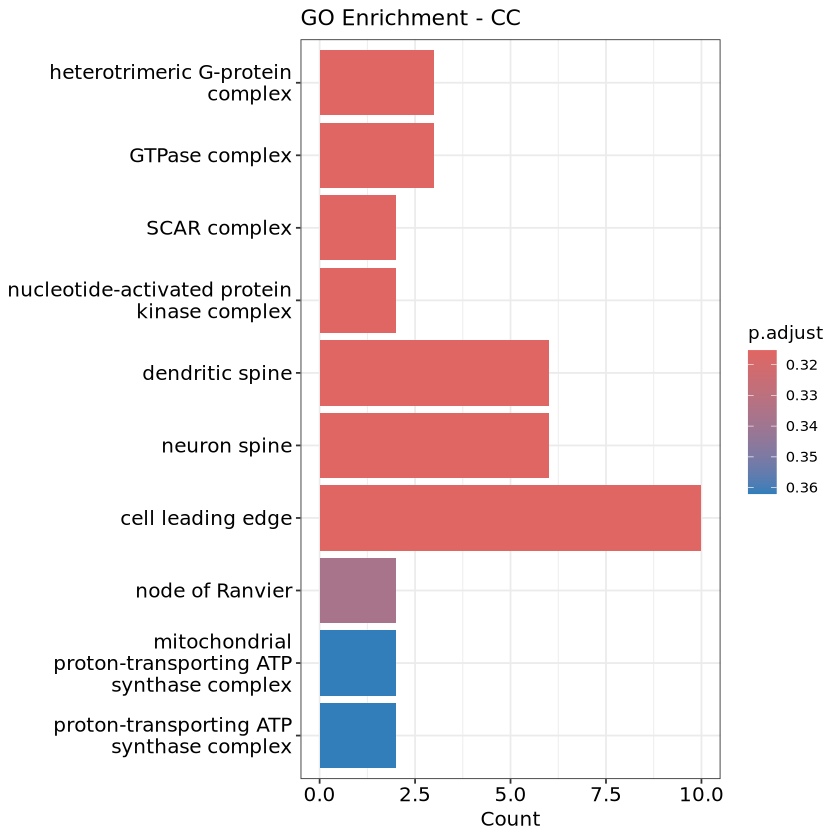

In [147]:
barplot(Aging5_cc_ego, showCategory = 10, title = "GO Enrichment - CC")

In [148]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging5_sig_xqtl_CC.pdf', width = 6, height = 6)

In [149]:
Aging5_mf_ego <- enrichGO(
  gene          = Aging5_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [150]:
head(Aging5_mf_ego, n=5)

ID         Description                                       
GO:0004032 GO:0004032 alditol:NADP+ 1-oxidoreductase activity           
GO:0045182 GO:0045182 translation regulator activity                    
GO:0052650 GO:0052650 NADP-retinol dehydrogenase activity               
GO:1903231 GO:1903231 mRNA base-pairing translational repressor activity
GO:0008106 GO:0008106 alcohol dehydrogenase (NADP+) activity            
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0004032 3/197     12/21059  0.0001666755 0.05316947 0.05123078
GO:0045182 12/197    453/21059 0.0011995011 0.13225490 0.12743254
GO:0052650 3/197     23/21059  0.0012437765 0.13225490 0.12743254
GO:1903231 9/197     292/21059 0.0017753854 0.14158699 0.13642435
GO:0008106 3/197     33/21059  0.0035777176 0.19682088 0.18964427
           geneID                                                                                                                                                                                         
GO:0004032 ENSG00000085662/ENSG00000227471/ENSG00000198074                                                                                                                                                
GO:0045182 ENSG00000216101/ENSG00000159217/ENSG00000284038/ENSG00000210741/ENSG00000199036/ENSG00000207811/ENSG00000207562/ENSG00000199059/ENSG00000202569/ENSG00000283172/ENSG00000106263/ENSG00000107954
GO:0052650 ENSG00000085662/ENSG00000227471/ENSG00000198074                                                                                                                                                
GO:1903231 ENSG00000216101/ENSG00000284038/ENSG00000210741/ENSG00000199036/ENSG00000207811/ENSG00000207562/ENSG00000199059/ENSG00000202569/ENSG00000283172                                                
GO:0008106 ENSG00000085662/ENSG00000227471/ENSG00000198074                                                                                                                                                
           Count
GO:0004032  3   
GO:0045182 12   
GO:0052650  3   
GO:1903231  9   
GO:0008106  3

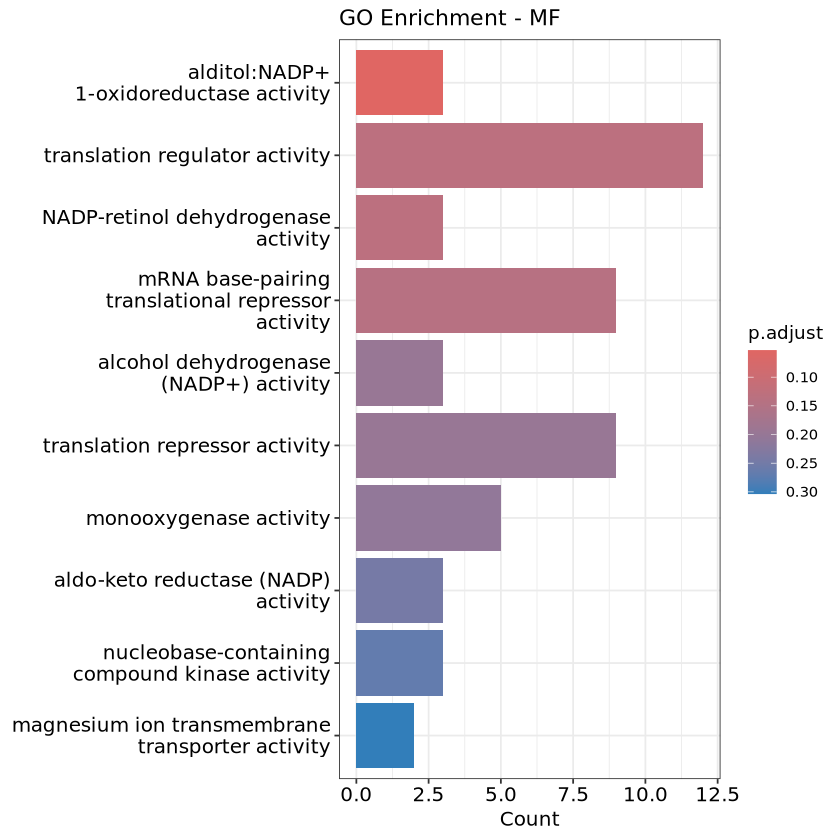

In [151]:
barplot(Aging5_mf_ego, showCategory = 10, title = "GO Enrichment - MF")

In [152]:
ggsave('~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/genes_comparison/GWAS_loci_by_proxy/500kb_figs/image_Aging5_sig_xqtl_MF.pdf', width = 6, height = 6)

In [71]:
entrez_ids <- bitr(Aging5_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging5_gene, fromType = "ENSEMBL", toType = "ENTREZID", :
“0.34% of input gene IDs are fail to map...”


In [72]:
kegg_enrich %>% head(n=10)

category                            
hsa00040 Metabolism                          
hsa00790 Metabolism                          
hsa04514 Environmental Information Processing
hsa00052 Metabolism                          
hsa00051 Metabolism                          
hsa05206 Human Diseases                      
hsa04672 Organismal Systems                  
hsa05320 Human Diseases                      
hsa00561 Metabolism                          
hsa04660 Organismal Systems                  
         subcategory                          ID      
hsa00040 Carbohydrate metabolism              hsa00040
hsa00790 Metabolism of cofactors and vitamins hsa00790
hsa04514 Signaling molecules and interaction  hsa04514
hsa00052 Carbohydrate metabolism              hsa00052
hsa00051 Carbohydrate metabolism              hsa00051
hsa05206 Cancer: overview                     hsa05206
hsa04672 Immune system                        hsa04672
hsa05320 Immune disease                       hsa05320
hsa00561 Lipid metabolism                     hsa00561
hsa04660 Immune system                        hsa04660
         Description                                  GeneRatio BgRatio 
hsa00040 Pentose and glucuronate interconversions     4/81      36/9440 
hsa00790 Folate biosynthesis                          3/81      28/9440 
hsa04514 Cell adhesion molecules                      6/81      160/9440
hsa00052 Galactose metabolism                         3/81      32/9440 
hsa00051 Fructose and mannose metabolism              3/81      35/9440 
hsa05206 MicroRNAs in cancer                          8/81      320/9440
hsa04672 Intestinal immune network for IgA production 3/81      50/9440 
hsa05320 Autoimmune thyroid disease                   3/81      54/9440 
hsa00561 Glycerolipid metabolism                      3/81      65/9440 
hsa04660 T cell receptor signaling pathway            4/81      122/9440
         pvalue       p.adjust   qvalue    
hsa00040 0.0002404829 0.03583196 0.03468017
hsa00790 0.0017081560 0.09399119 0.09096992
hsa04514 0.0024578869 0.09399119 0.09096992
hsa00052 0.0025232533 0.09399119 0.09096992
hsa00051 0.0032686655 0.09740623 0.09427520
hsa05206 0.0059872515 0.14868341 0.14390411
hsa04672 0.0089280347 0.19003960 0.18393094
hsa05320 0.0110256090 0.20535197 0.19875111
hsa00561 0.0181570046 0.30059930 0.29093680
hsa04660 0.0205943593 0.30685595 0.29699234
         geneID                                             Count
hsa00040 231/441282/57016/729020                            4    
hsa00790 231/441282/57016                                   3    
hsa04514 1493/23114/29851/3127/6900/940                     6    
hsa00052 231/441282/57016                                   3    
hsa00051 231/441282/57016                                   3    
hsa05206 10642/406902/407041/407042/442891/574447/659/85414 8    
hsa04672 29851/3127/940                                     3    
hsa05320 1493/3127/940                                      3    
hsa00561 231/441282/57016                                   3    
hsa04660 1493/29851/84433/940                               4

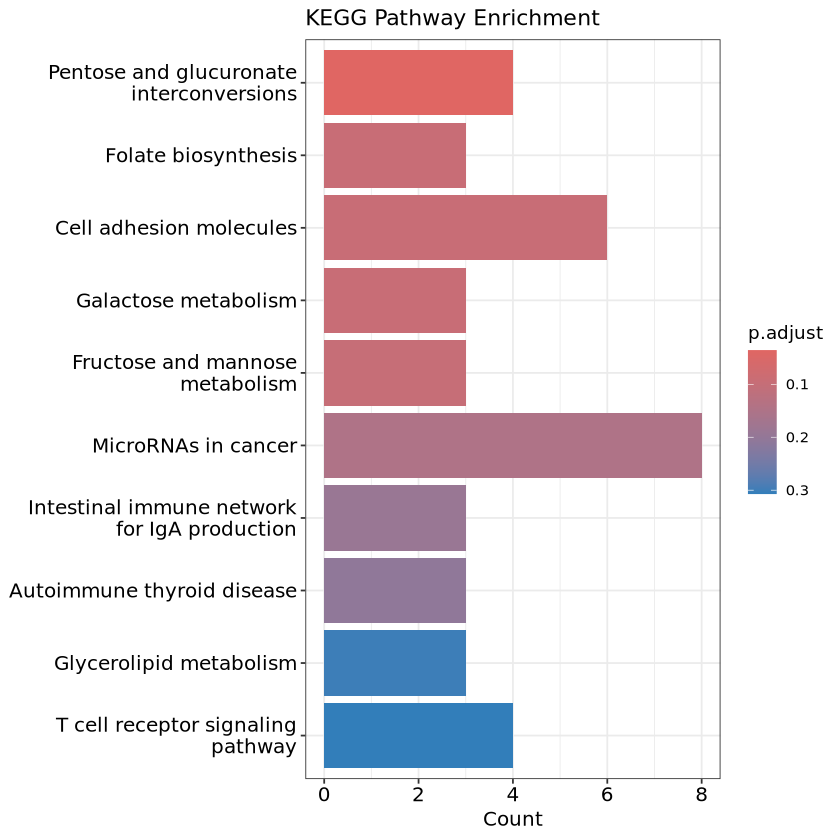

In [73]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")